In [1]:
# Licensed under the MIT License.

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.defender import ScanAndReimageCompromisedMachines
from cyberbattle._env.cyberbattle_env import AttackerGoal, DefenderConstraint, CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 200
training_episode_count = 20
eval_episode_count = 3
maximum_node_count = 20
maximum_total_credentials = 20
env_size = 10
plots_dir = "notebooks/output/defender_dql/plots"


In [6]:
# Load the Gym environment
gym_env = gym.make(
    gymid,
    size=10,
    attacker_goal=AttackerGoal(own_atleast=0, own_atleast_percent=1.0),
    defender_constraint=DefenderConstraint(maintain_sla=0.80),
    defender_agent=ScanAndReimageCompromisedMachines(probability=0.6, scan_capacity=2, scan_frequency=5),
).unwrapped

cyberbattlechain_defender = gym_env.unwrapped
assert isinstance(cyberbattlechain_defender, CyberBattleEnv)

ep = w.EnvironmentBounds.of_identifiers(maximum_total_credentials=22, maximum_node_count=22, identifiers=cyberbattlechain_defender.identifiers)

###### DQL
Learning with: episode_count=20,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

/mnt/c/Users/cabin/git_repo/CyberSecurity-RL/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /croot/libtorch_1751464468084/work/torch/csrc/utils/tensor_new.cpp:254.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 22|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  120.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward:  120.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  134.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  134.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  140.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 74|reward:  140.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  148.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 1|Iteration 77|reward:  148.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  248.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  248.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  262.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  262.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  264.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  264.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  270.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  270.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward:  274.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward:  274.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 142|reward:  274.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 178|reward:  274.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  274.0|last_reward_at:  101|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/39 (0.09)
    explore-remote: 6/75 (0.07)
    explore-connect: 2/60 (0.03)
    exploit-local: 0/1 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/13 (0.00)
  exploit deflected to exploration: 4
  ## Episode: 2/20 'DQL' ϵ=0.8688, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  128.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  134.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  136.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  136.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  142.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  142.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  144.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 2|Iteration 46|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:02||

Episode 2|Iteration 47|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:03||

Episode 2|Iteration 48|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:03||

Episode 2|Iteration 49|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:04||

Episode 2|Iteration 50|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:05||

Episode 2|Iteration 51|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:05||

Episode 2|Iteration 52|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:06||

Episode 2|Iteration 53|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:07||

Episode 2|Iteration 54|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:08||

Episode 2|Iteration 55|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:08||

Episode 2|Iteration 56|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:09||

Episode 2|Iteration 57|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:10||

Episode 2|Iteration 58|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:10||

Episode 2|Iteration 59|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:11||

Episode 2|Iteration 60|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:12||

Episode 2|Iteration 61|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:12||

Episode 2|Iteration 62|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:13||

Episode 2|Iteration 63|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:14||

Episode 2|Iteration 64|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:14||

Episode 2|Iteration 65|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:15||

Episode 2|Iteration 66|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:17||

Episode 2|Iteration 67|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:17||

Episode 2|Iteration 68|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:18||

Episode 2|Iteration 69|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:19||

Episode 2|Iteration 70|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:20||

Episode 2|Iteration 71|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:21||

Episode 2|Iteration 72|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:21||

Episode 2|Iteration 73|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:22||

Episode 2|Iteration 74|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:23||

Episode 2|Iteration 75|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:24||

Episode 2|Iteration 76|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:24||

Episode 2|Iteration 77|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:25||

Episode 2|Iteration 78|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:26||

Episode 2|Iteration 79|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:27||

Episode 2|Iteration 80|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:28||

Episode 2|Iteration 81|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:28||

Episode 2|Iteration 82|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:29||

Episode 2|Iteration 83|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:30||

Episode 2|Iteration 84|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:31||

Episode 2|Iteration 85|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:32||

Episode 2|Iteration 86|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:33||

Episode 2|Iteration 87|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:33||

Episode 2|Iteration 88|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:34||

Episode 2|Iteration 89|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:35||

Episode 2|Iteration 90|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:36||

Episode 2|Iteration 91|reward:  252.0|last_reward_at:   35|Elapsed Time: 0:00:36||

Episode 2|Iteration 91|reward:  252.0|last_reward_at:   91|Elapsed Time: 0:00:36||

Episode 2|Iteration 92|reward:  252.0|last_reward_at:   91|Elapsed Time: 0:00:37||

Episode 2|Iteration 93|reward:  252.0|last_reward_at:   91|Elapsed Time: 0:00:38||

Episode 2|Iteration 94|reward:  252.0|last_reward_at:   91|Elapsed Time: 0:00:40||

Episode 2|Iteration 95|reward:  252.0|last_reward_at:   91|Elapsed Time: 0:00:41||

Episode 2|Iteration 96|reward:  252.0|last_reward_at:   91|Elapsed Time: 0:00:41||

Episode 2|Iteration 97|reward:  263.0|last_reward_at:   91|Elapsed Time: 0:00:42||

Episode 2|Iteration 97|reward:  263.0|last_reward_at:   97|Elapsed Time: 0:00:42||

Episode 2|Iteration 98|reward:  267.0|last_reward_at:   97|Elapsed Time: 0:00:43||

Episode 2|Iteration 98|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:43||

Episode 2|Iteration 99|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:43||

Episode 2|Iteration 100|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:44||

Episode 2|Iteration 101|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:45||

Episode 2|Iteration 102|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:46||

Episode 2|Iteration 103|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:46||

Episode 2|Iteration 104|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:47||

Episode 2|Iteration 105|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:48||

Episode 2|Iteration 106|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:48||

Episode 2|Iteration 107|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:49||

Episode 2|Iteration 108|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:50||

Episode 2|Iteration 109|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:51||

Episode 2|Iteration 110|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:52||

Episode 2|Iteration 111|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:52||

Episode 2|Iteration 112|reward:  267.0|last_reward_at:   98|Elapsed Time: 0:00:53||

Episode 2|Iteration 113|reward:  269.0|last_reward_at:   98|Elapsed Time: 0:00:54||

Episode 2|Iteration 113|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:54||

Episode 2|Iteration 114|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:54||

Episode 2|Iteration 115|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:55||

Episode 2|Iteration 116|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:56||

Episode 2|Iteration 117|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:56||

Episode 2|Iteration 118|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:57||

Episode 2|Iteration 119|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:58||

Episode 2|Iteration 120|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:59||

Episode 2|Iteration 121|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:00:59||

Episode 2|Iteration 122|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:00||

Episode 2|Iteration 123|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:01||

Episode 2|Iteration 124|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:01||

Episode 2|Iteration 125|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:02||

Episode 2|Iteration 126|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:03||

Episode 2|Iteration 127|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:03||

Episode 2|Iteration 128|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:04||

Episode 2|Iteration 129|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:05||

Episode 2|Iteration 130|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:05||

Episode 2|Iteration 131|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:06||

Episode 2|Iteration 132|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:07||

Episode 2|Iteration 133|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:08||

Episode 2|Iteration 134|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:09||

Episode 2|Iteration 135|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:09||

Episode 2|Iteration 136|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:10||

Episode 2|Iteration 137|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:11||

Episode 2|Iteration 138|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:12||

Episode 2|Iteration 139|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:12||

Episode 2|Iteration 140|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:13||

Episode 2|Iteration 141|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:14||

Episode 2|Iteration 142|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:15||

Episode 2|Iteration 143|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:15||

Episode 2|Iteration 144|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:16||

Episode 2|Iteration 145|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:17||

Episode 2|Iteration 146|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:19||

Episode 2|Iteration 147|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:19||

Episode 2|Iteration 148|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:20||

Episode 2|Iteration 149|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:21||

Episode 2|Iteration 150|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:22||

Episode 2|Iteration 151|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:22||

Episode 2|Iteration 152|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:23||

Episode 2|Iteration 153|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:24||

Episode 2|Iteration 154|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:24||

Episode 2|Iteration 155|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:25||

Episode 2|Iteration 156|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:26||

Episode 2|Iteration 157|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:26||

Episode 2|Iteration 158|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:27||

Episode 2|Iteration 159|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:28||

Episode 2|Iteration 160|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:28||

Episode 2|Iteration 161|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:29||

Episode 2|Iteration 162|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:30||

Episode 2|Iteration 163|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:31||

Episode 2|Iteration 164|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:31||

Episode 2|Iteration 165|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:32||

Episode 2|Iteration 166|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:33||

Episode 2|Iteration 167|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:33||

Episode 2|Iteration 168|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:34||

Episode 2|Iteration 169|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:35||

Episode 2|Iteration 170|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:36||

Episode 2|Iteration 171|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:36||

Episode 2|Iteration 172|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:37||

Episode 2|Iteration 173|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:38||

Episode 2|Iteration 174|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:39||

Episode 2|Iteration 175|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:39||

Episode 2|Iteration 176|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:40||

Episode 2|Iteration 177|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:41||

Episode 2|Iteration 178|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:42||

Episode 2|Iteration 179|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:42||

Episode 2|Iteration 180|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:43||

Episode 2|Iteration 181|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:44||

Episode 2|Iteration 182|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:45||

Episode 2|Iteration 183|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:45||

Episode 2|Iteration 184|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:46||

Episode 2|Iteration 185|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:47||

Episode 2|Iteration 186|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:48||

Episode 2|Iteration 187|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:48||

Episode 2|Iteration 188|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:50||

Episode 2|Iteration 189|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:51||

Episode 2|Iteration 190|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:52||

Episode 2|Iteration 191|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:53||

Episode 2|Iteration 192|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:53||

Episode 2|Iteration 193|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:54||

Episode 2|Iteration 194|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:55||

Episode 2|Iteration 195|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:56||

Episode 2|Iteration 196|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:57||

Episode 2|Iteration 197|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:57||

Episode 2|Iteration 198|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:01:58||

Episode 2|Iteration 199|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:02:00||

Episode 2|Iteration 200|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:02:00||

Episode 2|Iteration 200|reward:  269.0|last_reward_at:  113|Elapsed Time: 0:02:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/17 (0.19)
    explore-remote: 6/63 (0.09)
    explore-connect: 0/80 (0.00)
    exploit-local: 0/8 (0.00)
    exploit-remote: 0/4 (0.00)
    exploit-connect: 2/16 (0.11)
  exploit deflected to exploration: 5
  ## Episode: 3/20 'DQL' ϵ=0.8386, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 3|Iteration 4|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 3|Iteration 5|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 3|Iteration 6|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:04||

Episode 3|Iteration 7|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:04||

Episode 3|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 3|Iteration 8|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 3|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 9|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 3|Iteration 10|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 3|Iteration 10|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 3|Iteration 11|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 3|Iteration 12|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 3|Iteration 13|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 3|Iteration 14|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:10||

Episode 3|Iteration 15|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:11||

Episode 3|Iteration 16|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:12||

Episode 3|Iteration 17|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:12||

Episode 3|Iteration 18|reward:  136.0|last_reward_at:   10|Elapsed Time: 0:00:13||

Episode 3|Iteration 18|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 3|Iteration 19|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 3|Iteration 20|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 3|Iteration 21|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:15||

Episode 3|Iteration 22|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:16||

Episode 3|Iteration 23|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:16||

Episode 3|Iteration 24|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:17||

Episode 3|Iteration 25|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:18||

Episode 3|Iteration 26|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:19||

Episode 3|Iteration 27|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:20||

Episode 3|Iteration 28|reward:  136.0|last_reward_at:   18|Elapsed Time: 0:00:20||

Episode 3|Iteration 29|reward:  144.0|last_reward_at:   18|Elapsed Time: 0:00:21||

Episode 3|Iteration 29|reward:  144.0|last_reward_at:   29|Elapsed Time: 0:00:21||

Episode 3|Iteration 30|reward:  144.0|last_reward_at:   29|Elapsed Time: 0:00:22||

Episode 3|Iteration 31|reward:  144.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 3|Iteration 32|reward:  244.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 3|Iteration 32|reward:  244.0|last_reward_at:   32|Elapsed Time: 0:00:23||

Episode 3|Iteration 33|reward:  244.0|last_reward_at:   32|Elapsed Time: 0:00:24||

Episode 3|Iteration 34|reward:  244.0|last_reward_at:   32|Elapsed Time: 0:00:25||

Episode 3|Iteration 35|reward:  244.0|last_reward_at:   32|Elapsed Time: 0:00:25||

Episode 3|Iteration 36|reward:  258.0|last_reward_at:   32|Elapsed Time: 0:00:26||

Episode 3|Iteration 36|reward:  258.0|last_reward_at:   36|Elapsed Time: 0:00:26||

Episode 3|Iteration 37|reward:  258.0|last_reward_at:   36|Elapsed Time: 0:00:27||

Episode 3|Iteration 38|reward:  258.0|last_reward_at:   36|Elapsed Time: 0:00:27||

Episode 3|Iteration 39|reward:  258.0|last_reward_at:   36|Elapsed Time: 0:00:28||

Episode 3|Iteration 40|reward:  262.0|last_reward_at:   36|Elapsed Time: 0:00:29||

Episode 3|Iteration 40|reward:  262.0|last_reward_at:   40|Elapsed Time: 0:00:29||

Episode 3|Iteration 41|reward:  262.0|last_reward_at:   40|Elapsed Time: 0:00:30||

Episode 3|Iteration 42|reward:  262.0|last_reward_at:   40|Elapsed Time: 0:00:30||

Episode 3|Iteration 43|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:31||

Episode 3|Iteration 43|reward:  264.0|last_reward_at:   43|Elapsed Time: 0:00:31||

Episode 3|Iteration 44|reward:  264.0|last_reward_at:   43|Elapsed Time: 0:00:32||

Episode 3|Iteration 45|reward:  264.0|last_reward_at:   43|Elapsed Time: 0:00:33||

Episode 3|Iteration 46|reward:  264.0|last_reward_at:   43|Elapsed Time: 0:00:33||

Episode 3|Iteration 47|reward:  264.0|last_reward_at:   43|Elapsed Time: 0:00:34||

Episode 3|Iteration 48|reward:  264.0|last_reward_at:   43|Elapsed Time: 0:00:35||

Episode 3|Iteration 49|reward:  270.0|last_reward_at:   43|Elapsed Time: 0:00:35||

Episode 3|Iteration 49|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:35||

Episode 3|Iteration 50|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:36||

Episode 3|Iteration 51|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:37||

Episode 3|Iteration 52|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:38||

Episode 3|Iteration 53|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:40||

Episode 3|Iteration 54|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:41||

Episode 3|Iteration 55|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:41||

Episode 3|Iteration 56|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:42||

Episode 3|Iteration 57|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:43||

Episode 3|Iteration 58|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:45||

Episode 3|Iteration 59|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:46||

Episode 3|Iteration 60|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:46||

Episode 3|Iteration 61|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:47||

Episode 3|Iteration 62|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:48||

Episode 3|Iteration 63|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:49||

Episode 3|Iteration 64|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:49||

Episode 3|Iteration 65|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:50||

Episode 3|Iteration 66|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:51||

Episode 3|Iteration 67|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:52||

Episode 3|Iteration 68|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:52||

Episode 3|Iteration 69|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:53||

Episode 3|Iteration 70|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:54||

Episode 3|Iteration 71|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:55||

Episode 3|Iteration 72|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:55||

Episode 3|Iteration 73|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:56||

Episode 3|Iteration 74|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:57||

Episode 3|Iteration 75|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:57||

Episode 3|Iteration 76|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:58||

Episode 3|Iteration 77|reward:  272.0|last_reward_at:   49|Elapsed Time: 0:00:59||

Episode 3|Iteration 77|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:00:59||

Episode 3|Iteration 78|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:00||

Episode 3|Iteration 79|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:00||

Episode 3|Iteration 80|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:01||

Episode 3|Iteration 81|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:02||

Episode 3|Iteration 82|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:03||

Episode 3|Iteration 83|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:03||

Episode 3|Iteration 84|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:04||

Episode 3|Iteration 85|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:05||

Episode 3|Iteration 86|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:05||

Episode 3|Iteration 87|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:06||

Episode 3|Iteration 88|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:07||

Episode 3|Iteration 89|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:07||

Episode 3|Iteration 90|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:08||

Episode 3|Iteration 91|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:09||

Episode 3|Iteration 92|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:09||

Episode 3|Iteration 93|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:10||

Episode 3|Iteration 94|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:11||

Episode 3|Iteration 95|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:12||

Episode 3|Iteration 96|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:12||

Episode 3|Iteration 97|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:13||

Episode 3|Iteration 98|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:14||

Episode 3|Iteration 99|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:14||

Episode 3|Iteration 100|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:15||

Episode 3|Iteration 101|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:16||

Episode 3|Iteration 102|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:17||

Episode 3|Iteration 103|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:17||

Episode 3|Iteration 104|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:18||

Episode 3|Iteration 105|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:19||

Episode 3|Iteration 106|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:19||

Episode 3|Iteration 107|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:20||

Episode 3|Iteration 108|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:21||

Episode 3|Iteration 109|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:22||

Episode 3|Iteration 110|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:22||

Episode 3|Iteration 111|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:23||

Episode 3|Iteration 112|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:24||

Episode 3|Iteration 113|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:25||

Episode 3|Iteration 114|reward:  272.0|last_reward_at:   77|Elapsed Time: 0:01:25||

Episode 3|Iteration 115|reward:  278.0|last_reward_at:   77|Elapsed Time: 0:01:26||

Episode 3|Iteration 115|reward:  278.0|last_reward_at:  115|Elapsed Time: 0:01:26||

Episode 3|Iteration 116|reward:  278.0|last_reward_at:  115|Elapsed Time: 0:01:27||

Episode 3|Iteration 117|reward:  278.0|last_reward_at:  115|Elapsed Time: 0:01:28||

Episode 3|Iteration 118|reward:  278.0|last_reward_at:  115|Elapsed Time: 0:01:28||

Episode 3|Iteration 119|reward:  278.0|last_reward_at:  115|Elapsed Time: 0:01:29||

Episode 3|Iteration 120|reward:  278.0|last_reward_at:  115|Elapsed Time: 0:01:30||

Episode 3|Iteration 121|reward:  378.0|last_reward_at:  115|Elapsed Time: 0:01:30||

Episode 3|Iteration 121|reward:  378.0|last_reward_at:  121|Elapsed Time: 0:01:30||

Episode 3|Iteration 122|reward:  378.0|last_reward_at:  121|Elapsed Time: 0:01:31||

Episode 3|Iteration 123|reward:  378.0|last_reward_at:  121|Elapsed Time: 0:01:35||

Episode 3|Iteration 124|reward:  392.0|last_reward_at:  121|Elapsed Time: 0:01:35||

Episode 3|Iteration 124|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:35||

Episode 3|Iteration 125|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:36||

Episode 3|Iteration 126|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:37||

Episode 3|Iteration 127|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:38||

Episode 3|Iteration 128|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:39||

Episode 3|Iteration 129|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:40||

Episode 3|Iteration 130|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:41||

Episode 3|Iteration 131|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:42||

Episode 3|Iteration 132|reward:  392.0|last_reward_at:  124|Elapsed Time: 0:01:42||

Episode 3|Iteration 133|reward:  400.0|last_reward_at:  124|Elapsed Time: 0:01:43||

Episode 3|Iteration 133|reward:  400.0|last_reward_at:  133|Elapsed Time: 0:01:43||

Episode 3|Iteration 134|reward:  400.0|last_reward_at:  133|Elapsed Time: 0:01:44||

Episode 3|Iteration 135|reward:  400.0|last_reward_at:  133|Elapsed Time: 0:01:45||

Episode 3|Iteration 136|reward:  400.0|last_reward_at:  133|Elapsed Time: 0:01:45||

Episode 3|Iteration 137|reward:  400.0|last_reward_at:  133|Elapsed Time: 0:01:46||

Episode 3|Iteration 138|reward:  400.0|last_reward_at:  133|Elapsed Time: 0:01:47||

Episode 3|Iteration 139|reward:  406.0|last_reward_at:  133|Elapsed Time: 0:01:48||

Episode 3|Iteration 139|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:48||

Episode 3|Iteration 140|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:48||

Episode 3|Iteration 141|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:49||

Episode 3|Iteration 142|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:50||

Episode 3|Iteration 143|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:50||

Episode 3|Iteration 144|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:51||

Episode 3|Iteration 145|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:52||

Episode 3|Iteration 146|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:53||

Episode 3|Iteration 147|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:54||

Episode 3|Iteration 148|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:55||

Episode 3|Iteration 149|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:55||

Episode 3|Iteration 150|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:56||

Episode 3|Iteration 151|reward:  406.0|last_reward_at:  139|Elapsed Time: 0:01:58||

Episode 3|Iteration 152|reward:  412.0|last_reward_at:  139|Elapsed Time: 0:01:58||

Episode 3|Iteration 152|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:01:58||

Episode 3|Iteration 153|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:01:59||

Episode 3|Iteration 154|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:00||

Episode 3|Iteration 155|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:01||

Episode 3|Iteration 156|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:02||

Episode 3|Iteration 157|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:03||

Episode 3|Iteration 158|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:03||

Episode 3|Iteration 159|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:04||

Episode 3|Iteration 160|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:05||

Episode 3|Iteration 161|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:05||

Episode 3|Iteration 162|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:06||

Episode 3|Iteration 163|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:07||

Episode 3|Iteration 164|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:08||

Episode 3|Iteration 165|reward:  412.0|last_reward_at:  152|Elapsed Time: 0:02:08||

Episode 3|Iteration 166|reward:  512.0|last_reward_at:  152|Elapsed Time: 0:02:09||

Episode 3|Iteration 166|reward:  512.0|last_reward_at:  166|Elapsed Time: 0:02:09||

Episode 3|Iteration 167|reward:  512.0|last_reward_at:  166|Elapsed Time: 0:02:10||

Episode 3|Iteration 168|reward:  512.0|last_reward_at:  166|Elapsed Time: 0:02:11||

Episode 3|Iteration 169|reward:  512.0|last_reward_at:  166|Elapsed Time: 0:02:11||

Episode 3|Iteration 170|reward:  512.0|last_reward_at:  166|Elapsed Time: 0:02:12||

Episode 3|Iteration 171|reward:  512.0|last_reward_at:  166|Elapsed Time: 0:02:13||

Episode 3|Iteration 172|reward:  512.0|last_reward_at:  166|Elapsed Time: 0:02:14||

Episode 3|Iteration 173|reward:  523.0|last_reward_at:  166|Elapsed Time: 0:02:14||

Episode 3|Iteration 173|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:14||

Episode 3|Iteration 174|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:15||

Episode 3|Iteration 175|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:15||

Episode 3|Iteration 176|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:16||

Episode 3|Iteration 177|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:17||

Episode 3|Iteration 178|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:17||

Episode 3|Iteration 179|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:18||

Episode 3|Iteration 180|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:19||

Episode 3|Iteration 181|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:20||

Episode 3|Iteration 182|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:20||

Episode 3|Iteration 183|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:21||

Episode 3|Iteration 184|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:22||

Episode 3|Iteration 185|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:22||

Episode 3|Iteration 186|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:23||

Episode 3|Iteration 187|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:24||

Episode 3|Iteration 188|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:25||

Episode 3|Iteration 189|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:25||

Episode 3|Iteration 190|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:26||

Episode 3|Iteration 191|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:27||

Episode 3|Iteration 192|reward:  523.0|last_reward_at:  173|Elapsed Time: 0:02:27||

Episode 3|Iteration 193|reward:  527.0|last_reward_at:  173|Elapsed Time: 0:02:28||

Episode 3|Iteration 193|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:28||

Episode 3|Iteration 194|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:29||

Episode 3|Iteration 195|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:30||

Episode 3|Iteration 196|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:30||

Episode 3|Iteration 197|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:31||

Episode 3|Iteration 198|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:32||

Episode 3|Iteration 199|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:33||

Episode 3|Iteration 200|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:34||

Episode 3|Iteration 200|reward:  527.0|last_reward_at:  193|Elapsed Time: 0:02:34||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/29 (0.19)
    explore-remote: 9/62 (0.13)
    explore-connect: 0/66 (0.00)
    exploit-local: 1/10 (0.09)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 2
  ## Episode: 4/20 'DQL' ϵ=0.8097, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 4|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 4|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 4|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 4|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 4|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 4|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 4|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:06||

Episode 4|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 4|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 4|Iteration 11|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:08||

Episode 4|Iteration 12|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:09||

Episode 4|Iteration 12|reward:   14.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 4|Iteration 13|reward:   14.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 4|Iteration 14|reward:   14.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 4|Iteration 15|reward:   14.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 4|Iteration 16|reward:  114.0|last_reward_at:   12|Elapsed Time: 0:00:12||

Episode 4|Iteration 16|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 4|Iteration 17|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 4|Iteration 18|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 4|Iteration 19|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:14||

Episode 4|Iteration 20|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:14||

Episode 4|Iteration 21|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:15||

Episode 4|Iteration 22|reward:  114.0|last_reward_at:   16|Elapsed Time: 0:00:16||

Episode 4|Iteration 23|reward:  116.0|last_reward_at:   16|Elapsed Time: 0:00:17||

Episode 4|Iteration 23|reward:  116.0|last_reward_at:   23|Elapsed Time: 0:00:17||

Episode 4|Iteration 24|reward:  130.0|last_reward_at:   23|Elapsed Time: 0:00:17||

Episode 4|Iteration 24|reward:  130.0|last_reward_at:   24|Elapsed Time: 0:00:17||

Episode 4|Iteration 25|reward:  130.0|last_reward_at:   24|Elapsed Time: 0:00:18||

Episode 4|Iteration 26|reward:  230.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 4|Iteration 26|reward:  230.0|last_reward_at:   26|Elapsed Time: 0:00:19||

Episode 4|Iteration 27|reward:  236.0|last_reward_at:   26|Elapsed Time: 0:00:20||

Episode 4|Iteration 27|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:20||

Episode 4|Iteration 28|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:21||

Episode 4|Iteration 29|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:21||

Episode 4|Iteration 30|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:22||

Episode 4|Iteration 31|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:23||

Episode 4|Iteration 32|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:24||

Episode 4|Iteration 33|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:24||

Episode 4|Iteration 34|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:25||

Episode 4|Iteration 35|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:26||

Episode 4|Iteration 36|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:27||

Episode 4|Iteration 37|reward:  236.0|last_reward_at:   27|Elapsed Time: 0:00:28||

Episode 4|Iteration 38|reward:  247.0|last_reward_at:   27|Elapsed Time: 0:00:28||

Episode 4|Iteration 38|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:28||

Episode 4|Iteration 39|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:29||

Episode 4|Iteration 40|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:30||

Episode 4|Iteration 41|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:30||

Episode 4|Iteration 42|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:31||

Episode 4|Iteration 43|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:32||

Episode 4|Iteration 44|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:33||

Episode 4|Iteration 45|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:33||

Episode 4|Iteration 46|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:34||

Episode 4|Iteration 47|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:35||

Episode 4|Iteration 48|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:35||

Episode 4|Iteration 49|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:36||

Episode 4|Iteration 50|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:37||

Episode 4|Iteration 51|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:38||

Episode 4|Iteration 52|reward:  247.0|last_reward_at:   38|Elapsed Time: 0:00:38||

Episode 4|Iteration 53|reward:  256.0|last_reward_at:   38|Elapsed Time: 0:00:39||

Episode 4|Iteration 53|reward:  256.0|last_reward_at:   53|Elapsed Time: 0:00:39||

Episode 4|Iteration 54|reward:  256.0|last_reward_at:   53|Elapsed Time: 0:00:40||

Episode 4|Iteration 55|reward:  256.0|last_reward_at:   53|Elapsed Time: 0:00:40||

Episode 4|Iteration 56|reward:  256.0|last_reward_at:   53|Elapsed Time: 0:00:41||

Episode 4|Iteration 57|reward:  256.0|last_reward_at:   53|Elapsed Time: 0:00:42||

Episode 4|Iteration 58|reward:  256.0|last_reward_at:   53|Elapsed Time: 0:00:43||

Episode 4|Iteration 59|reward:  258.0|last_reward_at:   53|Elapsed Time: 0:00:43||

Episode 4|Iteration 59|reward:  258.0|last_reward_at:   59|Elapsed Time: 0:00:43||

Episode 4|Iteration 60|reward:  258.0|last_reward_at:   59|Elapsed Time: 0:00:44||

Episode 4|Iteration 61|reward:  258.0|last_reward_at:   59|Elapsed Time: 0:00:45||

Episode 4|Iteration 62|reward:  262.0|last_reward_at:   59|Elapsed Time: 0:00:46||

Episode 4|Iteration 62|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:46||

Episode 4|Iteration 63|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:46||

Episode 4|Iteration 64|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:47||

Episode 4|Iteration 65|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:48||

Episode 4|Iteration 66|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:49||

Episode 4|Iteration 67|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:49||

Episode 4|Iteration 68|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:50||

Episode 4|Iteration 69|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:51||

Episode 4|Iteration 70|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:51||

Episode 4|Iteration 71|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:52||

Episode 4|Iteration 72|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:53||

Episode 4|Iteration 73|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:54||

Episode 4|Iteration 74|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:55||

Episode 4|Iteration 75|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:56||

Episode 4|Iteration 76|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:57||

Episode 4|Iteration 77|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:57||

Episode 4|Iteration 78|reward:  262.0|last_reward_at:   62|Elapsed Time: 0:00:58||

Episode 4|Iteration 79|reward:  264.0|last_reward_at:   62|Elapsed Time: 0:00:59||

Episode 4|Iteration 79|reward:  264.0|last_reward_at:   79|Elapsed Time: 0:00:59||

Episode 4|Iteration 80|reward:  264.0|last_reward_at:   79|Elapsed Time: 0:01:00||

Episode 4|Iteration 81|reward:  270.0|last_reward_at:   79|Elapsed Time: 0:01:00||

Episode 4|Iteration 81|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:00||

Episode 4|Iteration 82|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:01||

Episode 4|Iteration 83|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:02||

Episode 4|Iteration 84|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:03||

Episode 4|Iteration 85|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:04||

Episode 4|Iteration 86|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:05||

Episode 4|Iteration 87|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:05||

Episode 4|Iteration 88|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:06||

Episode 4|Iteration 89|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:07||

Episode 4|Iteration 90|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:08||

Episode 4|Iteration 91|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:10||

Episode 4|Iteration 92|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:10||

Episode 4|Iteration 93|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:11||

Episode 4|Iteration 94|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:12||

Episode 4|Iteration 95|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:13||

Episode 4|Iteration 96|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:13||

Episode 4|Iteration 97|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:14||

Episode 4|Iteration 98|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:15||

Episode 4|Iteration 99|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:16||

Episode 4|Iteration 100|reward:  270.0|last_reward_at:   81|Elapsed Time: 0:01:16||

Episode 4|Iteration 101|reward:  370.0|last_reward_at:   81|Elapsed Time: 0:01:17||

Episode 4|Iteration 101|reward:  370.0|last_reward_at:  101|Elapsed Time: 0:01:17||

Episode 4|Iteration 102|reward:  384.0|last_reward_at:  101|Elapsed Time: 0:01:18||

Episode 4|Iteration 102|reward:  384.0|last_reward_at:  102|Elapsed Time: 0:01:18||

Episode 4|Iteration 103|reward:  384.0|last_reward_at:  102|Elapsed Time: 0:01:18||

Episode 4|Iteration 104|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:01:19||

Episode 4|Iteration 104|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:19||

Episode 4|Iteration 105|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:20||

Episode 4|Iteration 106|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:20||

Episode 4|Iteration 107|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:21||

Episode 4|Iteration 108|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:22||

Episode 4|Iteration 109|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:23||

Episode 4|Iteration 110|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:23||

Episode 4|Iteration 111|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:24||

Episode 4|Iteration 112|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:25||

Episode 4|Iteration 113|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:26||

Episode 4|Iteration 114|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:26||

Episode 4|Iteration 115|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:27||

Episode 4|Iteration 116|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:28||

Episode 4|Iteration 117|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:29||

Episode 4|Iteration 118|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:29||

Episode 4|Iteration 119|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:30||

Episode 4|Iteration 120|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:31||

Episode 4|Iteration 121|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:32||

Episode 4|Iteration 122|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:32||

Episode 4|Iteration 123|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:33||

Episode 4|Iteration 124|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:34||

Episode 4|Iteration 125|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:34||

Episode 4|Iteration 126|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:35||

Episode 4|Iteration 127|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:36||

Episode 4|Iteration 128|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:37||

Episode 4|Iteration 129|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:37||

Episode 4|Iteration 130|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:38||

Episode 4|Iteration 131|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:39||

Episode 4|Iteration 132|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:39||

Episode 4|Iteration 133|reward:  390.0|last_reward_at:  104|Elapsed Time: 0:01:40||

Episode 4|Iteration 134|reward:  398.0|last_reward_at:  104|Elapsed Time: 0:01:41||

Episode 4|Iteration 134|reward:  398.0|last_reward_at:  134|Elapsed Time: 0:01:41||

Episode 4|Iteration 135|reward:  398.0|last_reward_at:  134|Elapsed Time: 0:01:41||

Episode 4|Iteration 136|reward:  404.0|last_reward_at:  134|Elapsed Time: 0:01:42||

Episode 4|Iteration 136|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:42||

Episode 4|Iteration 137|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:43||

Episode 4|Iteration 138|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:43||

Episode 4|Iteration 139|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:44||

Episode 4|Iteration 140|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:45||

Episode 4|Iteration 141|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:46||

Episode 4|Iteration 142|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:46||

Episode 4|Iteration 143|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:47||

Episode 4|Iteration 144|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:48||

Episode 4|Iteration 145|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:49||

Episode 4|Iteration 146|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:50||

Episode 4|Iteration 147|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:51||

Episode 4|Iteration 148|reward:  404.0|last_reward_at:  136|Elapsed Time: 0:01:52||

Episode 4|Iteration 149|reward:  410.0|last_reward_at:  136|Elapsed Time: 0:01:53||

Episode 4|Iteration 149|reward:  410.0|last_reward_at:  149|Elapsed Time: 0:01:53||

Episode 4|Iteration 150|reward:  510.0|last_reward_at:  149|Elapsed Time: 0:01:54||

Episode 4|Iteration 150|reward:  510.0|last_reward_at:  150|Elapsed Time: 0:01:54||

Episode 4|Iteration 151|reward:  510.0|last_reward_at:  150|Elapsed Time: 0:01:55||

Episode 4|Iteration 152|reward:  510.0|last_reward_at:  150|Elapsed Time: 0:01:55||

Episode 4|Iteration 153|reward:  510.0|last_reward_at:  150|Elapsed Time: 0:01:56||

Episode 4|Iteration 154|reward:  510.0|last_reward_at:  150|Elapsed Time: 0:01:57||

Episode 4|Iteration 155|reward:  524.0|last_reward_at:  150|Elapsed Time: 0:01:58||

Episode 4|Iteration 155|reward:  524.0|last_reward_at:  155|Elapsed Time: 0:01:58||

Episode 4|Iteration 156|reward:  524.0|last_reward_at:  155|Elapsed Time: 0:01:58||

Episode 4|Iteration 157|reward:  524.0|last_reward_at:  155|Elapsed Time: 0:01:59||

Episode 4|Iteration 158|reward:  524.0|last_reward_at:  155|Elapsed Time: 0:02:00||

Episode 4|Iteration 159|reward:  524.0|last_reward_at:  155|Elapsed Time: 0:02:00||

Episode 4|Iteration 160|reward:  524.0|last_reward_at:  155|Elapsed Time: 0:02:01||

Episode 4|Iteration 161|reward:  528.0|last_reward_at:  155|Elapsed Time: 0:02:02||

Episode 4|Iteration 161|reward:  528.0|last_reward_at:  161|Elapsed Time: 0:02:02||

Episode 4|Iteration 162|reward:  528.0|last_reward_at:  161|Elapsed Time: 0:02:03||

Episode 4|Iteration 163|reward:  530.0|last_reward_at:  161|Elapsed Time: 0:02:03||

Episode 4|Iteration 163|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:03||

Episode 4|Iteration 164|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:04||

Episode 4|Iteration 165|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:05||

Episode 4|Iteration 166|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:06||

Episode 4|Iteration 167|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:06||

Episode 4|Iteration 168|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:07||

Episode 4|Iteration 169|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:08||

Episode 4|Iteration 170|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:09||

Episode 4|Iteration 171|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:09||

Episode 4|Iteration 172|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:10||

Episode 4|Iteration 173|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:11||

Episode 4|Iteration 174|reward:  530.0|last_reward_at:  163|Elapsed Time: 0:02:12||

Episode 4|Iteration 175|reward:  536.0|last_reward_at:  163|Elapsed Time: 0:02:12||

Episode 4|Iteration 175|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:12||

Episode 4|Iteration 176|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:13||

Episode 4|Iteration 177|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:14||

Episode 4|Iteration 178|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:14||

Episode 4|Iteration 179|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:15||

Episode 4|Iteration 180|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:16||

Episode 4|Iteration 181|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:16||

Episode 4|Iteration 182|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:17||

Episode 4|Iteration 183|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:18||

Episode 4|Iteration 184|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:19||

Episode 4|Iteration 185|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:19||

Episode 4|Iteration 186|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:20||

Episode 4|Iteration 187|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:21||

Episode 4|Iteration 188|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:21||

Episode 4|Iteration 189|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:22||

Episode 4|Iteration 190|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:23||

Episode 4|Iteration 191|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:23||

Episode 4|Iteration 192|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:24||

Episode 4|Iteration 193|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:25||

Episode 4|Iteration 194|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:25||

Episode 4|Iteration 195|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:26||

Episode 4|Iteration 196|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:27||

Episode 4|Iteration 197|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:28||

Episode 4|Iteration 198|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:28||

Episode 4|Iteration 199|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:29||

Episode 4|Iteration 200|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:30||

Episode 4|Iteration 200|reward:  536.0|last_reward_at:  175|Elapsed Time: 0:02:30||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/22 (0.19)
    explore-remote: 10/54 (0.16)
    explore-connect: 1/76 (0.01)
    exploit-local: 4/9 (0.31)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 3/13 (0.19)
  exploit deflected to exploration: 6
  ## Episode: 5/20 'DQL' ϵ=0.7819, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 5|Iteration 3|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 5|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:03||

Episode 5|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 5|Iteration 5|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 5|Iteration 6|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 5|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 5|Iteration 7|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 5|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 8|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 9|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 9|reward:  140.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 5|Iteration 10|reward:  140.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 5|Iteration 11|reward:  140.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 5|Iteration 12|reward:  148.0|last_reward_at:    9|Elapsed Time: 0:00:09||

Episode 5|Iteration 12|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 5|Iteration 13|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 5|Iteration 14|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 5|Iteration 14|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 5|Iteration 15|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 5|Iteration 16|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:12||

Episode 5|Iteration 17|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:13||

Episode 5|Iteration 18|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:14||

Episode 5|Iteration 19|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:14||

Episode 5|Iteration 20|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:15||

Episode 5|Iteration 21|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:16||

Episode 5|Iteration 22|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:16||

Episode 5|Iteration 23|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:17||

Episode 5|Iteration 24|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:18||

Episode 5|Iteration 25|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:19||

Episode 5|Iteration 26|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:20||

Episode 5|Iteration 27|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:21||

Episode 5|Iteration 28|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:22||

Episode 5|Iteration 29|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:22||

Episode 5|Iteration 30|reward:  154.0|last_reward_at:   14|Elapsed Time: 0:00:23||

Episode 5|Iteration 31|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:24||

Episode 5|Iteration 31|reward:  254.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 5|Iteration 32|reward:  254.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 5|Iteration 33|reward:  265.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 5|Iteration 33|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:25||

Episode 5|Iteration 34|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:26||

Episode 5|Iteration 35|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:27||

Episode 5|Iteration 36|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:27||

Episode 5|Iteration 37|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:28||

Episode 5|Iteration 38|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:29||

Episode 5|Iteration 39|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:30||

Episode 5|Iteration 40|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:30||

Episode 5|Iteration 41|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:31||

Episode 5|Iteration 42|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:32||

Episode 5|Iteration 43|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:33||

Episode 5|Iteration 44|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:33||

Episode 5|Iteration 45|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:34||

Episode 5|Iteration 46|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:35||

Episode 5|Iteration 47|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:35||

Episode 5|Iteration 48|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:36||

Episode 5|Iteration 49|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:37||

Episode 5|Iteration 50|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:38||

Episode 5|Iteration 51|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:39||

Episode 5|Iteration 52|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:40||

Episode 5|Iteration 53|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:41||

Episode 5|Iteration 54|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:42||

Episode 5|Iteration 55|reward:  265.0|last_reward_at:   33|Elapsed Time: 0:00:43||

Episode 5|Iteration 56|reward:  269.0|last_reward_at:   33|Elapsed Time: 0:00:44||

Episode 5|Iteration 56|reward:  269.0|last_reward_at:   56|Elapsed Time: 0:00:44||

Episode 5|Iteration 57|reward:  269.0|last_reward_at:   56|Elapsed Time: 0:00:46||

Episode 5|Iteration 58|reward:  269.0|last_reward_at:   56|Elapsed Time: 0:00:46||

Episode 5|Iteration 59|reward:  271.0|last_reward_at:   56|Elapsed Time: 0:00:48||

Episode 5|Iteration 59|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:48||

Episode 5|Iteration 60|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:49||

Episode 5|Iteration 61|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:49||

Episode 5|Iteration 62|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:50||

Episode 5|Iteration 63|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:51||

Episode 5|Iteration 64|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:53||

Episode 5|Iteration 65|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:54||

Episode 5|Iteration 66|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:54||

Episode 5|Iteration 67|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:55||

Episode 5|Iteration 68|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:56||

Episode 5|Iteration 69|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:56||

Episode 5|Iteration 70|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:57||

Episode 5|Iteration 71|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:58||

Episode 5|Iteration 72|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:58||

Episode 5|Iteration 73|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:00:59||

Episode 5|Iteration 74|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:00||

Episode 5|Iteration 75|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:01||

Episode 5|Iteration 76|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:01||

Episode 5|Iteration 77|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:03||

Episode 5|Iteration 78|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:03||

Episode 5|Iteration 79|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:04||

Episode 5|Iteration 80|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:06||

Episode 5|Iteration 81|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:06||

Episode 5|Iteration 82|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:07||

Episode 5|Iteration 83|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:08||

Episode 5|Iteration 84|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:08||

Episode 5|Iteration 85|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:09||

Episode 5|Iteration 86|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:10||

Episode 5|Iteration 87|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:11||

Episode 5|Iteration 88|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:11||

Episode 5|Iteration 89|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:12||

Episode 5|Iteration 90|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:13||

Episode 5|Iteration 91|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:13||

Episode 5|Iteration 92|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:14||

Episode 5|Iteration 93|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:15||

Episode 5|Iteration 94|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:15||

Episode 5|Iteration 95|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:16||

Episode 5|Iteration 96|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:17||

Episode 5|Iteration 97|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:18||

Episode 5|Iteration 98|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:18||

Episode 5|Iteration 99|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:19||

Episode 5|Iteration 100|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:20||

Episode 5|Iteration 101|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:21||

Episode 5|Iteration 102|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:21||

Episode 5|Iteration 103|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:23||

Episode 5|Iteration 104|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:23||

Episode 5|Iteration 105|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:24||

Episode 5|Iteration 106|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:27||

Episode 5|Iteration 107|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:28||

Episode 5|Iteration 108|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:28||

Episode 5|Iteration 109|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:29||

Episode 5|Iteration 110|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:30||

Episode 5|Iteration 111|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:31||

Episode 5|Iteration 112|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:34||

Episode 5|Iteration 113|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:36||

Episode 5|Iteration 114|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:37||

Episode 5|Iteration 115|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:38||

Episode 5|Iteration 116|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:39||

Episode 5|Iteration 117|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:39||

Episode 5|Iteration 118|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:40||

Episode 5|Iteration 119|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:41||

Episode 5|Iteration 120|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:41||

Episode 5|Iteration 121|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:42||

Episode 5|Iteration 122|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:43||

Episode 5|Iteration 123|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:44||

Episode 5|Iteration 124|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:45||

Episode 5|Iteration 125|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:46||

Episode 5|Iteration 126|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:46||

Episode 5|Iteration 127|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:47||

Episode 5|Iteration 128|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:48||

Episode 5|Iteration 129|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:48||

Episode 5|Iteration 130|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:49||

Episode 5|Iteration 131|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:50||

Episode 5|Iteration 132|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:51||

Episode 5|Iteration 133|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:51||

Episode 5|Iteration 134|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:52||

Episode 5|Iteration 135|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:53||

Episode 5|Iteration 136|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:53||

Episode 5|Iteration 137|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:54||

Episode 5|Iteration 138|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:55||

Episode 5|Iteration 139|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:56||

Episode 5|Iteration 140|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:56||

Episode 5|Iteration 141|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:57||

Episode 5|Iteration 142|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:58||

Episode 5|Iteration 143|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:59||

Episode 5|Iteration 144|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:01:59||

Episode 5|Iteration 145|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:00||

Episode 5|Iteration 146|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:01||

Episode 5|Iteration 147|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:01||

Episode 5|Iteration 148|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:02||

Episode 5|Iteration 149|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:03||

Episode 5|Iteration 150|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:04||

Episode 5|Iteration 151|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:04||

Episode 5|Iteration 152|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:05||

Episode 5|Iteration 153|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:06||

Episode 5|Iteration 154|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:07||

Episode 5|Iteration 155|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:07||

Episode 5|Iteration 156|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:08||

Episode 5|Iteration 157|reward:  271.0|last_reward_at:   59|Elapsed Time: 0:02:09||

Episode 5|Iteration 158|reward:  280.0|last_reward_at:   59|Elapsed Time: 0:02:10||

Episode 5|Iteration 158|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:10||

Episode 5|Iteration 159|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:10||

Episode 5|Iteration 160|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:11||

Episode 5|Iteration 161|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:12||

Episode 5|Iteration 162|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:12||

Episode 5|Iteration 163|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:13||

Episode 5|Iteration 164|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:14||

Episode 5|Iteration 165|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:15||

Episode 5|Iteration 166|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:15||

Episode 5|Iteration 167|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:16||

Episode 5|Iteration 168|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:17||

Episode 5|Iteration 169|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:17||

Episode 5|Iteration 170|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:18||

Episode 5|Iteration 171|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:19||

Episode 5|Iteration 172|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:20||

Episode 5|Iteration 173|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:20||

Episode 5|Iteration 174|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:21||

Episode 5|Iteration 175|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:22||

Episode 5|Iteration 176|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:22||

Episode 5|Iteration 177|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:23||

Episode 5|Iteration 178|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:24||

Episode 5|Iteration 179|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:25||

Episode 5|Iteration 180|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:25||

Episode 5|Iteration 181|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:26||

Episode 5|Iteration 182|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:27||

Episode 5|Iteration 183|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:27||

Episode 5|Iteration 184|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:28||

Episode 5|Iteration 185|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:29||

Episode 5|Iteration 186|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:29||

Episode 5|Iteration 187|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:30||

Episode 5|Iteration 188|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:31||

Episode 5|Iteration 189|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:31||

Episode 5|Iteration 190|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:32||

Episode 5|Iteration 191|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:33||

Episode 5|Iteration 192|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:34||

Episode 5|Iteration 193|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:34||

Episode 5|Iteration 194|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:35||

Episode 5|Iteration 195|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:36||

Episode 5|Iteration 196|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:36||

Episode 5|Iteration 197|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:37||

Episode 5|Iteration 198|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:38||

Episode 5|Iteration 199|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:39||

Episode 5|Iteration 200|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:39||

Episode 5|Iteration 200|reward:  280.0|last_reward_at:  158|Elapsed Time: 0:02:39||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/26 (0.10)
    explore-remote: 6/57 (0.10)
    explore-connect: 1/73 (0.01)
    exploit-local: 2/9 (0.18)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 1/9 (0.10)
  exploit deflected to exploration: 13
  ## Episode: 6/20 'DQL' ϵ=0.7551, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 6|Iteration 3|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 6|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 6|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 6|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 6|Iteration 6|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 6|Iteration 6|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 6|Iteration 7|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 6|Iteration 8|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 6|Iteration 9|reward:  125.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 6|Iteration 10|reward:  131.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 6|Iteration 10|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 6|Iteration 11|reward:  133.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 6|Iteration 11|reward:  133.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 6|Iteration 12|reward:  135.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 6|Iteration 12|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 6|Iteration 13|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 6|Iteration 14|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 6|Iteration 15|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:12||

Episode 6|Iteration 16|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:13||

Episode 6|Iteration 17|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:13||

Episode 6|Iteration 18|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:14||

Episode 6|Iteration 19|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:15||

Episode 6|Iteration 20|reward:  144.0|last_reward_at:   12|Elapsed Time: 0:00:15||

Episode 6|Iteration 20|reward:  144.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 6|Iteration 21|reward:  144.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 6|Iteration 22|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:17||

Episode 6|Iteration 22|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 6|Iteration 23|reward:  258.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 6|Iteration 23|reward:  258.0|last_reward_at:   23|Elapsed Time: 0:00:18||

Episode 6|Iteration 24|reward:  258.0|last_reward_at:   23|Elapsed Time: 0:00:18||

Episode 6|Iteration 25|reward:  258.0|last_reward_at:   23|Elapsed Time: 0:00:19||

Episode 6|Iteration 26|reward:  258.0|last_reward_at:   23|Elapsed Time: 0:00:20||

Episode 6|Iteration 27|reward:  258.0|last_reward_at:   23|Elapsed Time: 0:00:21||

Episode 6|Iteration 28|reward:  258.0|last_reward_at:   23|Elapsed Time: 0:00:22||

Episode 6|Iteration 29|reward:  262.0|last_reward_at:   23|Elapsed Time: 0:00:23||

Episode 6|Iteration 29|reward:  262.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 6|Iteration 30|reward:  262.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 6|Iteration 31|reward:  264.0|last_reward_at:   29|Elapsed Time: 0:00:24||

Episode 6|Iteration 31|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 6|Iteration 32|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 6|Iteration 33|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 6|Iteration 34|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 6|Iteration 35|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 6|Iteration 36|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 6|Iteration 37|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 6|Iteration 38|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 6|Iteration 39|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 6|Iteration 40|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 6|Iteration 41|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 6|Iteration 42|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 6|Iteration 43|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 6|Iteration 44|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:34||

Episode 6|Iteration 45|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 6|Iteration 46|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:36||

Episode 6|Iteration 47|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:37||

Episode 6|Iteration 48|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:38||

Episode 6|Iteration 49|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:39||

Episode 6|Iteration 50|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:40||

Episode 6|Iteration 51|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:41||

Episode 6|Iteration 52|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:42||

Episode 6|Iteration 53|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:42||

Episode 6|Iteration 54|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:43||

Episode 6|Iteration 55|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:44||

Episode 6|Iteration 56|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:45||

Episode 6|Iteration 57|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:46||

Episode 6|Iteration 58|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:47||

Episode 6|Iteration 59|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:47||

Episode 6|Iteration 60|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:49||

Episode 6|Iteration 61|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:49||

Episode 6|Iteration 62|reward:  270.0|last_reward_at:   31|Elapsed Time: 0:00:50||

Episode 6|Iteration 62|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:50||

Episode 6|Iteration 63|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:51||

Episode 6|Iteration 64|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:51||

Episode 6|Iteration 65|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:52||

Episode 6|Iteration 66|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:53||

Episode 6|Iteration 67|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:54||

Episode 6|Iteration 68|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:54||

Episode 6|Iteration 69|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:55||

Episode 6|Iteration 70|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:56||

Episode 6|Iteration 71|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:56||

Episode 6|Iteration 72|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:57||

Episode 6|Iteration 73|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:58||

Episode 6|Iteration 74|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:58||

Episode 6|Iteration 75|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:59||

Episode 6|Iteration 76|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:00||

Episode 6|Iteration 77|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:01||

Episode 6|Iteration 78|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:02||

Episode 6|Iteration 79|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:02||

Episode 6|Iteration 80|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:03||

Episode 6|Iteration 81|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:04||

Episode 6|Iteration 82|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:04||

Episode 6|Iteration 83|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:05||

Episode 6|Iteration 84|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:06||

Episode 6|Iteration 85|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:07||

Episode 6|Iteration 86|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:07||

Episode 6|Iteration 87|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:08||

Episode 6|Iteration 88|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:09||

Episode 6|Iteration 89|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:09||

Episode 6|Iteration 90|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:10||

Episode 6|Iteration 91|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:11||

Episode 6|Iteration 92|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:12||

Episode 6|Iteration 93|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:12||

Episode 6|Iteration 94|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:13||

Episode 6|Iteration 95|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:15||

Episode 6|Iteration 96|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:15||

Episode 6|Iteration 97|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:16||

Episode 6|Iteration 98|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:17||

Episode 6|Iteration 99|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:17||

Episode 6|Iteration 100|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:18||

Episode 6|Iteration 101|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:19||

Episode 6|Iteration 102|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:19||

Episode 6|Iteration 103|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:20||

Episode 6|Iteration 104|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:21||

Episode 6|Iteration 105|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:22||

Episode 6|Iteration 106|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:23||

Episode 6|Iteration 107|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:23||

Episode 6|Iteration 108|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:24||

Episode 6|Iteration 109|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:25||

Episode 6|Iteration 110|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:25||

Episode 6|Iteration 111|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:26||

Episode 6|Iteration 112|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:27||

Episode 6|Iteration 113|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:27||

Episode 6|Iteration 114|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:28||

Episode 6|Iteration 115|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:29||

Episode 6|Iteration 116|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:30||

Episode 6|Iteration 117|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:30||

Episode 6|Iteration 118|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:31||

Episode 6|Iteration 119|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:32||

Episode 6|Iteration 120|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:32||

Episode 6|Iteration 121|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:33||

Episode 6|Iteration 122|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:34||

Episode 6|Iteration 123|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:35||

Episode 6|Iteration 124|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:36||

Episode 6|Iteration 125|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:37||

Episode 6|Iteration 126|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:38||

Episode 6|Iteration 127|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:39||

Episode 6|Iteration 128|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:39||

Episode 6|Iteration 129|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:01:40||

Episode 6|Iteration 130|reward:  276.0|last_reward_at:   62|Elapsed Time: 0:01:41||

Episode 6|Iteration 130|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:41||

Episode 6|Iteration 131|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:42||

Episode 6|Iteration 132|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:43||

Episode 6|Iteration 133|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:44||

Episode 6|Iteration 134|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:44||

Episode 6|Iteration 135|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:45||

Episode 6|Iteration 136|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:46||

Episode 6|Iteration 137|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:47||

Episode 6|Iteration 138|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:47||

Episode 6|Iteration 139|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:48||

Episode 6|Iteration 140|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:49||

Episode 6|Iteration 141|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:50||

Episode 6|Iteration 142|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:51||

Episode 6|Iteration 143|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:52||

Episode 6|Iteration 144|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:52||

Episode 6|Iteration 145|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:53||

Episode 6|Iteration 146|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:54||

Episode 6|Iteration 147|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:55||

Episode 6|Iteration 148|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:56||

Episode 6|Iteration 149|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:56||

Episode 6|Iteration 150|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:57||

Episode 6|Iteration 151|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:58||

Episode 6|Iteration 152|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:01:59||

Episode 6|Iteration 153|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:00||

Episode 6|Iteration 154|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:01||

Episode 6|Iteration 155|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:01||

Episode 6|Iteration 156|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:02||

Episode 6|Iteration 157|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:03||

Episode 6|Iteration 158|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:04||

Episode 6|Iteration 159|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:04||

Episode 6|Iteration 160|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:05||

Episode 6|Iteration 161|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:06||

Episode 6|Iteration 162|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:07||

Episode 6|Iteration 163|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:08||

Episode 6|Iteration 164|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:09||

Episode 6|Iteration 165|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:09||

Episode 6|Iteration 166|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:10||

Episode 6|Iteration 167|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:11||

Episode 6|Iteration 168|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:11||

Episode 6|Iteration 169|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:12||

Episode 6|Iteration 170|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:13||

Episode 6|Iteration 171|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:13||

Episode 6|Iteration 172|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:14||

Episode 6|Iteration 173|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:15||

Episode 6|Iteration 174|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:15||

Episode 6|Iteration 175|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:16||

Episode 6|Iteration 176|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:17||

Episode 6|Iteration 177|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:18||

Episode 6|Iteration 178|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:18||

Episode 6|Iteration 179|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:19||

Episode 6|Iteration 180|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:20||

Episode 6|Iteration 181|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:20||

Episode 6|Iteration 182|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:21||

Episode 6|Iteration 183|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:22||

Episode 6|Iteration 184|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:23||

Episode 6|Iteration 185|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:24||

Episode 6|Iteration 186|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:24||

Episode 6|Iteration 187|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:25||

Episode 6|Iteration 188|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:26||

Episode 6|Iteration 189|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:26||

Episode 6|Iteration 190|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:27||

Episode 6|Iteration 191|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:28||

Episode 6|Iteration 192|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:29||

Episode 6|Iteration 193|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:29||

Episode 6|Iteration 194|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:30||

Episode 6|Iteration 195|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:31||

Episode 6|Iteration 196|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:32||

Episode 6|Iteration 197|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:32||

Episode 6|Iteration 198|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:33||

Episode 6|Iteration 199|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:34||

Episode 6|Iteration 200|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:35||

Episode 6|Iteration 200|reward:  276.0|last_reward_at:  130|Elapsed Time: 0:02:35||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/30 (0.06)
    explore-remote: 6/61 (0.09)
    explore-connect: 1/63 (0.02)
    exploit-local: 3/28 (0.10)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 1/2 (0.33)
  exploit deflected to exploration: 6
  ## Episode: 7/20 'DQL' ϵ=0.7294, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 7|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 7|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 7|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 7|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 7|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 7|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:06||

Episode 7|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 7|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 7|Iteration 10|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 7|Iteration 11|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 7|Iteration 12|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:09||

Episode 7|Iteration 12|reward:  114.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 7|Iteration 13|reward:  114.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 7|Iteration 14|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 7|Iteration 14|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 7|Iteration 15|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 7|Iteration 16|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:00:12||

Episode 7|Iteration 17|reward:  130.0|last_reward_at:   14|Elapsed Time: 0:00:12||

Episode 7|Iteration 17|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 7|Iteration 18|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 7|Iteration 19|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 7|Iteration 20|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 7|Iteration 21|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:15||

Episode 7|Iteration 22|reward:  136.0|last_reward_at:   17|Elapsed Time: 0:00:16||

Episode 7|Iteration 22|reward:  136.0|last_reward_at:   22|Elapsed Time: 0:00:16||

Episode 7|Iteration 23|reward:  136.0|last_reward_at:   22|Elapsed Time: 0:00:16||

Episode 7|Iteration 24|reward:  144.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 7|Iteration 24|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:17||

Episode 7|Iteration 25|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:18||

Episode 7|Iteration 26|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:18||

Episode 7|Iteration 27|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 7|Iteration 28|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:21||

Episode 7|Iteration 29|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:21||

Episode 7|Iteration 30|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:22||

Episode 7|Iteration 31|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:23||

Episode 7|Iteration 32|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:24||

Episode 7|Iteration 33|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:25||

Episode 7|Iteration 34|reward:  150.0|last_reward_at:   24|Elapsed Time: 0:00:26||

Episode 7|Iteration 34|reward:  150.0|last_reward_at:   34|Elapsed Time: 0:00:26||

Episode 7|Iteration 35|reward:  150.0|last_reward_at:   34|Elapsed Time: 0:00:26||

Episode 7|Iteration 36|reward:  150.0|last_reward_at:   34|Elapsed Time: 0:00:27||

Episode 7|Iteration 37|reward:  150.0|last_reward_at:   34|Elapsed Time: 0:00:29||

Episode 7|Iteration 38|reward:  150.0|last_reward_at:   34|Elapsed Time: 0:00:30||

Episode 7|Iteration 39|reward:  150.0|last_reward_at:   34|Elapsed Time: 0:00:31||

Episode 7|Iteration 40|reward:  250.0|last_reward_at:   34|Elapsed Time: 0:00:31||

Episode 7|Iteration 40|reward:  250.0|last_reward_at:   40|Elapsed Time: 0:00:31||

Episode 7|Iteration 41|reward:  250.0|last_reward_at:   40|Elapsed Time: 0:00:32||

Episode 7|Iteration 42|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:33||

Episode 7|Iteration 42|reward:  264.0|last_reward_at:   42|Elapsed Time: 0:00:33||

Episode 7|Iteration 43|reward:  264.0|last_reward_at:   42|Elapsed Time: 0:00:34||

Episode 7|Iteration 44|reward:  264.0|last_reward_at:   42|Elapsed Time: 0:00:34||

Episode 7|Iteration 45|reward:  264.0|last_reward_at:   42|Elapsed Time: 0:00:35||

Episode 7|Iteration 46|reward:  264.0|last_reward_at:   42|Elapsed Time: 0:00:36||

Episode 7|Iteration 47|reward:  264.0|last_reward_at:   42|Elapsed Time: 0:00:36||

Episode 7|Iteration 48|reward:  264.0|last_reward_at:   42|Elapsed Time: 0:00:37||

Episode 7|Iteration 49|reward:  268.0|last_reward_at:   42|Elapsed Time: 0:00:38||

Episode 7|Iteration 49|reward:  268.0|last_reward_at:   49|Elapsed Time: 0:00:38||

Episode 7|Iteration 50|reward:  268.0|last_reward_at:   49|Elapsed Time: 0:00:39||

Episode 7|Iteration 51|reward:  268.0|last_reward_at:   49|Elapsed Time: 0:00:39||

Episode 7|Iteration 52|reward:  268.0|last_reward_at:   49|Elapsed Time: 0:00:40||

Episode 7|Iteration 53|reward:  268.0|last_reward_at:   49|Elapsed Time: 0:00:40||

Episode 7|Iteration 54|reward:  268.0|last_reward_at:   49|Elapsed Time: 0:00:41||

Episode 7|Iteration 55|reward:  268.0|last_reward_at:   49|Elapsed Time: 0:00:42||

Episode 7|Iteration 56|reward:  270.0|last_reward_at:   49|Elapsed Time: 0:00:43||

Episode 7|Iteration 56|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:43||

Episode 7|Iteration 57|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:43||

Episode 7|Iteration 58|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:44||

Episode 7|Iteration 59|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:45||

Episode 7|Iteration 60|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:45||

Episode 7|Iteration 61|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:46||

Episode 7|Iteration 62|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:47||

Episode 7|Iteration 63|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:48||

Episode 7|Iteration 64|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:48||

Episode 7|Iteration 65|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:49||

Episode 7|Iteration 66|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:50||

Episode 7|Iteration 67|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:50||

Episode 7|Iteration 68|reward:  270.0|last_reward_at:   56|Elapsed Time: 0:00:51||

Episode 7|Iteration 69|reward:  272.0|last_reward_at:   56|Elapsed Time: 0:00:52||

Episode 7|Iteration 69|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:52||

Episode 7|Iteration 70|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:53||

Episode 7|Iteration 71|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:53||

Episode 7|Iteration 72|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:54||

Episode 7|Iteration 73|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:55||

Episode 7|Iteration 74|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:56||

Episode 7|Iteration 75|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:56||

Episode 7|Iteration 76|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:57||

Episode 7|Iteration 77|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:58||

Episode 7|Iteration 78|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:58||

Episode 7|Iteration 79|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:59||

Episode 7|Iteration 80|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:00||

Episode 7|Iteration 81|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:01||

Episode 7|Iteration 82|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:01||

Episode 7|Iteration 83|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:02||

Episode 7|Iteration 84|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:03||

Episode 7|Iteration 85|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:03||

Episode 7|Iteration 86|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:04||

Episode 7|Iteration 87|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:05||

Episode 7|Iteration 88|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:05||

Episode 7|Iteration 89|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:06||

Episode 7|Iteration 90|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:07||

Episode 7|Iteration 91|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:07||

Episode 7|Iteration 92|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:08||

Episode 7|Iteration 93|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:09||

Episode 7|Iteration 94|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:10||

Episode 7|Iteration 95|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:10||

Episode 7|Iteration 96|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:11||

Episode 7|Iteration 97|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:12||

Episode 7|Iteration 98|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:13||

Episode 7|Iteration 99|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:13||

Episode 7|Iteration 100|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:14||

Episode 7|Iteration 101|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:15||

Episode 7|Iteration 102|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:15||

Episode 7|Iteration 103|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:16||

Episode 7|Iteration 104|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:17||

Episode 7|Iteration 105|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:17||

Episode 7|Iteration 106|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:18||

Episode 7|Iteration 107|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:19||

Episode 7|Iteration 108|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:20||

Episode 7|Iteration 109|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:20||

Episode 7|Iteration 110|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:21||

Episode 7|Iteration 111|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:22||

Episode 7|Iteration 112|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:22||

Episode 7|Iteration 113|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:23||

Episode 7|Iteration 114|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:24||

Episode 7|Iteration 115|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:25||

Episode 7|Iteration 116|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:25||

Episode 7|Iteration 117|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:26||

Episode 7|Iteration 118|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:27||

Episode 7|Iteration 119|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:28||

Episode 7|Iteration 120|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:28||

Episode 7|Iteration 121|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:29||

Episode 7|Iteration 122|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:31||

Episode 7|Iteration 123|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:31||

Episode 7|Iteration 124|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:32||

Episode 7|Iteration 125|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:33||

Episode 7|Iteration 126|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:33||

Episode 7|Iteration 127|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:34||

Episode 7|Iteration 128|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:35||

Episode 7|Iteration 129|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:36||

Episode 7|Iteration 130|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:36||

Episode 7|Iteration 131|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:37||

Episode 7|Iteration 132|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:38||

Episode 7|Iteration 133|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:38||

Episode 7|Iteration 134|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:39||

Episode 7|Iteration 135|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:40||

Episode 7|Iteration 136|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:41||

Episode 7|Iteration 137|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:41||

Episode 7|Iteration 138|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:42||

Episode 7|Iteration 139|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:43||

Episode 7|Iteration 140|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:44||

Episode 7|Iteration 141|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:45||

Episode 7|Iteration 142|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:46||

Episode 7|Iteration 143|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:46||

Episode 7|Iteration 144|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:47||

Episode 7|Iteration 145|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:48||

Episode 7|Iteration 146|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:48||

Episode 7|Iteration 147|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:49||

Episode 7|Iteration 148|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:50||

Episode 7|Iteration 149|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:51||

Episode 7|Iteration 150|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:51||

Episode 7|Iteration 151|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:52||

Episode 7|Iteration 152|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:53||

Episode 7|Iteration 153|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:53||

Episode 7|Iteration 154|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:54||

Episode 7|Iteration 155|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:55||

Episode 7|Iteration 156|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:56||

Episode 7|Iteration 157|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:56||

Episode 7|Iteration 158|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:57||

Episode 7|Iteration 159|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:58||

Episode 7|Iteration 160|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:59||

Episode 7|Iteration 161|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:01:59||

Episode 7|Iteration 162|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:00||

Episode 7|Iteration 163|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:01||

Episode 7|Iteration 164|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:01||

Episode 7|Iteration 165|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:02||

Episode 7|Iteration 166|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:03||

Episode 7|Iteration 167|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:04||

Episode 7|Iteration 168|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:04||

Episode 7|Iteration 169|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:05||

Episode 7|Iteration 170|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:06||

Episode 7|Iteration 171|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:07||

Episode 7|Iteration 172|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:07||

Episode 7|Iteration 173|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:08||

Episode 7|Iteration 174|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:09||

Episode 7|Iteration 175|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:09||

Episode 7|Iteration 176|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:10||

Episode 7|Iteration 177|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:11||

Episode 7|Iteration 178|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:12||

Episode 7|Iteration 179|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:12||

Episode 7|Iteration 180|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:13||

Episode 7|Iteration 181|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:14||

Episode 7|Iteration 182|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:15||

Episode 7|Iteration 183|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:15||

Episode 7|Iteration 184|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:16||

Episode 7|Iteration 185|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:17||

Episode 7|Iteration 186|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:17||

Episode 7|Iteration 187|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:18||

Episode 7|Iteration 188|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:19||

Episode 7|Iteration 189|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:20||

Episode 7|Iteration 190|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:20||

Episode 7|Iteration 191|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:21||

Episode 7|Iteration 192|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:22||

Episode 7|Iteration 193|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:23||

Episode 7|Iteration 194|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:23||

Episode 7|Iteration 195|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:24||

Episode 7|Iteration 196|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:25||

Episode 7|Iteration 197|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:25||

Episode 7|Iteration 198|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:26||

Episode 7|Iteration 199|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:27||

Episode 7|Iteration 200|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:28||

Episode 7|Iteration 200|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:02:28||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 6/59 (0.09)
    explore-connect: 1/55 (0.02)
    exploit-local: 3/13 (0.19)
    exploit-remote: 0/34 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 8/20 'DQL' ϵ=0.7047, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 8|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 8|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 8|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 8|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 8|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 8|Iteration 6|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 8|Iteration 7|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 8|Iteration 8|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 8|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 8|Iteration 9|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 8|Iteration 10|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 8|Iteration 11|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 8|Iteration 12|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 8|Iteration 13|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 8|Iteration 13|reward:  144.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 8|Iteration 14|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 8|Iteration 14|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 8|Iteration 15|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 8|Iteration 16|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 8|Iteration 17|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:12||

Episode 8|Iteration 18|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:13||

Episode 8|Iteration 19|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:13||

Episode 8|Iteration 20|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:14||

Episode 8|Iteration 21|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:15||

Episode 8|Iteration 22|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:16||

Episode 8|Iteration 23|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:16||

Episode 8|Iteration 24|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:17||

Episode 8|Iteration 25|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:18||

Episode 8|Iteration 26|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:19||

Episode 8|Iteration 27|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:19||

Episode 8|Iteration 28|reward:  152.0|last_reward_at:   14|Elapsed Time: 0:00:20||

Episode 8|Iteration 28|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:20||

Episode 8|Iteration 29|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:21||

Episode 8|Iteration 30|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:21||

Episode 8|Iteration 31|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:22||

Episode 8|Iteration 32|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:23||

Episode 8|Iteration 33|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:24||

Episode 8|Iteration 34|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:24||

Episode 8|Iteration 35|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:25||

Episode 8|Iteration 36|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:26||

Episode 8|Iteration 37|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:26||

Episode 8|Iteration 38|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:27||

Episode 8|Iteration 39|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:28||

Episode 8|Iteration 40|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:29||

Episode 8|Iteration 41|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:30||

Episode 8|Iteration 42|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:30||

Episode 8|Iteration 43|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:31||

Episode 8|Iteration 44|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:32||

Episode 8|Iteration 45|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:32||

Episode 8|Iteration 46|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:33||

Episode 8|Iteration 47|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:34||

Episode 8|Iteration 48|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:35||

Episode 8|Iteration 49|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:35||

Episode 8|Iteration 50|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:36||

Episode 8|Iteration 51|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:37||

Episode 8|Iteration 52|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:37||

Episode 8|Iteration 53|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:38||

Episode 8|Iteration 54|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:39||

Episode 8|Iteration 55|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:40||

Episode 8|Iteration 56|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:40||

Episode 8|Iteration 57|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:41||

Episode 8|Iteration 58|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:42||

Episode 8|Iteration 59|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:43||

Episode 8|Iteration 60|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:43||

Episode 8|Iteration 61|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:44||

Episode 8|Iteration 62|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:45||

Episode 8|Iteration 63|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:45||

Episode 8|Iteration 64|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:46||

Episode 8|Iteration 65|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:47||

Episode 8|Iteration 66|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:48||

Episode 8|Iteration 67|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:48||

Episode 8|Iteration 68|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:49||

Episode 8|Iteration 69|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:50||

Episode 8|Iteration 70|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:51||

Episode 8|Iteration 71|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:51||

Episode 8|Iteration 72|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:52||

Episode 8|Iteration 73|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:53||

Episode 8|Iteration 74|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:53||

Episode 8|Iteration 75|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:54||

Episode 8|Iteration 76|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:55||

Episode 8|Iteration 77|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:56||

Episode 8|Iteration 78|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:56||

Episode 8|Iteration 79|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:57||

Episode 8|Iteration 80|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:58||

Episode 8|Iteration 81|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:59||

Episode 8|Iteration 82|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:00||

Episode 8|Iteration 83|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:00||

Episode 8|Iteration 84|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:01||

Episode 8|Iteration 85|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:02||

Episode 8|Iteration 86|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:02||

Episode 8|Iteration 87|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:03||

Episode 8|Iteration 88|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:04||

Episode 8|Iteration 89|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:04||

Episode 8|Iteration 90|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:05||

Episode 8|Iteration 91|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:06||

Episode 8|Iteration 92|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:07||

Episode 8|Iteration 93|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:07||

Episode 8|Iteration 94|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:08||

Episode 8|Iteration 95|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:09||

Episode 8|Iteration 96|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:09||

Episode 8|Iteration 97|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:10||

Episode 8|Iteration 98|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:11||

Episode 8|Iteration 99|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:12||

Episode 8|Iteration 100|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:12||

Episode 8|Iteration 101|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:13||

Episode 8|Iteration 102|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:14||

Episode 8|Iteration 103|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:15||

Episode 8|Iteration 104|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:15||

Episode 8|Iteration 105|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:16||

Episode 8|Iteration 106|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:17||

Episode 8|Iteration 107|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:17||

Episode 8|Iteration 108|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:18||

Episode 8|Iteration 109|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:19||

Episode 8|Iteration 110|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:19||

Episode 8|Iteration 111|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:20||

Episode 8|Iteration 112|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:21||

Episode 8|Iteration 113|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:22||

Episode 8|Iteration 114|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:22||

Episode 8|Iteration 115|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:23||

Episode 8|Iteration 116|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:24||

Episode 8|Iteration 117|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:25||

Episode 8|Iteration 118|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:25||

Episode 8|Iteration 119|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:26||

Episode 8|Iteration 120|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:27||

Episode 8|Iteration 121|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:27||

Episode 8|Iteration 122|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:28||

Episode 8|Iteration 123|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:29||

Episode 8|Iteration 124|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:29||

Episode 8|Iteration 125|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:30||

Episode 8|Iteration 126|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:31||

Episode 8|Iteration 127|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:32||

Episode 8|Iteration 128|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:32||

Episode 8|Iteration 129|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:33||

Episode 8|Iteration 130|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:34||

Episode 8|Iteration 131|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:34||

Episode 8|Iteration 132|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:35||

Episode 8|Iteration 133|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:36||

Episode 8|Iteration 134|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:37||

Episode 8|Iteration 135|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:38||

Episode 8|Iteration 136|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:39||

Episode 8|Iteration 137|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:40||

Episode 8|Iteration 138|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:40||

Episode 8|Iteration 139|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:41||

Episode 8|Iteration 140|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:42||

Episode 8|Iteration 141|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:43||

Episode 8|Iteration 142|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:43||

Episode 8|Iteration 143|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:44||

Episode 8|Iteration 144|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:44||

Episode 8|Iteration 145|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:45||

Episode 8|Iteration 146|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:46||

Episode 8|Iteration 147|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:47||

Episode 8|Iteration 148|reward:  252.0|last_reward_at:   28|Elapsed Time: 0:01:47||

Episode 8|Iteration 148|reward:  252.0|last_reward_at:  148|Elapsed Time: 0:01:47||

Episode 8|Iteration 149|reward:  252.0|last_reward_at:  148|Elapsed Time: 0:01:48||

Episode 8|Iteration 150|reward:  266.0|last_reward_at:  148|Elapsed Time: 0:01:49||

Episode 8|Iteration 150|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:49||

Episode 8|Iteration 151|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:50||

Episode 8|Iteration 152|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:50||

Episode 8|Iteration 153|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:51||

Episode 8|Iteration 154|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:52||

Episode 8|Iteration 155|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:52||

Episode 8|Iteration 156|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:53||

Episode 8|Iteration 157|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:54||

Episode 8|Iteration 158|reward:  266.0|last_reward_at:  150|Elapsed Time: 0:01:55||

Episode 8|Iteration 159|reward:  272.0|last_reward_at:  150|Elapsed Time: 0:01:55||

Episode 8|Iteration 159|reward:  272.0|last_reward_at:  159|Elapsed Time: 0:01:55||

Episode 8|Iteration 160|reward:  274.0|last_reward_at:  159|Elapsed Time: 0:01:56||

Episode 8|Iteration 160|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:01:56||

Episode 8|Iteration 161|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:01:57||

Episode 8|Iteration 162|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:01:57||

Episode 8|Iteration 163|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:01:58||

Episode 8|Iteration 164|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:01:59||

Episode 8|Iteration 165|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:01:59||

Episode 8|Iteration 166|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:00||

Episode 8|Iteration 167|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:01||

Episode 8|Iteration 168|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:01||

Episode 8|Iteration 169|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:02||

Episode 8|Iteration 170|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:03||

Episode 8|Iteration 171|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:04||

Episode 8|Iteration 172|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:04||

Episode 8|Iteration 173|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:05||

Episode 8|Iteration 174|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:06||

Episode 8|Iteration 175|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:06||

Episode 8|Iteration 176|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:07||

Episode 8|Iteration 177|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:08||

Episode 8|Iteration 178|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:08||

Episode 8|Iteration 179|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:09||

Episode 8|Iteration 180|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:10||

Episode 8|Iteration 181|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:10||

Episode 8|Iteration 182|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:11||

Episode 8|Iteration 183|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:12||

Episode 8|Iteration 184|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:13||

Episode 8|Iteration 185|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:13||

Episode 8|Iteration 186|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:14||

Episode 8|Iteration 187|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:15||

Episode 8|Iteration 188|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:16||

Episode 8|Iteration 189|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:16||

Episode 8|Iteration 190|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:17||

Episode 8|Iteration 191|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:18||

Episode 8|Iteration 192|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:18||

Episode 8|Iteration 193|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:19||

Episode 8|Iteration 194|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:20||

Episode 8|Iteration 195|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:21||

Episode 8|Iteration 196|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:21||

Episode 8|Iteration 197|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:22||

Episode 8|Iteration 198|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:23||

Episode 8|Iteration 199|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:23||

Episode 8|Iteration 200|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:24||

Episode 8|Iteration 200|reward:  274.0|last_reward_at:  160|Elapsed Time: 0:02:24||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/20 (0.09)
    explore-remote: 2/53 (0.04)
    explore-connect: 1/59 (0.02)
    exploit-local: 3/3 (0.50)
    exploit-remote: 3/49 (0.06)
    exploit-connect: 1/4 (0.20)
  exploit deflected to exploration: 0
  ## Episode: 9/20 'DQL' ϵ=0.6810, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 9|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 9|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 9|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 9|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 9|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 9|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 9|Iteration 7|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 9|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 9|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 9|Iteration 10|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 9|Iteration 10|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 9|Iteration 11|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 9|Iteration 11|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 9|Iteration 12|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 9|Iteration 13|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 9|Iteration 14|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 9|Iteration 15|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 9|Iteration 16|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 9|Iteration 17|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:12||

Episode 9|Iteration 17|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 9|Iteration 18|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 9|Iteration 19|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 9|Iteration 20|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 9|Iteration 20|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:14||

Episode 9|Iteration 21|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 9|Iteration 22|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 9|Iteration 23|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 9|Iteration 24|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:17||

Episode 9|Iteration 25|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:17||

Episode 9|Iteration 26|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:18||

Episode 9|Iteration 27|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:19||

Episode 9|Iteration 28|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:20||

Episode 9|Iteration 29|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:20||

Episode 9|Iteration 30|reward:  254.0|last_reward_at:   20|Elapsed Time: 0:00:21||

Episode 9|Iteration 31|reward:  258.0|last_reward_at:   20|Elapsed Time: 0:00:22||

Episode 9|Iteration 31|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:22||

Episode 9|Iteration 32|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 9|Iteration 33|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 9|Iteration 34|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 9|Iteration 35|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 9|Iteration 36|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 9|Iteration 37|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 9|Iteration 38|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 9|Iteration 39|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 9|Iteration 40|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 9|Iteration 41|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 9|Iteration 42|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 9|Iteration 43|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 9|Iteration 44|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:31||

Episode 9|Iteration 45|reward:  258.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 9|Iteration 46|reward:  264.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 9|Iteration 46|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:33||

Episode 9|Iteration 47|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:33||

Episode 9|Iteration 48|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:34||

Episode 9|Iteration 49|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:35||

Episode 9|Iteration 50|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:35||

Episode 9|Iteration 51|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:36||

Episode 9|Iteration 52|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:37||

Episode 9|Iteration 53|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:38||

Episode 9|Iteration 54|reward:  264.0|last_reward_at:   46|Elapsed Time: 0:00:38||

Episode 9|Iteration 55|reward:  270.0|last_reward_at:   46|Elapsed Time: 0:00:39||

Episode 9|Iteration 55|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:39||

Episode 9|Iteration 56|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:40||

Episode 9|Iteration 57|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:41||

Episode 9|Iteration 58|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:41||

Episode 9|Iteration 59|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:42||

Episode 9|Iteration 60|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:43||

Episode 9|Iteration 61|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:43||

Episode 9|Iteration 62|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:44||

Episode 9|Iteration 63|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:45||

Episode 9|Iteration 64|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:46||

Episode 9|Iteration 65|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:46||

Episode 9|Iteration 66|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:47||

Episode 9|Iteration 67|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:48||

Episode 9|Iteration 68|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:48||

Episode 9|Iteration 69|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:49||

Episode 9|Iteration 70|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:50||

Episode 9|Iteration 71|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:51||

Episode 9|Iteration 72|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:51||

Episode 9|Iteration 73|reward:  270.0|last_reward_at:   55|Elapsed Time: 0:00:52||

Episode 9|Iteration 74|reward:  276.0|last_reward_at:   55|Elapsed Time: 0:00:53||

Episode 9|Iteration 74|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:53||

Episode 9|Iteration 75|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:54||

Episode 9|Iteration 76|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:54||

Episode 9|Iteration 77|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:55||

Episode 9|Iteration 78|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:56||

Episode 9|Iteration 79|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:57||

Episode 9|Iteration 80|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:57||

Episode 9|Iteration 81|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:58||

Episode 9|Iteration 82|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:59||

Episode 9|Iteration 83|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:59||

Episode 9|Iteration 84|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:00||

Episode 9|Iteration 85|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:01||

Episode 9|Iteration 86|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:01||

Episode 9|Iteration 87|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:02||

Episode 9|Iteration 88|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:03||

Episode 9|Iteration 89|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:04||

Episode 9|Iteration 90|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:04||

Episode 9|Iteration 91|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:05||

Episode 9|Iteration 92|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:06||

Episode 9|Iteration 93|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:07||

Episode 9|Iteration 94|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:07||

Episode 9|Iteration 95|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:08||

Episode 9|Iteration 96|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:09||

Episode 9|Iteration 97|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:10||

Episode 9|Iteration 98|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:11||

Episode 9|Iteration 99|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:11||

Episode 9|Iteration 100|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:12||

Episode 9|Iteration 101|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:13||

Episode 9|Iteration 102|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:14||

Episode 9|Iteration 103|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:14||

Episode 9|Iteration 104|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:15||

Episode 9|Iteration 105|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:16||

Episode 9|Iteration 106|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:17||

Episode 9|Iteration 107|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:17||

Episode 9|Iteration 108|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:18||

Episode 9|Iteration 109|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:19||

Episode 9|Iteration 110|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:20||

Episode 9|Iteration 111|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:20||

Episode 9|Iteration 112|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:21||

Episode 9|Iteration 113|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:22||

Episode 9|Iteration 114|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:22||

Episode 9|Iteration 115|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:23||

Episode 9|Iteration 116|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:24||

Episode 9|Iteration 117|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:25||

Episode 9|Iteration 118|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:25||

Episode 9|Iteration 119|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:26||

Episode 9|Iteration 120|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:27||

Episode 9|Iteration 121|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:28||

Episode 9|Iteration 122|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:28||

Episode 9|Iteration 123|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:29||

Episode 9|Iteration 124|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:30||

Episode 9|Iteration 125|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:31||

Episode 9|Iteration 126|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:31||

Episode 9|Iteration 127|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:32||

Episode 9|Iteration 128|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:33||

Episode 9|Iteration 129|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:34||

Episode 9|Iteration 130|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:34||

Episode 9|Iteration 131|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:35||

Episode 9|Iteration 132|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:36||

Episode 9|Iteration 133|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:36||

Episode 9|Iteration 134|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:37||

Episode 9|Iteration 135|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:38||

Episode 9|Iteration 136|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:38||

Episode 9|Iteration 137|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:39||

Episode 9|Iteration 138|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:39||

Episode 9|Iteration 139|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:40||

Episode 9|Iteration 140|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:41||

Episode 9|Iteration 141|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:42||

Episode 9|Iteration 142|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:42||

Episode 9|Iteration 143|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:43||

Episode 9|Iteration 144|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:44||

Episode 9|Iteration 145|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:44||

Episode 9|Iteration 146|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:45||

Episode 9|Iteration 147|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:46||

Episode 9|Iteration 148|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:47||

Episode 9|Iteration 149|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:47||

Episode 9|Iteration 150|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:48||

Episode 9|Iteration 151|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:49||

Episode 9|Iteration 152|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:50||

Episode 9|Iteration 153|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:50||

Episode 9|Iteration 154|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:51||

Episode 9|Iteration 155|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:52||

Episode 9|Iteration 156|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:52||

Episode 9|Iteration 157|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:53||

Episode 9|Iteration 158|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:54||

Episode 9|Iteration 159|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:55||

Episode 9|Iteration 160|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:55||

Episode 9|Iteration 161|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:56||

Episode 9|Iteration 162|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:57||

Episode 9|Iteration 163|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:57||

Episode 9|Iteration 164|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:58||

Episode 9|Iteration 165|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:01:59||

Episode 9|Iteration 166|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:00||

Episode 9|Iteration 167|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:00||

Episode 9|Iteration 168|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:01||

Episode 9|Iteration 169|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:02||

Episode 9|Iteration 170|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:02||

Episode 9|Iteration 171|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:03||

Episode 9|Iteration 172|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:04||

Episode 9|Iteration 173|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:04||

Episode 9|Iteration 174|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:05||

Episode 9|Iteration 175|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:06||

Episode 9|Iteration 176|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:07||

Episode 9|Iteration 177|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:07||

Episode 9|Iteration 178|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:08||

Episode 9|Iteration 179|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:09||

Episode 9|Iteration 180|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:02:10||

Episode 9|Iteration 181|reward:  376.0|last_reward_at:   74|Elapsed Time: 0:02:10||

Episode 9|Iteration 181|reward:  376.0|last_reward_at:  181|Elapsed Time: 0:02:10||

Episode 9|Iteration 182|reward:  376.0|last_reward_at:  181|Elapsed Time: 0:02:11||

Episode 9|Iteration 183|reward:  376.0|last_reward_at:  181|Elapsed Time: 0:02:12||

Episode 9|Iteration 184|reward:  390.0|last_reward_at:  181|Elapsed Time: 0:02:13||

Episode 9|Iteration 184|reward:  390.0|last_reward_at:  184|Elapsed Time: 0:02:13||

Episode 9|Iteration 185|reward:  390.0|last_reward_at:  184|Elapsed Time: 0:02:13||

Episode 9|Iteration 186|reward:  396.0|last_reward_at:  184|Elapsed Time: 0:02:14||

Episode 9|Iteration 186|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:14||

Episode 9|Iteration 187|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:15||

Episode 9|Iteration 188|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:16||

Episode 9|Iteration 189|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:16||

Episode 9|Iteration 190|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:17||

Episode 9|Iteration 191|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:18||

Episode 9|Iteration 192|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:18||

Episode 9|Iteration 193|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:19||

Episode 9|Iteration 194|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:20||

Episode 9|Iteration 195|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:20||

Episode 9|Iteration 196|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:21||

Episode 9|Iteration 197|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:22||

Episode 9|Iteration 198|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:23||

Episode 9|Iteration 199|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:24||

Episode 9|Iteration 200|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:24||

Episode 9|Iteration 200|reward:  396.0|last_reward_at:  186|Elapsed Time: 0:02:24||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 6/51 (0.11)
    explore-connect: 1/59 (0.02)
    exploit-local: 5/3 (0.62)
    exploit-remote: 1/41 (0.02)
    exploit-connect: 2/6 (0.25)
  exploit deflected to exploration: 0
  ## Episode: 10/20 'DQL' ϵ=0.6583, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 10|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 10|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 10|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 10|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 10|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 10|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 10|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 10|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 10|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 10|Iteration 8|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 10|Iteration 9|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 10|Iteration 10|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 10|Iteration 11|reward:  142.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 10|Iteration 11|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 12|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 13|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 10|Iteration 14|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 10|Iteration 15|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 10|Iteration 16|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 10|Iteration 17|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 10|Iteration 18|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:12||

Episode 10|Iteration 19|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:13||

Episode 10|Iteration 20|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:13||

Episode 10|Iteration 21|reward:  142.0|last_reward_at:   11|Elapsed Time: 0:00:14||

Episode 10|Iteration 22|reward:  150.0|last_reward_at:   11|Elapsed Time: 0:00:15||

Episode 10|Iteration 22|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:15||

Episode 10|Iteration 23|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:16||

Episode 10|Iteration 24|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:16||

Episode 10|Iteration 25|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 10|Iteration 26|reward:  250.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 10|Iteration 26|reward:  250.0|last_reward_at:   26|Elapsed Time: 0:00:18||

Episode 10|Iteration 27|reward:  264.0|last_reward_at:   26|Elapsed Time: 0:00:19||

Episode 10|Iteration 27|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:19||

Episode 10|Iteration 28|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:19||

Episode 10|Iteration 29|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:20||

Episode 10|Iteration 30|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:21||

Episode 10|Iteration 31|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:22||

Episode 10|Iteration 32|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:23||

Episode 10|Iteration 33|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:23||

Episode 10|Iteration 34|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:24||

Episode 10|Iteration 35|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:25||

Episode 10|Iteration 36|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:25||

Episode 10|Iteration 37|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:26||

Episode 10|Iteration 38|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:27||

Episode 10|Iteration 39|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:27||

Episode 10|Iteration 40|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:28||

Episode 10|Iteration 41|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:29||

Episode 10|Iteration 42|reward:  266.0|last_reward_at:   27|Elapsed Time: 0:00:29||

Episode 10|Iteration 42|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:29||

Episode 10|Iteration 43|reward:  270.0|last_reward_at:   42|Elapsed Time: 0:00:30||

Episode 10|Iteration 43|reward:  270.0|last_reward_at:   43|Elapsed Time: 0:00:30||

Episode 10|Iteration 44|reward:  270.0|last_reward_at:   43|Elapsed Time: 0:00:31||

Episode 10|Iteration 45|reward:  272.0|last_reward_at:   43|Elapsed Time: 0:00:32||

Episode 10|Iteration 45|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:32||

Episode 10|Iteration 46|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:32||

Episode 10|Iteration 47|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:33||

Episode 10|Iteration 48|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:34||

Episode 10|Iteration 49|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:35||

Episode 10|Iteration 50|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:36||

Episode 10|Iteration 51|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:36||

Episode 10|Iteration 52|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:37||

Episode 10|Iteration 53|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:38||

Episode 10|Iteration 54|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:38||

Episode 10|Iteration 55|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:39||

Episode 10|Iteration 56|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:40||

Episode 10|Iteration 57|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:40||

Episode 10|Iteration 58|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:41||

Episode 10|Iteration 59|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:42||

Episode 10|Iteration 60|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:43||

Episode 10|Iteration 61|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:43||

Episode 10|Iteration 62|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:44||

Episode 10|Iteration 63|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:45||

Episode 10|Iteration 64|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:45||

Episode 10|Iteration 65|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:46||

Episode 10|Iteration 66|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:47||

Episode 10|Iteration 67|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:48||

Episode 10|Iteration 68|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:48||

Episode 10|Iteration 69|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:49||

Episode 10|Iteration 70|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:50||

Episode 10|Iteration 71|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:51||

Episode 10|Iteration 72|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:51||

Episode 10|Iteration 73|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:52||

Episode 10|Iteration 74|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:53||

Episode 10|Iteration 75|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:53||

Episode 10|Iteration 76|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:54||

Episode 10|Iteration 77|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:55||

Episode 10|Iteration 78|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:56||

Episode 10|Iteration 79|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:56||

Episode 10|Iteration 80|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:57||

Episode 10|Iteration 81|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:58||

Episode 10|Iteration 82|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:58||

Episode 10|Iteration 83|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:59||

Episode 10|Iteration 84|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:00||

Episode 10|Iteration 85|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:01||

Episode 10|Iteration 86|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:01||

Episode 10|Iteration 87|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:02||

Episode 10|Iteration 88|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:03||

Episode 10|Iteration 89|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:03||

Episode 10|Iteration 90|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:04||

Episode 10|Iteration 91|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:05||

Episode 10|Iteration 92|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:05||

Episode 10|Iteration 93|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:06||

Episode 10|Iteration 94|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:07||

Episode 10|Iteration 95|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:08||

Episode 10|Iteration 96|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:08||

Episode 10|Iteration 97|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:09||

Episode 10|Iteration 98|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:10||

Episode 10|Iteration 99|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:11||

Episode 10|Iteration 100|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:11||

Episode 10|Iteration 101|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:12||

Episode 10|Iteration 102|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:13||

Episode 10|Iteration 103|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:14||

Episode 10|Iteration 104|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:14||

Episode 10|Iteration 105|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:15||

Episode 10|Iteration 106|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:16||

Episode 10|Iteration 107|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:17||

Episode 10|Iteration 108|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:17||

Episode 10|Iteration 109|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:18||

Episode 10|Iteration 110|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:19||

Episode 10|Iteration 111|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:19||

Episode 10|Iteration 112|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:20||

Episode 10|Iteration 113|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:21||

Episode 10|Iteration 114|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:21||

Episode 10|Iteration 115|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:22||

Episode 10|Iteration 116|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:24||

Episode 10|Iteration 117|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:24||

Episode 10|Iteration 118|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:25||

Episode 10|Iteration 119|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:26||

Episode 10|Iteration 120|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:26||

Episode 10|Iteration 121|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:27||

Episode 10|Iteration 122|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:28||

Episode 10|Iteration 123|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:28||

Episode 10|Iteration 124|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:29||

Episode 10|Iteration 125|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:30||

Episode 10|Iteration 126|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:31||

Episode 10|Iteration 127|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:31||

Episode 10|Iteration 128|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:32||

Episode 10|Iteration 129|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:33||

Episode 10|Iteration 130|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:34||

Episode 10|Iteration 131|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:34||

Episode 10|Iteration 132|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:35||

Episode 10|Iteration 133|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:36||

Episode 10|Iteration 134|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:36||

Episode 10|Iteration 135|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:37||

Episode 10|Iteration 136|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:38||

Episode 10|Iteration 137|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:38||

Episode 10|Iteration 138|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:39||

Episode 10|Iteration 139|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:40||

Episode 10|Iteration 140|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:41||

Episode 10|Iteration 141|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:41||

Episode 10|Iteration 142|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:42||

Episode 10|Iteration 143|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:43||

Episode 10|Iteration 144|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:43||

Episode 10|Iteration 145|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:44||

Episode 10|Iteration 146|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:45||

Episode 10|Iteration 147|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:45||

Episode 10|Iteration 148|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:46||

Episode 10|Iteration 149|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:47||

Episode 10|Iteration 150|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:47||

Episode 10|Iteration 151|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:49||

Episode 10|Iteration 152|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:49||

Episode 10|Iteration 153|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:50||

Episode 10|Iteration 154|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:51||

Episode 10|Iteration 155|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:52||

Episode 10|Iteration 156|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:52||

Episode 10|Iteration 157|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:53||

Episode 10|Iteration 158|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:53||

Episode 10|Iteration 159|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:54||

Episode 10|Iteration 160|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:55||

Episode 10|Iteration 161|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:56||

Episode 10|Iteration 162|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:56||

Episode 10|Iteration 163|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:57||

Episode 10|Iteration 164|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:58||

Episode 10|Iteration 165|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:59||

Episode 10|Iteration 166|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:01:59||

Episode 10|Iteration 167|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:00||

Episode 10|Iteration 168|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:01||

Episode 10|Iteration 169|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:01||

Episode 10|Iteration 170|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:02||

Episode 10|Iteration 171|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:03||

Episode 10|Iteration 172|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:03||

Episode 10|Iteration 173|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:04||

Episode 10|Iteration 174|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:05||

Episode 10|Iteration 175|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:06||

Episode 10|Iteration 176|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:06||

Episode 10|Iteration 177|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:07||

Episode 10|Iteration 178|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:08||

Episode 10|Iteration 179|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:08||

Episode 10|Iteration 180|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:09||

Episode 10|Iteration 181|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:10||

Episode 10|Iteration 182|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:11||

Episode 10|Iteration 183|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:11||

Episode 10|Iteration 184|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:12||

Episode 10|Iteration 185|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:13||

Episode 10|Iteration 186|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:14||

Episode 10|Iteration 187|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:14||

Episode 10|Iteration 188|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:15||

Episode 10|Iteration 189|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:16||

Episode 10|Iteration 190|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:17||

Episode 10|Iteration 191|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:17||

Episode 10|Iteration 192|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:18||

Episode 10|Iteration 193|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:19||

Episode 10|Iteration 194|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:19||

Episode 10|Iteration 195|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:20||

Episode 10|Iteration 196|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:21||

Episode 10|Iteration 197|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:21||

Episode 10|Iteration 198|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:22||

Episode 10|Iteration 199|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:23||

Episode 10|Iteration 200|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:24||

Episode 10|Iteration 200|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:02:24||

  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 6/53 (0.10)
    explore-connect: 0/61 (0.00)
    exploit-local: 3/8 (0.27)
    exploit-remote: 0/37 (0.00)
    exploit-connect: 2/14 (0.12)
  exploit deflected to exploration: 0
  ## Episode: 11/20 'DQL' ϵ=0.6364, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 11|Iteration 3|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 11|Iteration 4|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 11|Iteration 5|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 11|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 11|Iteration 6|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 11|Iteration 7|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 11|Iteration 8|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:06||

Episode 11|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 11|Iteration 9|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 11|Iteration 9|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 11|Iteration 10|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 11|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 11|Iteration 11|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 11|Iteration 11|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 11|Iteration 12|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 11|Iteration 13|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 11|Iteration 14|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 11|Iteration 15|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 11|Iteration 16|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 11|Iteration 17|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:12||

Episode 11|Iteration 17|reward:  240.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 11|Iteration 18|reward:  246.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 11|Iteration 18|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 11|Iteration 19|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 11|Iteration 20|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 11|Iteration 21|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:17||

Episode 11|Iteration 22|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:18||

Episode 11|Iteration 23|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:18||

Episode 11|Iteration 24|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:19||

Episode 11|Iteration 25|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:20||

Episode 11|Iteration 26|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:21||

Episode 11|Iteration 27|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:22||

Episode 11|Iteration 28|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:22||

Episode 11|Iteration 29|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:23||

Episode 11|Iteration 30|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:24||

Episode 11|Iteration 31|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:25||

Episode 11|Iteration 32|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:26||

Episode 11|Iteration 33|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:27||

Episode 11|Iteration 34|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:27||

Episode 11|Iteration 35|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:28||

Episode 11|Iteration 36|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:29||

Episode 11|Iteration 37|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:29||

Episode 11|Iteration 38|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:30||

Episode 11|Iteration 39|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:31||

Episode 11|Iteration 40|reward:  257.0|last_reward_at:   18|Elapsed Time: 0:00:32||

Episode 11|Iteration 40|reward:  257.0|last_reward_at:   40|Elapsed Time: 0:00:32||

Episode 11|Iteration 41|reward:  257.0|last_reward_at:   40|Elapsed Time: 0:00:32||

Episode 11|Iteration 42|reward:  266.0|last_reward_at:   40|Elapsed Time: 0:00:33||

Episode 11|Iteration 42|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:33||

Episode 11|Iteration 43|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:34||

Episode 11|Iteration 44|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:35||

Episode 11|Iteration 45|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:36||

Episode 11|Iteration 46|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:36||

Episode 11|Iteration 47|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:37||

Episode 11|Iteration 48|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:38||

Episode 11|Iteration 49|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:39||

Episode 11|Iteration 50|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:39||

Episode 11|Iteration 51|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:40||

Episode 11|Iteration 52|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:41||

Episode 11|Iteration 53|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:42||

Episode 11|Iteration 54|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:43||

Episode 11|Iteration 55|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:43||

Episode 11|Iteration 56|reward:  266.0|last_reward_at:   42|Elapsed Time: 0:00:45||

Episode 11|Iteration 57|reward:  268.0|last_reward_at:   42|Elapsed Time: 0:00:45||

Episode 11|Iteration 57|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:45||

Episode 11|Iteration 58|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:46||

Episode 11|Iteration 59|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:47||

Episode 11|Iteration 60|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:48||

Episode 11|Iteration 61|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:48||

Episode 11|Iteration 62|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:49||

Episode 11|Iteration 63|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:50||

Episode 11|Iteration 64|reward:  268.0|last_reward_at:   57|Elapsed Time: 0:00:51||

Episode 11|Iteration 65|reward:  272.0|last_reward_at:   57|Elapsed Time: 0:00:51||

Episode 11|Iteration 65|reward:  272.0|last_reward_at:   65|Elapsed Time: 0:00:51||

Episode 11|Iteration 66|reward:  272.0|last_reward_at:   65|Elapsed Time: 0:00:52||

Episode 11|Iteration 67|reward:  272.0|last_reward_at:   65|Elapsed Time: 0:00:53||

Episode 11|Iteration 68|reward:  372.0|last_reward_at:   65|Elapsed Time: 0:00:53||

Episode 11|Iteration 68|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:00:53||

Episode 11|Iteration 69|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:00:54||

Episode 11|Iteration 70|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:00:55||

Episode 11|Iteration 71|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:00:56||

Episode 11|Iteration 72|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:00:57||

Episode 11|Iteration 73|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:00:58||

Episode 11|Iteration 74|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:00:58||

Episode 11|Iteration 75|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:00:59||

Episode 11|Iteration 76|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:00||

Episode 11|Iteration 77|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:01||

Episode 11|Iteration 78|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:02||

Episode 11|Iteration 79|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:02||

Episode 11|Iteration 80|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:03||

Episode 11|Iteration 81|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:04||

Episode 11|Iteration 82|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:05||

Episode 11|Iteration 83|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:05||

Episode 11|Iteration 84|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:06||

Episode 11|Iteration 85|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:08||

Episode 11|Iteration 86|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:08||

Episode 11|Iteration 87|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:09||

Episode 11|Iteration 88|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:10||

Episode 11|Iteration 89|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:11||

Episode 11|Iteration 90|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:11||

Episode 11|Iteration 91|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:12||

Episode 11|Iteration 92|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:13||

Episode 11|Iteration 93|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:14||

Episode 11|Iteration 94|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:14||

Episode 11|Iteration 95|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:15||

Episode 11|Iteration 96|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:16||

Episode 11|Iteration 97|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:17||

Episode 11|Iteration 98|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:18||

Episode 11|Iteration 99|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:19||

Episode 11|Iteration 100|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:19||

Episode 11|Iteration 101|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:20||

Episode 11|Iteration 102|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:21||

Episode 11|Iteration 103|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:22||

Episode 11|Iteration 104|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:22||

Episode 11|Iteration 105|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:23||

Episode 11|Iteration 106|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:24||

Episode 11|Iteration 107|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:25||

Episode 11|Iteration 108|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:25||

Episode 11|Iteration 109|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:26||

Episode 11|Iteration 110|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:26||

Episode 11|Iteration 111|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:27||

Episode 11|Iteration 112|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:28||

Episode 11|Iteration 113|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:28||

Episode 11|Iteration 114|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:29||

Episode 11|Iteration 115|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:30||

Episode 11|Iteration 116|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:30||

Episode 11|Iteration 117|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:31||

Episode 11|Iteration 118|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:32||

Episode 11|Iteration 119|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:33||

Episode 11|Iteration 120|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:34||

Episode 11|Iteration 121|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:35||

Episode 11|Iteration 122|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:36||

Episode 11|Iteration 123|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:36||

Episode 11|Iteration 124|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:37||

Episode 11|Iteration 125|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:38||

Episode 11|Iteration 126|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:38||

Episode 11|Iteration 127|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:39||

Episode 11|Iteration 128|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:40||

Episode 11|Iteration 129|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:41||

Episode 11|Iteration 130|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:41||

Episode 11|Iteration 131|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:42||

Episode 11|Iteration 132|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:43||

Episode 11|Iteration 133|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:44||

Episode 11|Iteration 134|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:45||

Episode 11|Iteration 135|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:46||

Episode 11|Iteration 136|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:47||

Episode 11|Iteration 137|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:47||

Episode 11|Iteration 138|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:48||

Episode 11|Iteration 139|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:49||

Episode 11|Iteration 140|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:50||

Episode 11|Iteration 141|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:52||

Episode 11|Iteration 142|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:52||

Episode 11|Iteration 143|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:53||

Episode 11|Iteration 144|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:54||

Episode 11|Iteration 145|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:54||

Episode 11|Iteration 146|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:55||

Episode 11|Iteration 147|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:56||

Episode 11|Iteration 148|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:57||

Episode 11|Iteration 149|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:57||

Episode 11|Iteration 150|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:58||

Episode 11|Iteration 151|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:59||

Episode 11|Iteration 152|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:01:59||

Episode 11|Iteration 153|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:01||

Episode 11|Iteration 154|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:02||

Episode 11|Iteration 155|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:04||

Episode 11|Iteration 156|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:05||

Episode 11|Iteration 157|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:06||

Episode 11|Iteration 158|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:07||

Episode 11|Iteration 159|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:08||

Episode 11|Iteration 160|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:09||

Episode 11|Iteration 161|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:09||

Episode 11|Iteration 162|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:10||

Episode 11|Iteration 163|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:12||

Episode 11|Iteration 164|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:13||

Episode 11|Iteration 165|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:14||

Episode 11|Iteration 166|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:15||

Episode 11|Iteration 167|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:17||

Episode 11|Iteration 168|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:19||

Episode 11|Iteration 169|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:20||

Episode 11|Iteration 170|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:20||

Episode 11|Iteration 171|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:21||

Episode 11|Iteration 172|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:22||

Episode 11|Iteration 173|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:23||

Episode 11|Iteration 174|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:23||

Episode 11|Iteration 175|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:24||

Episode 11|Iteration 176|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:25||

Episode 11|Iteration 177|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:26||

Episode 11|Iteration 178|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:26||

Episode 11|Iteration 179|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:27||

Episode 11|Iteration 180|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:28||

Episode 11|Iteration 181|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:29||

Episode 11|Iteration 182|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:29||

Episode 11|Iteration 183|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:30||

Episode 11|Iteration 184|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:31||

Episode 11|Iteration 185|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:32||

Episode 11|Iteration 186|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:33||

Episode 11|Iteration 187|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:34||

Episode 11|Iteration 188|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:35||

Episode 11|Iteration 189|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:36||

Episode 11|Iteration 190|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:36||

Episode 11|Iteration 191|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:37||

Episode 11|Iteration 192|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:38||

Episode 11|Iteration 193|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:38||

Episode 11|Iteration 194|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:39||

Episode 11|Iteration 195|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:40||

Episode 11|Iteration 196|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:41||

Episode 11|Iteration 197|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:41||

Episode 11|Iteration 198|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:42||

Episode 11|Iteration 199|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:43||

Episode 11|Iteration 200|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:44||

Episode 11|Iteration 200|reward:  372.0|last_reward_at:   68|Elapsed Time: 0:02:44||

  Episode 11 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 6/47 (0.11)
    explore-connect: 1/57 (0.02)
    exploit-local: 3/17 (0.15)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 2/36 (0.05)
  exploit deflected to exploration: 10
  ## Episode: 12/20 'DQL' ϵ=0.6153, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 12|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 12|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 12|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 12|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 12|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 12|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 12|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 12|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 12|Iteration 7|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 12|Iteration 8|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 12|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 12|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 12|Iteration 10|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 12|Iteration 10|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 12|Iteration 11|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 12|Iteration 12|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 12|Iteration 13|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 12|Iteration 14|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:10||

Episode 12|Iteration 14|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 12|Iteration 15|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 12|Iteration 16|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 12|Iteration 16|reward:  254.0|last_reward_at:   16|Elapsed Time: 0:00:11||

Episode 12|Iteration 17|reward:  254.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 12|Iteration 18|reward:  256.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 12|Iteration 18|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 12|Iteration 19|reward:  262.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 12|Iteration 19|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 12|Iteration 20|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 12|Iteration 21|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 12|Iteration 22|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:16||

Episode 12|Iteration 23|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:17||

Episode 12|Iteration 24|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:18||

Episode 12|Iteration 25|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:18||

Episode 12|Iteration 26|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:19||

Episode 12|Iteration 27|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:20||

Episode 12|Iteration 28|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:21||

Episode 12|Iteration 29|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:21||

Episode 12|Iteration 30|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:22||

Episode 12|Iteration 31|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:23||

Episode 12|Iteration 32|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:24||

Episode 12|Iteration 33|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:24||

Episode 12|Iteration 34|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:26||

Episode 12|Iteration 35|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:26||

Episode 12|Iteration 36|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:27||

Episode 12|Iteration 37|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:28||

Episode 12|Iteration 38|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:29||

Episode 12|Iteration 39|reward:  262.0|last_reward_at:   19|Elapsed Time: 0:00:29||

Episode 12|Iteration 40|reward:  264.0|last_reward_at:   19|Elapsed Time: 0:00:30||

Episode 12|Iteration 40|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:30||

Episode 12|Iteration 41|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:31||

Episode 12|Iteration 42|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:31||

Episode 12|Iteration 43|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:32||

Episode 12|Iteration 44|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:33||

Episode 12|Iteration 45|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:34||

Episode 12|Iteration 46|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:34||

Episode 12|Iteration 47|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:35||

Episode 12|Iteration 48|reward:  270.0|last_reward_at:   40|Elapsed Time: 0:00:36||

Episode 12|Iteration 48|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:36||

Episode 12|Iteration 49|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:37||

Episode 12|Iteration 50|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:38||

Episode 12|Iteration 51|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:39||

Episode 12|Iteration 52|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:39||

Episode 12|Iteration 53|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:40||

Episode 12|Iteration 54|reward:  276.0|last_reward_at:   48|Elapsed Time: 0:00:41||

Episode 12|Iteration 54|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:41||

Episode 12|Iteration 55|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:42||

Episode 12|Iteration 56|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:43||

Episode 12|Iteration 57|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:44||

Episode 12|Iteration 58|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:45||

Episode 12|Iteration 59|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:45||

Episode 12|Iteration 60|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:46||

Episode 12|Iteration 61|reward:  276.0|last_reward_at:   54|Elapsed Time: 0:00:47||

Episode 12|Iteration 62|reward:  376.0|last_reward_at:   54|Elapsed Time: 0:00:47||

Episode 12|Iteration 62|reward:  376.0|last_reward_at:   62|Elapsed Time: 0:00:47||

Episode 12|Iteration 63|reward:  376.0|last_reward_at:   62|Elapsed Time: 0:00:48||

Episode 12|Iteration 64|reward:  376.0|last_reward_at:   62|Elapsed Time: 0:00:49||

Episode 12|Iteration 65|reward:  390.0|last_reward_at:   62|Elapsed Time: 0:00:50||

Episode 12|Iteration 65|reward:  390.0|last_reward_at:   65|Elapsed Time: 0:00:50||

Episode 12|Iteration 66|reward:  390.0|last_reward_at:   65|Elapsed Time: 0:00:50||

Episode 12|Iteration 67|reward:  390.0|last_reward_at:   65|Elapsed Time: 0:00:51||

Episode 12|Iteration 68|reward:  390.0|last_reward_at:   65|Elapsed Time: 0:00:52||

Episode 12|Iteration 69|reward:  390.0|last_reward_at:   65|Elapsed Time: 0:00:52||

Episode 12|Iteration 70|reward:  398.0|last_reward_at:   65|Elapsed Time: 0:00:53||

Episode 12|Iteration 70|reward:  398.0|last_reward_at:   70|Elapsed Time: 0:00:53||

Episode 12|Iteration 71|reward:  398.0|last_reward_at:   70|Elapsed Time: 0:00:54||

Episode 12|Iteration 72|reward:  398.0|last_reward_at:   70|Elapsed Time: 0:00:54||

Episode 12|Iteration 73|reward:  398.0|last_reward_at:   70|Elapsed Time: 0:00:55||

Episode 12|Iteration 74|reward:  398.0|last_reward_at:   70|Elapsed Time: 0:00:56||

Episode 12|Iteration 75|reward:  398.0|last_reward_at:   70|Elapsed Time: 0:00:57||

Episode 12|Iteration 76|reward:  498.0|last_reward_at:   70|Elapsed Time: 0:00:57||

Episode 12|Iteration 76|reward:  498.0|last_reward_at:   76|Elapsed Time: 0:00:57||

Episode 12|Iteration 77|reward:  498.0|last_reward_at:   76|Elapsed Time: 0:00:58||

Episode 12|Iteration 78|reward:  498.0|last_reward_at:   76|Elapsed Time: 0:00:59||

Episode 12|Iteration 79|reward:  498.0|last_reward_at:   76|Elapsed Time: 0:01:00||

Episode 12|Iteration 80|reward:  512.0|last_reward_at:   76|Elapsed Time: 0:01:00||

Episode 12|Iteration 80|reward:  512.0|last_reward_at:   80|Elapsed Time: 0:01:00||

Episode 12|Iteration 81|reward:  512.0|last_reward_at:   80|Elapsed Time: 0:01:01||

Episode 12|Iteration 82|reward:  512.0|last_reward_at:   80|Elapsed Time: 0:01:02||

Episode 12|Iteration 83|reward:  512.0|last_reward_at:   80|Elapsed Time: 0:01:03||

Episode 12|Iteration 84|reward:  512.0|last_reward_at:   80|Elapsed Time: 0:01:04||

Episode 12|Iteration 85|reward:  518.0|last_reward_at:   80|Elapsed Time: 0:01:05||

Episode 12|Iteration 85|reward:  518.0|last_reward_at:   85|Elapsed Time: 0:01:05||

Episode 12|Iteration 86|reward:  524.0|last_reward_at:   85|Elapsed Time: 0:01:05||

Episode 12|Iteration 86|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:05||

Episode 12|Iteration 87|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:06||

Episode 12|Iteration 88|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:07||

Episode 12|Iteration 89|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:08||

Episode 12|Iteration 90|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:08||

Episode 12|Iteration 91|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:09||

Episode 12|Iteration 92|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:10||

Episode 12|Iteration 93|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:11||

Episode 12|Iteration 94|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:11||

Episode 12|Iteration 95|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:12||

Episode 12|Iteration 96|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:13||

Episode 12|Iteration 97|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:13||

Episode 12|Iteration 98|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:14||

Episode 12|Iteration 99|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:15||

Episode 12|Iteration 100|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:16||

Episode 12|Iteration 101|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:16||

Episode 12|Iteration 102|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:17||

Episode 12|Iteration 103|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:18||

Episode 12|Iteration 104|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:19||

Episode 12|Iteration 105|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:20||

Episode 12|Iteration 106|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:22||

Episode 12|Iteration 107|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:23||

Episode 12|Iteration 108|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:24||

Episode 12|Iteration 109|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:25||

Episode 12|Iteration 110|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:26||

Episode 12|Iteration 111|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:27||

Episode 12|Iteration 112|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:28||

Episode 12|Iteration 113|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:28||

Episode 12|Iteration 114|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:29||

Episode 12|Iteration 115|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:30||

Episode 12|Iteration 116|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:31||

Episode 12|Iteration 117|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:31||

Episode 12|Iteration 118|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:32||

Episode 12|Iteration 119|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:33||

Episode 12|Iteration 120|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:34||

Episode 12|Iteration 121|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:35||

Episode 12|Iteration 122|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:36||

Episode 12|Iteration 123|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:36||

Episode 12|Iteration 124|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:37||

Episode 12|Iteration 125|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:38||

Episode 12|Iteration 126|reward:  524.0|last_reward_at:   86|Elapsed Time: 0:01:39||

Episode 12|Iteration 127|reward:  528.0|last_reward_at:   86|Elapsed Time: 0:01:39||

Episode 12|Iteration 127|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:39||

Episode 12|Iteration 128|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:40||

Episode 12|Iteration 129|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:41||

Episode 12|Iteration 130|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:42||

Episode 12|Iteration 131|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:42||

Episode 12|Iteration 132|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:43||

Episode 12|Iteration 133|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:44||

Episode 12|Iteration 134|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:45||

Episode 12|Iteration 135|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:46||

Episode 12|Iteration 136|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:47||

Episode 12|Iteration 137|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:47||

Episode 12|Iteration 138|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:48||

Episode 12|Iteration 139|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:49||

Episode 12|Iteration 140|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:50||

Episode 12|Iteration 141|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:51||

Episode 12|Iteration 142|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:51||

Episode 12|Iteration 143|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:52||

Episode 12|Iteration 144|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:53||

Episode 12|Iteration 145|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:54||

Episode 12|Iteration 146|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:54||

Episode 12|Iteration 147|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:55||

Episode 12|Iteration 148|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:56||

Episode 12|Iteration 149|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:57||

Episode 12|Iteration 150|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:57||

Episode 12|Iteration 151|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:58||

Episode 12|Iteration 152|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:01:59||

Episode 12|Iteration 153|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:01||

Episode 12|Iteration 154|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:01||

Episode 12|Iteration 155|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:02||

Episode 12|Iteration 156|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:03||

Episode 12|Iteration 157|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:04||

Episode 12|Iteration 158|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:06||

Episode 12|Iteration 159|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:07||

Episode 12|Iteration 160|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:08||

Episode 12|Iteration 161|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:10||

Episode 12|Iteration 162|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:10||

Episode 12|Iteration 163|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:11||

Episode 12|Iteration 164|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:12||

Episode 12|Iteration 165|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:13||

Episode 12|Iteration 166|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:13||

Episode 12|Iteration 167|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:14||

Episode 12|Iteration 168|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:15||

Episode 12|Iteration 169|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:15||

Episode 12|Iteration 170|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:16||

Episode 12|Iteration 171|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:17||

Episode 12|Iteration 172|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:18||

Episode 12|Iteration 173|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:18||

Episode 12|Iteration 174|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:20||

Episode 12|Iteration 175|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:21||

Episode 12|Iteration 176|reward:  528.0|last_reward_at:  127|Elapsed Time: 0:02:21||

Episode 12|Iteration 177|reward:  534.0|last_reward_at:  127|Elapsed Time: 0:02:22||

Episode 12|Iteration 177|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:22||

Episode 12|Iteration 178|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:24||

Episode 12|Iteration 179|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:24||

Episode 12|Iteration 180|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:25||

Episode 12|Iteration 181|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:27||

Episode 12|Iteration 182|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:27||

Episode 12|Iteration 183|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:28||

Episode 12|Iteration 184|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:30||

Episode 12|Iteration 185|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:31||

Episode 12|Iteration 186|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:32||

Episode 12|Iteration 187|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:33||

Episode 12|Iteration 188|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:34||

Episode 12|Iteration 189|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:35||

Episode 12|Iteration 190|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:36||

Episode 12|Iteration 191|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:37||

Episode 12|Iteration 192|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:39||

Episode 12|Iteration 193|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:40||

Episode 12|Iteration 194|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:41||

Episode 12|Iteration 195|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:43||

Episode 12|Iteration 196|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:44||

Episode 12|Iteration 197|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:44||

Episode 12|Iteration 198|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:45||

Episode 12|Iteration 199|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:46||

Episode 12|Iteration 200|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:47||

Episode 12|Iteration 200|reward:  534.0|last_reward_at:  177|Elapsed Time: 0:02:47||

  Episode 12 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/24 (0.00)
    explore-remote: 9/36 (0.20)
    explore-connect: 1/66 (0.01)
    exploit-local: 9/48 (0.16)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/4 (0.43)
  exploit deflected to exploration: 11
  ## Episode: 13/20 'DQL' ϵ=0.5951, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 13|Iteration 3|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 13|Iteration 4|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 13|Iteration 5|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 13|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 13|Iteration 6|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 13|Iteration 7|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 13|Iteration 8|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 13|Iteration 9|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:06||

Episode 13|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 13|Iteration 10|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 13|Iteration 10|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 13|Iteration 11|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 13|Iteration 11|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 13|Iteration 12|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 13|Iteration 13|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 13|Iteration 14|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 13|Iteration 15|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 13|Iteration 16|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 13|Iteration 17|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:12||

Episode 13|Iteration 18|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:13||

Episode 13|Iteration 19|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:13||

Episode 13|Iteration 20|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:14||

Episode 13|Iteration 21|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:15||

Episode 13|Iteration 22|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:16||

Episode 13|Iteration 23|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:18||

Episode 13|Iteration 24|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:19||

Episode 13|Iteration 25|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:19||

Episode 13|Iteration 26|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:21||

Episode 13|Iteration 27|reward:  144.0|last_reward_at:   11|Elapsed Time: 0:00:22||

Episode 13|Iteration 27|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:22||

Episode 13|Iteration 28|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:23||

Episode 13|Iteration 29|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:23||

Episode 13|Iteration 30|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:24||

Episode 13|Iteration 31|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:25||

Episode 13|Iteration 32|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:26||

Episode 13|Iteration 33|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:27||

Episode 13|Iteration 34|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:29||

Episode 13|Iteration 35|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:29||

Episode 13|Iteration 36|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:30||

Episode 13|Iteration 37|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:31||

Episode 13|Iteration 38|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:32||

Episode 13|Iteration 39|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:33||

Episode 13|Iteration 40|reward:  144.0|last_reward_at:   27|Elapsed Time: 0:00:33||

Episode 13|Iteration 41|reward:  146.0|last_reward_at:   27|Elapsed Time: 0:00:34||

Episode 13|Iteration 41|reward:  146.0|last_reward_at:   41|Elapsed Time: 0:00:34||

Episode 13|Iteration 42|reward:  146.0|last_reward_at:   41|Elapsed Time: 0:00:35||

Episode 13|Iteration 43|reward:  146.0|last_reward_at:   41|Elapsed Time: 0:00:36||

Episode 13|Iteration 44|reward:  146.0|last_reward_at:   41|Elapsed Time: 0:00:36||

Episode 13|Iteration 45|reward:  152.0|last_reward_at:   41|Elapsed Time: 0:00:37||

Episode 13|Iteration 45|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:37||

Episode 13|Iteration 46|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:38||

Episode 13|Iteration 47|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:39||

Episode 13|Iteration 48|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:39||

Episode 13|Iteration 49|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:40||

Episode 13|Iteration 50|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:42||

Episode 13|Iteration 51|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:43||

Episode 13|Iteration 52|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:44||

Episode 13|Iteration 53|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:44||

Episode 13|Iteration 54|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:45||

Episode 13|Iteration 55|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:47||

Episode 13|Iteration 56|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:47||

Episode 13|Iteration 57|reward:  252.0|last_reward_at:   45|Elapsed Time: 0:00:48||

Episode 13|Iteration 57|reward:  252.0|last_reward_at:   57|Elapsed Time: 0:00:48||

Episode 13|Iteration 58|reward:  266.0|last_reward_at:   57|Elapsed Time: 0:00:49||

Episode 13|Iteration 58|reward:  266.0|last_reward_at:   58|Elapsed Time: 0:00:49||

Episode 13|Iteration 59|reward:  266.0|last_reward_at:   58|Elapsed Time: 0:00:50||

Episode 13|Iteration 60|reward:  266.0|last_reward_at:   58|Elapsed Time: 0:00:51||

Episode 13|Iteration 61|reward:  272.0|last_reward_at:   58|Elapsed Time: 0:00:51||

Episode 13|Iteration 61|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:51||

Episode 13|Iteration 62|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:52||

Episode 13|Iteration 63|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:53||

Episode 13|Iteration 64|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:54||

Episode 13|Iteration 65|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:54||

Episode 13|Iteration 66|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:55||

Episode 13|Iteration 67|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:56||

Episode 13|Iteration 68|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:56||

Episode 13|Iteration 69|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:57||

Episode 13|Iteration 70|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:58||

Episode 13|Iteration 71|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:59||

Episode 13|Iteration 72|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:00:59||

Episode 13|Iteration 73|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:01:00||

Episode 13|Iteration 74|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:01:01||

Episode 13|Iteration 75|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:01:01||

Episode 13|Iteration 76|reward:  276.0|last_reward_at:   61|Elapsed Time: 0:01:02||

Episode 13|Iteration 76|reward:  276.0|last_reward_at:   76|Elapsed Time: 0:01:02||

Episode 13|Iteration 77|reward:  276.0|last_reward_at:   76|Elapsed Time: 0:01:03||

Episode 13|Iteration 78|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:01:04||

Episode 13|Iteration 78|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:04||

Episode 13|Iteration 79|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:05||

Episode 13|Iteration 80|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:05||

Episode 13|Iteration 81|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:06||

Episode 13|Iteration 82|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:07||

Episode 13|Iteration 83|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:08||

Episode 13|Iteration 84|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:09||

Episode 13|Iteration 85|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:09||

Episode 13|Iteration 86|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:10||

Episode 13|Iteration 87|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:11||

Episode 13|Iteration 88|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:11||

Episode 13|Iteration 89|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:12||

Episode 13|Iteration 90|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:13||

Episode 13|Iteration 91|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:13||

Episode 13|Iteration 92|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:14||

Episode 13|Iteration 93|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:15||

Episode 13|Iteration 94|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:16||

Episode 13|Iteration 95|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:16||

Episode 13|Iteration 96|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:17||

Episode 13|Iteration 97|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:18||

Episode 13|Iteration 98|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:19||

Episode 13|Iteration 99|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:20||

Episode 13|Iteration 100|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:20||

Episode 13|Iteration 101|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:21||

Episode 13|Iteration 102|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:23||

Episode 13|Iteration 103|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:23||

Episode 13|Iteration 104|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:24||

Episode 13|Iteration 105|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:25||

Episode 13|Iteration 106|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:26||

Episode 13|Iteration 107|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:27||

Episode 13|Iteration 108|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:27||

Episode 13|Iteration 109|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:28||

Episode 13|Iteration 110|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:29||

Episode 13|Iteration 111|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:30||

Episode 13|Iteration 112|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:31||

Episode 13|Iteration 113|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:32||

Episode 13|Iteration 114|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:34||

Episode 13|Iteration 115|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:34||

Episode 13|Iteration 116|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:35||

Episode 13|Iteration 117|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:36||

Episode 13|Iteration 118|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:37||

Episode 13|Iteration 119|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:38||

Episode 13|Iteration 120|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:39||

Episode 13|Iteration 121|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:40||

Episode 13|Iteration 122|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:41||

Episode 13|Iteration 123|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:41||

Episode 13|Iteration 124|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:42||

Episode 13|Iteration 125|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:43||

Episode 13|Iteration 126|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:45||

Episode 13|Iteration 127|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:45||

Episode 13|Iteration 128|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:46||

Episode 13|Iteration 129|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:47||

Episode 13|Iteration 130|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:48||

Episode 13|Iteration 131|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:48||

Episode 13|Iteration 132|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:49||

Episode 13|Iteration 133|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:50||

Episode 13|Iteration 134|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:51||

Episode 13|Iteration 135|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:51||

Episode 13|Iteration 136|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:53||

Episode 13|Iteration 137|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:54||

Episode 13|Iteration 138|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:54||

Episode 13|Iteration 139|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:55||

Episode 13|Iteration 140|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:56||

Episode 13|Iteration 141|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:57||

Episode 13|Iteration 142|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:58||

Episode 13|Iteration 143|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:01:59||

Episode 13|Iteration 144|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:00||

Episode 13|Iteration 145|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:01||

Episode 13|Iteration 146|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:03||

Episode 13|Iteration 147|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:03||

Episode 13|Iteration 148|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:05||

Episode 13|Iteration 149|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:06||

Episode 13|Iteration 150|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:07||

Episode 13|Iteration 151|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:08||

Episode 13|Iteration 152|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:09||

Episode 13|Iteration 153|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:09||

Episode 13|Iteration 154|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:10||

Episode 13|Iteration 155|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:11||

Episode 13|Iteration 156|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:13||

Episode 13|Iteration 157|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:15||

Episode 13|Iteration 158|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:16||

Episode 13|Iteration 159|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:17||

Episode 13|Iteration 160|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:19||

Episode 13|Iteration 161|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:20||

Episode 13|Iteration 162|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:21||

Episode 13|Iteration 163|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:22||

Episode 13|Iteration 164|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:22||

Episode 13|Iteration 165|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:24||

Episode 13|Iteration 166|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:25||

Episode 13|Iteration 167|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:26||

Episode 13|Iteration 168|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:28||

Episode 13|Iteration 169|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:28||

Episode 13|Iteration 170|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:30||

Episode 13|Iteration 171|reward:  278.0|last_reward_at:   78|Elapsed Time: 0:02:31||

Episode 13|Iteration 172|reward:  378.0|last_reward_at:   78|Elapsed Time: 0:02:32||

Episode 13|Iteration 172|reward:  378.0|last_reward_at:  172|Elapsed Time: 0:02:32||

Episode 13|Iteration 173|reward:  378.0|last_reward_at:  172|Elapsed Time: 0:02:33||

Episode 13|Iteration 174|reward:  378.0|last_reward_at:  172|Elapsed Time: 0:02:34||

Episode 13|Iteration 175|reward:  378.0|last_reward_at:  172|Elapsed Time: 0:02:34||

Episode 13|Iteration 176|reward:  378.0|last_reward_at:  172|Elapsed Time: 0:02:35||

Episode 13|Iteration 177|reward:  378.0|last_reward_at:  172|Elapsed Time: 0:02:36||

Episode 13|Iteration 178|reward:  378.0|last_reward_at:  172|Elapsed Time: 0:02:36||

Episode 13|Iteration 179|reward:  378.0|last_reward_at:  172|Elapsed Time: 0:02:37||

Episode 13|Iteration 180|reward:  392.0|last_reward_at:  172|Elapsed Time: 0:02:38||

Episode 13|Iteration 180|reward:  392.0|last_reward_at:  180|Elapsed Time: 0:02:38||

Episode 13|Iteration 181|reward:  392.0|last_reward_at:  180|Elapsed Time: 0:02:39||

Episode 13|Iteration 182|reward:  392.0|last_reward_at:  180|Elapsed Time: 0:02:39||

Episode 13|Iteration 183|reward:  392.0|last_reward_at:  180|Elapsed Time: 0:02:40||

Episode 13|Iteration 184|reward:  392.0|last_reward_at:  180|Elapsed Time: 0:02:41||

Episode 13|Iteration 185|reward:  398.0|last_reward_at:  180|Elapsed Time: 0:02:42||

Episode 13|Iteration 185|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:42||

Episode 13|Iteration 186|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:43||

Episode 13|Iteration 187|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:44||

Episode 13|Iteration 188|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:44||

Episode 13|Iteration 189|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:46||

Episode 13|Iteration 190|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:47||

Episode 13|Iteration 191|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:48||

Episode 13|Iteration 192|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:49||

Episode 13|Iteration 193|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:50||

Episode 13|Iteration 194|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:51||

Episode 13|Iteration 195|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:52||

Episode 13|Iteration 196|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:54||

Episode 13|Iteration 197|reward:  398.0|last_reward_at:  185|Elapsed Time: 0:02:55||

Episode 13|Iteration 198|reward:  404.0|last_reward_at:  185|Elapsed Time: 0:02:56||

Episode 13|Iteration 198|reward:  404.0|last_reward_at:  198|Elapsed Time: 0:02:56||

Episode 13|Iteration 199|reward:  404.0|last_reward_at:  198|Elapsed Time: 0:02:57||

Episode 13|Iteration 200|reward:  404.0|last_reward_at:  198|Elapsed Time: 0:02:58||

Episode 13|Iteration 200|reward:  404.0|last_reward_at:  198|Elapsed Time: 0:02:58||

  Episode 13 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 6/50 (0.11)
    explore-connect: 2/41 (0.05)
    exploit-local: 6/58 (0.09)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 1/10 (0.09)
  exploit deflected to exploration: 11
  ## Episode: 14/20 'DQL' ϵ=0.5757, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 14|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 14|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 14|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 14|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 14|Iteration 5|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 14|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 14|Iteration 6|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 14|Iteration 6|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 14|Iteration 7|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 14|Iteration 8|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 14|Iteration 9|reward:  144.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 14|Iteration 9|reward:  144.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 14|Iteration 10|reward:  146.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 14|Iteration 10|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 14|Iteration 11|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 14|Iteration 12|reward:  154.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 14|Iteration 12|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 14|Iteration 13|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 14|Iteration 14|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:12||

Episode 14|Iteration 15|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:13||

Episode 14|Iteration 16|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:14||

Episode 14|Iteration 17|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:15||

Episode 14|Iteration 18|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:15||

Episode 14|Iteration 19|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:16||

Episode 14|Iteration 20|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:17||

Episode 14|Iteration 21|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:18||

Episode 14|Iteration 22|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:19||

Episode 14|Iteration 23|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:20||

Episode 14|Iteration 24|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:20||

Episode 14|Iteration 25|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:21||

Episode 14|Iteration 26|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:22||

Episode 14|Iteration 27|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:22||

Episode 14|Iteration 28|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:23||

Episode 14|Iteration 29|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:24||

Episode 14|Iteration 30|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:25||

Episode 14|Iteration 31|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:25||

Episode 14|Iteration 32|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:26||

Episode 14|Iteration 33|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:27||

Episode 14|Iteration 34|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:27||

Episode 14|Iteration 35|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:29||

Episode 14|Iteration 36|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:30||

Episode 14|Iteration 37|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:30||

Episode 14|Iteration 38|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:31||

Episode 14|Iteration 39|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:32||

Episode 14|Iteration 40|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:33||

Episode 14|Iteration 41|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:34||

Episode 14|Iteration 42|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:35||

Episode 14|Iteration 43|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:36||

Episode 14|Iteration 44|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:36||

Episode 14|Iteration 45|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:38||

Episode 14|Iteration 46|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:39||

Episode 14|Iteration 47|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:40||

Episode 14|Iteration 48|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:40||

Episode 14|Iteration 49|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:41||

Episode 14|Iteration 50|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:42||

Episode 14|Iteration 51|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:43||

Episode 14|Iteration 52|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:44||

Episode 14|Iteration 53|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:45||

Episode 14|Iteration 54|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:46||

Episode 14|Iteration 55|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:46||

Episode 14|Iteration 56|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:47||

Episode 14|Iteration 57|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:48||

Episode 14|Iteration 58|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:48||

Episode 14|Iteration 59|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:49||

Episode 14|Iteration 60|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:50||

Episode 14|Iteration 61|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:51||

Episode 14|Iteration 62|reward:  154.0|last_reward_at:   12|Elapsed Time: 0:00:52||

Episode 14|Iteration 63|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:00:52||

Episode 14|Iteration 63|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:52||

Episode 14|Iteration 64|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:53||

Episode 14|Iteration 65|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:54||

Episode 14|Iteration 66|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:56||

Episode 14|Iteration 67|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:57||

Episode 14|Iteration 68|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:58||

Episode 14|Iteration 69|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:58||

Episode 14|Iteration 70|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:00:59||

Episode 14|Iteration 71|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:01||

Episode 14|Iteration 72|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:02||

Episode 14|Iteration 73|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:03||

Episode 14|Iteration 74|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:04||

Episode 14|Iteration 75|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:04||

Episode 14|Iteration 76|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:05||

Episode 14|Iteration 77|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:06||

Episode 14|Iteration 78|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:07||

Episode 14|Iteration 79|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:08||

Episode 14|Iteration 80|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:10||

Episode 14|Iteration 81|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:11||

Episode 14|Iteration 82|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:13||

Episode 14|Iteration 83|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:13||

Episode 14|Iteration 84|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:15||

Episode 14|Iteration 85|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:15||

Episode 14|Iteration 86|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:17||

Episode 14|Iteration 87|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:19||

Episode 14|Iteration 88|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:20||

Episode 14|Iteration 89|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:22||

Episode 14|Iteration 90|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:22||

Episode 14|Iteration 91|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:23||

Episode 14|Iteration 92|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:24||

Episode 14|Iteration 93|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:25||

Episode 14|Iteration 94|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:26||

Episode 14|Iteration 95|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:27||

Episode 14|Iteration 96|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:27||

Episode 14|Iteration 97|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:28||

Episode 14|Iteration 98|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:29||

Episode 14|Iteration 99|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:30||

Episode 14|Iteration 100|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:30||

Episode 14|Iteration 101|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:31||

Episode 14|Iteration 102|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:32||

Episode 14|Iteration 103|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:33||

Episode 14|Iteration 104|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:33||

Episode 14|Iteration 105|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:34||

Episode 14|Iteration 106|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:35||

Episode 14|Iteration 107|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:36||

Episode 14|Iteration 108|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:37||

Episode 14|Iteration 109|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:37||

Episode 14|Iteration 110|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:38||

Episode 14|Iteration 111|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:39||

Episode 14|Iteration 112|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:40||

Episode 14|Iteration 113|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:40||

Episode 14|Iteration 114|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:41||

Episode 14|Iteration 115|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:42||

Episode 14|Iteration 116|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:43||

Episode 14|Iteration 117|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:43||

Episode 14|Iteration 118|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:44||

Episode 14|Iteration 119|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:45||

Episode 14|Iteration 120|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:46||

Episode 14|Iteration 121|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:46||

Episode 14|Iteration 122|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:47||

Episode 14|Iteration 123|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:47||

Episode 14|Iteration 124|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:48||

Episode 14|Iteration 125|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:49||

Episode 14|Iteration 126|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:50||

Episode 14|Iteration 127|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:50||

Episode 14|Iteration 128|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:51||

Episode 14|Iteration 129|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:52||

Episode 14|Iteration 130|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:53||

Episode 14|Iteration 131|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:54||

Episode 14|Iteration 132|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:55||

Episode 14|Iteration 133|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:55||

Episode 14|Iteration 134|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:56||

Episode 14|Iteration 135|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:57||

Episode 14|Iteration 136|reward:  254.0|last_reward_at:   63|Elapsed Time: 0:01:58||

Episode 14|Iteration 137|reward:  268.0|last_reward_at:   63|Elapsed Time: 0:01:58||

Episode 14|Iteration 137|reward:  268.0|last_reward_at:  137|Elapsed Time: 0:01:58||

Episode 14|Iteration 138|reward:  272.0|last_reward_at:  137|Elapsed Time: 0:01:59||

Episode 14|Iteration 138|reward:  272.0|last_reward_at:  138|Elapsed Time: 0:01:59||

Episode 14|Iteration 139|reward:  272.0|last_reward_at:  138|Elapsed Time: 0:02:00||

Episode 14|Iteration 140|reward:  278.0|last_reward_at:  138|Elapsed Time: 0:02:01||

Episode 14|Iteration 140|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:01||

Episode 14|Iteration 141|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:01||

Episode 14|Iteration 142|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:02||

Episode 14|Iteration 143|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:03||

Episode 14|Iteration 144|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:04||

Episode 14|Iteration 145|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:04||

Episode 14|Iteration 146|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:05||

Episode 14|Iteration 147|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:06||

Episode 14|Iteration 148|reward:  278.0|last_reward_at:  140|Elapsed Time: 0:02:06||

Episode 14|Iteration 149|reward:  280.0|last_reward_at:  140|Elapsed Time: 0:02:07||

Episode 14|Iteration 149|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:07||

Episode 14|Iteration 150|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:08||

Episode 14|Iteration 151|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:09||

Episode 14|Iteration 152|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:09||

Episode 14|Iteration 153|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:10||

Episode 14|Iteration 154|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:11||

Episode 14|Iteration 155|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:12||

Episode 14|Iteration 156|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:12||

Episode 14|Iteration 157|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:13||

Episode 14|Iteration 158|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:14||

Episode 14|Iteration 159|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:15||

Episode 14|Iteration 160|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:16||

Episode 14|Iteration 161|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:16||

Episode 14|Iteration 162|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:17||

Episode 14|Iteration 163|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:18||

Episode 14|Iteration 164|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:18||

Episode 14|Iteration 165|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:19||

Episode 14|Iteration 166|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:20||

Episode 14|Iteration 167|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:21||

Episode 14|Iteration 168|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:21||

Episode 14|Iteration 169|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:22||

Episode 14|Iteration 170|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:23||

Episode 14|Iteration 171|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:24||

Episode 14|Iteration 172|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:24||

Episode 14|Iteration 173|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:25||

Episode 14|Iteration 174|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:26||

Episode 14|Iteration 175|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:26||

Episode 14|Iteration 176|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:27||

Episode 14|Iteration 177|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:28||

Episode 14|Iteration 178|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:29||

Episode 14|Iteration 179|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:29||

Episode 14|Iteration 180|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:30||

Episode 14|Iteration 181|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:31||

Episode 14|Iteration 182|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:32||

Episode 14|Iteration 183|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:32||

Episode 14|Iteration 184|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:33||

Episode 14|Iteration 185|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:34||

Episode 14|Iteration 186|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:35||

Episode 14|Iteration 187|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:35||

Episode 14|Iteration 188|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:36||

Episode 14|Iteration 189|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:37||

Episode 14|Iteration 190|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:38||

Episode 14|Iteration 191|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:38||

Episode 14|Iteration 192|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:39||

Episode 14|Iteration 193|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:40||

Episode 14|Iteration 194|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:41||

Episode 14|Iteration 195|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:42||

Episode 14|Iteration 196|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:42||

Episode 14|Iteration 197|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:43||

Episode 14|Iteration 198|reward:  280.0|last_reward_at:  149|Elapsed Time: 0:02:44||

Episode 14|Iteration 199|reward:  380.0|last_reward_at:  149|Elapsed Time: 0:02:44||

Episode 14|Iteration 199|reward:  380.0|last_reward_at:  199|Elapsed Time: 0:02:44||

Episode 14|Iteration 200|reward:  380.0|last_reward_at:  199|Elapsed Time: 0:02:45||

Episode 14|Iteration 200|reward:  380.0|last_reward_at:  199|Elapsed Time: 0:02:45||

  Episode 14 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 4/49 (0.08)
    explore-connect: 0/51 (0.00)
    exploit-local: 4/36 (0.10)
    exploit-remote: 2/10 (0.17)
    exploit-connect: 3/23 (0.12)
  exploit deflected to exploration: 12
  ## Episode: 15/20 'DQL' ϵ=0.5571, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 15|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 15|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:02||

Episode 15|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 15|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 15|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 15|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 15|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 15|Iteration 9|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 15|Iteration 10|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 15|Iteration 10|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 15|Iteration 11|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 15|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 15|Iteration 12|reward:  127.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 15|Iteration 12|reward:  127.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 15|Iteration 13|reward:  127.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 15|Iteration 14|reward:  127.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 15|Iteration 15|reward:  133.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 15|Iteration 15|reward:  133.0|last_reward_at:   15|Elapsed Time: 0:00:10||

Episode 15|Iteration 16|reward:  133.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 15|Iteration 17|reward:  133.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 15|Iteration 18|reward:  133.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 15|Iteration 19|reward:  142.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 15|Iteration 19|reward:  142.0|last_reward_at:   19|Elapsed Time: 0:00:13||

Episode 15|Iteration 20|reward:  142.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 15|Iteration 21|reward:  142.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 15|Iteration 22|reward:  150.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 15|Iteration 22|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:15||

Episode 15|Iteration 23|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:16||

Episode 15|Iteration 24|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 15|Iteration 25|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 15|Iteration 26|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 15|Iteration 27|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:19||

Episode 15|Iteration 28|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:20||

Episode 15|Iteration 29|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:21||

Episode 15|Iteration 30|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:21||

Episode 15|Iteration 31|reward:  150.0|last_reward_at:   22|Elapsed Time: 0:00:22||

Episode 15|Iteration 32|reward:  250.0|last_reward_at:   22|Elapsed Time: 0:00:23||

Episode 15|Iteration 32|reward:  250.0|last_reward_at:   32|Elapsed Time: 0:00:23||

Episode 15|Iteration 33|reward:  250.0|last_reward_at:   32|Elapsed Time: 0:00:24||

Episode 15|Iteration 34|reward:  264.0|last_reward_at:   32|Elapsed Time: 0:00:24||

Episode 15|Iteration 34|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:24||

Episode 15|Iteration 35|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:25||

Episode 15|Iteration 36|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:26||

Episode 15|Iteration 37|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:26||

Episode 15|Iteration 38|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:27||

Episode 15|Iteration 39|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:28||

Episode 15|Iteration 40|reward:  264.0|last_reward_at:   34|Elapsed Time: 0:00:29||

Episode 15|Iteration 41|reward:  266.0|last_reward_at:   34|Elapsed Time: 0:00:29||

Episode 15|Iteration 41|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:29||

Episode 15|Iteration 42|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:30||

Episode 15|Iteration 43|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:31||

Episode 15|Iteration 44|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:32||

Episode 15|Iteration 45|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:32||

Episode 15|Iteration 46|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:33||

Episode 15|Iteration 47|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:34||

Episode 15|Iteration 48|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:34||

Episode 15|Iteration 49|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:35||

Episode 15|Iteration 50|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:36||

Episode 15|Iteration 51|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:37||

Episode 15|Iteration 52|reward:  366.0|last_reward_at:   41|Elapsed Time: 0:00:37||

Episode 15|Iteration 52|reward:  366.0|last_reward_at:   52|Elapsed Time: 0:00:37||

Episode 15|Iteration 53|reward:  366.0|last_reward_at:   52|Elapsed Time: 0:00:38||

Episode 15|Iteration 54|reward:  380.0|last_reward_at:   52|Elapsed Time: 0:00:39||

Episode 15|Iteration 54|reward:  380.0|last_reward_at:   54|Elapsed Time: 0:00:39||

Episode 15|Iteration 55|reward:  380.0|last_reward_at:   54|Elapsed Time: 0:00:40||

Episode 15|Iteration 56|reward:  380.0|last_reward_at:   54|Elapsed Time: 0:00:41||

Episode 15|Iteration 57|reward:  380.0|last_reward_at:   54|Elapsed Time: 0:00:41||

Episode 15|Iteration 58|reward:  380.0|last_reward_at:   54|Elapsed Time: 0:00:42||

Episode 15|Iteration 59|reward:  380.0|last_reward_at:   54|Elapsed Time: 0:00:43||

Episode 15|Iteration 60|reward:  382.0|last_reward_at:   54|Elapsed Time: 0:00:44||

Episode 15|Iteration 60|reward:  382.0|last_reward_at:   60|Elapsed Time: 0:00:44||

Episode 15|Iteration 61|reward:  382.0|last_reward_at:   60|Elapsed Time: 0:00:44||

Episode 15|Iteration 62|reward:  384.0|last_reward_at:   60|Elapsed Time: 0:00:45||

Episode 15|Iteration 62|reward:  384.0|last_reward_at:   62|Elapsed Time: 0:00:45||

Episode 15|Iteration 63|reward:  384.0|last_reward_at:   62|Elapsed Time: 0:00:46||

Episode 15|Iteration 64|reward:  384.0|last_reward_at:   62|Elapsed Time: 0:00:47||

Episode 15|Iteration 65|reward:  384.0|last_reward_at:   62|Elapsed Time: 0:00:47||

Episode 15|Iteration 66|reward:  384.0|last_reward_at:   62|Elapsed Time: 0:00:48||

Episode 15|Iteration 67|reward:  390.0|last_reward_at:   62|Elapsed Time: 0:00:50||

Episode 15|Iteration 67|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:50||

Episode 15|Iteration 68|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:50||

Episode 15|Iteration 69|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:51||

Episode 15|Iteration 70|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:52||

Episode 15|Iteration 71|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:53||

Episode 15|Iteration 72|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:53||

Episode 15|Iteration 73|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:54||

Episode 15|Iteration 74|reward:  390.0|last_reward_at:   67|Elapsed Time: 0:00:55||

Episode 15|Iteration 75|reward:  398.0|last_reward_at:   67|Elapsed Time: 0:00:55||

Episode 15|Iteration 75|reward:  398.0|last_reward_at:   75|Elapsed Time: 0:00:55||

Episode 15|Iteration 76|reward:  398.0|last_reward_at:   75|Elapsed Time: 0:00:56||

Episode 15|Iteration 77|reward:  398.0|last_reward_at:   75|Elapsed Time: 0:00:57||

Episode 15|Iteration 78|reward:  398.0|last_reward_at:   75|Elapsed Time: 0:00:58||

Episode 15|Iteration 79|reward:  398.0|last_reward_at:   75|Elapsed Time: 0:00:58||

Episode 15|Iteration 80|reward:  398.0|last_reward_at:   75|Elapsed Time: 0:00:59||

Episode 15|Iteration 81|reward:  398.0|last_reward_at:   75|Elapsed Time: 0:01:01||

Episode 15|Iteration 82|reward:  498.0|last_reward_at:   75|Elapsed Time: 0:01:01||

Episode 15|Iteration 82|reward:  498.0|last_reward_at:   82|Elapsed Time: 0:01:01||

Episode 15|Iteration 83|reward:  512.0|last_reward_at:   82|Elapsed Time: 0:01:02||

Episode 15|Iteration 83|reward:  512.0|last_reward_at:   83|Elapsed Time: 0:01:02||

Episode 15|Iteration 84|reward:  518.0|last_reward_at:   83|Elapsed Time: 0:01:03||

Episode 15|Iteration 84|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:03||

Episode 15|Iteration 85|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:04||

Episode 15|Iteration 86|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:06||

Episode 15|Iteration 87|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:07||

Episode 15|Iteration 88|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:08||

Episode 15|Iteration 89|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:09||

Episode 15|Iteration 90|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:09||

Episode 15|Iteration 91|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:10||

Episode 15|Iteration 92|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:11||

Episode 15|Iteration 93|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:12||

Episode 15|Iteration 94|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:12||

Episode 15|Iteration 95|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:14||

Episode 15|Iteration 96|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:15||

Episode 15|Iteration 97|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:15||

Episode 15|Iteration 98|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:16||

Episode 15|Iteration 99|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:17||

Episode 15|Iteration 100|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:18||

Episode 15|Iteration 101|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:18||

Episode 15|Iteration 102|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:19||

Episode 15|Iteration 103|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:20||

Episode 15|Iteration 104|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:20||

Episode 15|Iteration 105|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:21||

Episode 15|Iteration 106|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:22||

Episode 15|Iteration 107|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:22||

Episode 15|Iteration 108|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:23||

Episode 15|Iteration 109|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:24||

Episode 15|Iteration 110|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:25||

Episode 15|Iteration 111|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:25||

Episode 15|Iteration 112|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:26||

Episode 15|Iteration 113|reward:  518.0|last_reward_at:   84|Elapsed Time: 0:01:27||

Episode 15|Iteration 114|reward:  524.0|last_reward_at:   84|Elapsed Time: 0:01:28||

Episode 15|Iteration 114|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:28||

Episode 15|Iteration 115|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:28||

Episode 15|Iteration 116|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:29||

Episode 15|Iteration 117|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:30||

Episode 15|Iteration 118|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:30||

Episode 15|Iteration 119|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:31||

Episode 15|Iteration 120|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:32||

Episode 15|Iteration 121|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:33||

Episode 15|Iteration 122|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:33||

Episode 15|Iteration 123|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:34||

Episode 15|Iteration 124|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:35||

Episode 15|Iteration 125|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:36||

Episode 15|Iteration 126|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:36||

Episode 15|Iteration 127|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:37||

Episode 15|Iteration 128|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:38||

Episode 15|Iteration 129|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:39||

Episode 15|Iteration 130|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:39||

Episode 15|Iteration 131|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:40||

Episode 15|Iteration 132|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:41||

Episode 15|Iteration 133|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:42||

Episode 15|Iteration 134|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:42||

Episode 15|Iteration 135|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:43||

Episode 15|Iteration 136|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:44||

Episode 15|Iteration 137|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:45||

Episode 15|Iteration 138|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:45||

Episode 15|Iteration 139|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:46||

Episode 15|Iteration 140|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:47||

Episode 15|Iteration 141|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:01:48||

Episode 15|Iteration 142|reward:  528.0|last_reward_at:  114|Elapsed Time: 0:01:49||

Episode 15|Iteration 142|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:49||

Episode 15|Iteration 143|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:49||

Episode 15|Iteration 144|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:51||

Episode 15|Iteration 145|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:52||

Episode 15|Iteration 146|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:52||

Episode 15|Iteration 147|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:53||

Episode 15|Iteration 148|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:54||

Episode 15|Iteration 149|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:55||

Episode 15|Iteration 150|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:55||

Episode 15|Iteration 151|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:56||

Episode 15|Iteration 152|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:57||

Episode 15|Iteration 153|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:58||

Episode 15|Iteration 154|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:58||

Episode 15|Iteration 155|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:01:59||

Episode 15|Iteration 156|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:00||

Episode 15|Iteration 157|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:00||

Episode 15|Iteration 158|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:01||

Episode 15|Iteration 159|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:02||

Episode 15|Iteration 160|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:03||

Episode 15|Iteration 161|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:04||

Episode 15|Iteration 162|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:05||

Episode 15|Iteration 163|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:05||

Episode 15|Iteration 164|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:06||

Episode 15|Iteration 165|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:07||

Episode 15|Iteration 166|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:08||

Episode 15|Iteration 167|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:08||

Episode 15|Iteration 168|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:09||

Episode 15|Iteration 169|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:10||

Episode 15|Iteration 170|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:11||

Episode 15|Iteration 171|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:12||

Episode 15|Iteration 172|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:12||

Episode 15|Iteration 173|reward:  528.0|last_reward_at:  142|Elapsed Time: 0:02:13||

Episode 15|Iteration 174|reward:  530.0|last_reward_at:  142|Elapsed Time: 0:02:14||

Episode 15|Iteration 174|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:14||

Episode 15|Iteration 175|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:15||

Episode 15|Iteration 176|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:15||

Episode 15|Iteration 177|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:16||

Episode 15|Iteration 178|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:17||

Episode 15|Iteration 179|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:18||

Episode 15|Iteration 180|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:19||

Episode 15|Iteration 181|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:20||

Episode 15|Iteration 182|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:20||

Episode 15|Iteration 183|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:21||

Episode 15|Iteration 184|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:22||

Episode 15|Iteration 185|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:23||

Episode 15|Iteration 186|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:23||

Episode 15|Iteration 187|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:24||

Episode 15|Iteration 188|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:25||

Episode 15|Iteration 189|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:26||

Episode 15|Iteration 190|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:26||

Episode 15|Iteration 191|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:27||

Episode 15|Iteration 192|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:28||

Episode 15|Iteration 193|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:28||

Episode 15|Iteration 194|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:29||

Episode 15|Iteration 195|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:30||

Episode 15|Iteration 196|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:31||

Episode 15|Iteration 197|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:31||

Episode 15|Iteration 198|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:32||

Episode 15|Iteration 199|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:33||

Episode 15|Iteration 200|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:33||

Episode 15|Iteration 200|reward:  530.0|last_reward_at:  174|Elapsed Time: 0:02:33||

  Episode 15 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/23 (0.08)
    explore-remote: 10/43 (0.19)
    explore-connect: 0/41 (0.00)
    exploit-local: 6/17 (0.26)
    exploit-remote: 0/15 (0.00)
    exploit-connect: 4/39 (0.09)
  exploit deflected to exploration: 1
  ## Episode: 16/20 'DQL' ϵ=0.5391, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 16|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 16|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 16|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 16|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 16|Iteration 5|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 16|Iteration 6|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:04||

Episode 16|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 16|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 16|Iteration 8|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 16|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 16|Iteration 9|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 16|Iteration 10|reward:  142.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 16|Iteration 10|reward:  142.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 16|Iteration 11|reward:  142.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 16|Iteration 12|reward:  148.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 16|Iteration 12|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 16|Iteration 13|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 16|Iteration 14|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 16|Iteration 15|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 16|Iteration 16|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 16|Iteration 17|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:12||

Episode 16|Iteration 18|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:13||

Episode 16|Iteration 19|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:14||

Episode 16|Iteration 20|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:14||

Episode 16|Iteration 21|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:15||

Episode 16|Iteration 22|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:16||

Episode 16|Iteration 23|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:17||

Episode 16|Iteration 24|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:17||

Episode 16|Iteration 25|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:18||

Episode 16|Iteration 26|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:19||

Episode 16|Iteration 27|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:19||

Episode 16|Iteration 28|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:20||

Episode 16|Iteration 29|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:21||

Episode 16|Iteration 30|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:22||

Episode 16|Iteration 31|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:23||

Episode 16|Iteration 32|reward:  150.0|last_reward_at:   12|Elapsed Time: 0:00:23||

Episode 16|Iteration 32|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:23||

Episode 16|Iteration 33|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:24||

Episode 16|Iteration 34|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:25||

Episode 16|Iteration 35|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:26||

Episode 16|Iteration 36|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:26||

Episode 16|Iteration 37|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:27||

Episode 16|Iteration 38|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:28||

Episode 16|Iteration 39|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:00:29||

Episode 16|Iteration 40|reward:  250.0|last_reward_at:   32|Elapsed Time: 0:00:29||

Episode 16|Iteration 40|reward:  250.0|last_reward_at:   40|Elapsed Time: 0:00:29||

Episode 16|Iteration 41|reward:  264.0|last_reward_at:   40|Elapsed Time: 0:00:30||

Episode 16|Iteration 41|reward:  264.0|last_reward_at:   41|Elapsed Time: 0:00:30||

Episode 16|Iteration 42|reward:  264.0|last_reward_at:   41|Elapsed Time: 0:00:31||

Episode 16|Iteration 43|reward:  264.0|last_reward_at:   41|Elapsed Time: 0:00:31||

Episode 16|Iteration 44|reward:  268.0|last_reward_at:   41|Elapsed Time: 0:00:32||

Episode 16|Iteration 44|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:32||

Episode 16|Iteration 45|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:33||

Episode 16|Iteration 46|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:34||

Episode 16|Iteration 47|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:34||

Episode 16|Iteration 48|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:35||

Episode 16|Iteration 49|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:36||

Episode 16|Iteration 50|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:37||

Episode 16|Iteration 51|reward:  274.0|last_reward_at:   44|Elapsed Time: 0:00:37||

Episode 16|Iteration 51|reward:  274.0|last_reward_at:   51|Elapsed Time: 0:00:37||

Episode 16|Iteration 52|reward:  274.0|last_reward_at:   51|Elapsed Time: 0:00:38||

Episode 16|Iteration 53|reward:  274.0|last_reward_at:   51|Elapsed Time: 0:00:39||

Episode 16|Iteration 54|reward:  374.0|last_reward_at:   51|Elapsed Time: 0:00:40||

Episode 16|Iteration 54|reward:  374.0|last_reward_at:   54|Elapsed Time: 0:00:40||

Episode 16|Iteration 55|reward:  388.0|last_reward_at:   54|Elapsed Time: 0:00:41||

Episode 16|Iteration 55|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:41||

Episode 16|Iteration 56|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:42||

Episode 16|Iteration 57|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:43||

Episode 16|Iteration 58|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:43||

Episode 16|Iteration 59|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:44||

Episode 16|Iteration 60|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:45||

Episode 16|Iteration 61|reward:  394.0|last_reward_at:   55|Elapsed Time: 0:00:46||

Episode 16|Iteration 61|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:46||

Episode 16|Iteration 62|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:46||

Episode 16|Iteration 63|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:47||

Episode 16|Iteration 64|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:48||

Episode 16|Iteration 65|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:49||

Episode 16|Iteration 66|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:50||

Episode 16|Iteration 67|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:50||

Episode 16|Iteration 68|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:51||

Episode 16|Iteration 69|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:52||

Episode 16|Iteration 70|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:52||

Episode 16|Iteration 71|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:53||

Episode 16|Iteration 72|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:54||

Episode 16|Iteration 73|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:55||

Episode 16|Iteration 74|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:56||

Episode 16|Iteration 75|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:56||

Episode 16|Iteration 76|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:57||

Episode 16|Iteration 77|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:58||

Episode 16|Iteration 78|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:58||

Episode 16|Iteration 79|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:00:59||

Episode 16|Iteration 80|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:00||

Episode 16|Iteration 81|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:01||

Episode 16|Iteration 82|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:01||

Episode 16|Iteration 83|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:02||

Episode 16|Iteration 84|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:03||

Episode 16|Iteration 85|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:04||

Episode 16|Iteration 86|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:04||

Episode 16|Iteration 87|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:05||

Episode 16|Iteration 88|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:06||

Episode 16|Iteration 89|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:07||

Episode 16|Iteration 90|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:07||

Episode 16|Iteration 91|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:08||

Episode 16|Iteration 92|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:09||

Episode 16|Iteration 93|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:10||

Episode 16|Iteration 94|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:10||

Episode 16|Iteration 95|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:11||

Episode 16|Iteration 96|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:12||

Episode 16|Iteration 97|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:13||

Episode 16|Iteration 98|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:13||

Episode 16|Iteration 99|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:14||

Episode 16|Iteration 100|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:15||

Episode 16|Iteration 101|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:16||

Episode 16|Iteration 102|reward:  394.0|last_reward_at:   61|Elapsed Time: 0:01:16||

Episode 16|Iteration 103|reward:  494.0|last_reward_at:   61|Elapsed Time: 0:01:17||

Episode 16|Iteration 103|reward:  494.0|last_reward_at:  103|Elapsed Time: 0:01:17||

Episode 16|Iteration 104|reward:  508.0|last_reward_at:  103|Elapsed Time: 0:01:18||

Episode 16|Iteration 104|reward:  508.0|last_reward_at:  104|Elapsed Time: 0:01:18||

Episode 16|Iteration 105|reward:  514.0|last_reward_at:  104|Elapsed Time: 0:01:19||

Episode 16|Iteration 105|reward:  514.0|last_reward_at:  105|Elapsed Time: 0:01:19||

Episode 16|Iteration 106|reward:  514.0|last_reward_at:  105|Elapsed Time: 0:01:19||

Episode 16|Iteration 107|reward:  514.0|last_reward_at:  105|Elapsed Time: 0:01:20||

Episode 16|Iteration 108|reward:  514.0|last_reward_at:  105|Elapsed Time: 0:01:21||

Episode 16|Iteration 109|reward:  514.0|last_reward_at:  105|Elapsed Time: 0:01:22||

Episode 16|Iteration 110|reward:  514.0|last_reward_at:  105|Elapsed Time: 0:01:23||

Episode 16|Iteration 111|reward:  514.0|last_reward_at:  105|Elapsed Time: 0:01:23||

Episode 16|Iteration 112|reward:  520.0|last_reward_at:  105|Elapsed Time: 0:01:24||

Episode 16|Iteration 112|reward:  520.0|last_reward_at:  112|Elapsed Time: 0:01:24||

Episode 16|Iteration 113|reward:  620.0|last_reward_at:  112|Elapsed Time: 0:01:25||

Episode 16|Iteration 113|reward:  620.0|last_reward_at:  113|Elapsed Time: 0:01:25||

Episode 16|Iteration 114|reward:  626.0|last_reward_at:  113|Elapsed Time: 0:01:26||

Episode 16|Iteration 114|reward:  626.0|last_reward_at:  114|Elapsed Time: 0:01:26||

Episode 16|Iteration 115|reward:  640.0|last_reward_at:  114|Elapsed Time: 0:01:27||

Episode 16|Iteration 115|reward:  640.0|last_reward_at:  115|Elapsed Time: 0:01:27||

Episode 16|Iteration 116|reward:  646.0|last_reward_at:  115|Elapsed Time: 0:01:28||

Episode 16|Iteration 116|reward:  646.0|last_reward_at:  116|Elapsed Time: 0:01:28||

Episode 16|Iteration 117|reward:  648.0|last_reward_at:  116|Elapsed Time: 0:01:28||

Episode 16|Iteration 117|reward:  648.0|last_reward_at:  117|Elapsed Time: 0:01:28||

Episode 16|Iteration 118|reward:  648.0|last_reward_at:  117|Elapsed Time: 0:01:29||

Episode 16|Iteration 119|reward:  648.0|last_reward_at:  117|Elapsed Time: 0:01:30||

Episode 16|Iteration 120|reward:  648.0|last_reward_at:  117|Elapsed Time: 0:01:30||

Episode 16|Iteration 121|reward:  656.0|last_reward_at:  117|Elapsed Time: 0:01:31||

Episode 16|Iteration 121|reward:  656.0|last_reward_at:  121|Elapsed Time: 0:01:31||

Episode 16|Iteration 122|reward:  662.0|last_reward_at:  121|Elapsed Time: 0:01:32||

Episode 16|Iteration 122|reward:  662.0|last_reward_at:  122|Elapsed Time: 0:01:32||

Episode 16|Iteration 123|reward:  662.0|last_reward_at:  122|Elapsed Time: 0:01:33||

Episode 16|Iteration 124|reward:  762.0|last_reward_at:  122|Elapsed Time: 0:01:33||

Episode 16|Iteration 124|reward:  762.0|last_reward_at:  124|Elapsed Time: 0:01:33||

Episode 16|Iteration 125|reward:  776.0|last_reward_at:  124|Elapsed Time: 0:01:34||

Episode 16|Iteration 125|reward:  776.0|last_reward_at:  125|Elapsed Time: 0:01:34||

Episode 16|Iteration 126|reward:  876.0|last_reward_at:  125|Elapsed Time: 0:01:36||

Episode 16|Iteration 126|reward:  876.0|last_reward_at:  126|Elapsed Time: 0:01:36||

Episode 16|Iteration 127|reward:  890.0|last_reward_at:  126|Elapsed Time: 0:01:36||

Episode 16|Iteration 127|reward:  890.0|last_reward_at:  127|Elapsed Time: 0:01:36||

Episode 16|Iteration 128|reward:  896.0|last_reward_at:  127|Elapsed Time: 0:01:37||

Episode 16|Iteration 128|reward:  896.0|last_reward_at:  128|Elapsed Time: 0:01:37||

Episode 16|Iteration 129|reward:  898.0|last_reward_at:  128|Elapsed Time: 0:01:38||

Episode 16|Iteration 129|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:38||

Episode 16|Iteration 130|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:39||

Episode 16|Iteration 131|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:39||

Episode 16|Iteration 132|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:40||

Episode 16|Iteration 133|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:41||

Episode 16|Iteration 134|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:42||

Episode 16|Iteration 135|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:42||

Episode 16|Iteration 136|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:43||

Episode 16|Iteration 137|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:44||

Episode 16|Iteration 138|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:45||

Episode 16|Iteration 139|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:45||

Episode 16|Iteration 140|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:46||

Episode 16|Iteration 141|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:47||

Episode 16|Iteration 142|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:47||

Episode 16|Iteration 143|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:48||

Episode 16|Iteration 144|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:49||

Episode 16|Iteration 145|reward:  898.0|last_reward_at:  129|Elapsed Time: 0:01:50||

Episode 16|Iteration 146|reward:  900.0|last_reward_at:  129|Elapsed Time: 0:01:51||

Episode 16|Iteration 146|reward:  900.0|last_reward_at:  146|Elapsed Time: 0:01:51||

Episode 16|Iteration 147|reward:  900.0|last_reward_at:  146|Elapsed Time: 0:01:51||

Episode 16|Iteration 148|reward:  900.0|last_reward_at:  146|Elapsed Time: 0:01:52||

Episode 16|Iteration 149|reward:  900.0|last_reward_at:  146|Elapsed Time: 0:01:53||

Episode 16|Iteration 150|reward: 1000.0|last_reward_at:  146|Elapsed Time: 0:01:54||

Episode 16|Iteration 150|reward: 1000.0|last_reward_at:  150|Elapsed Time: 0:01:54||

Episode 16|Iteration 151|reward: 1000.0|last_reward_at:  150|Elapsed Time: 0:01:54||

Episode 16|Iteration 152|reward: 1014.0|last_reward_at:  150|Elapsed Time: 0:01:55||

Episode 16|Iteration 152|reward: 1014.0|last_reward_at:  152|Elapsed Time: 0:01:55||

Episode 16|Iteration 153|reward: 1020.0|last_reward_at:  152|Elapsed Time: 0:01:56||

Episode 16|Iteration 153|reward: 1020.0|last_reward_at:  153|Elapsed Time: 0:01:56||

Episode 16|Iteration 154|reward: 1020.0|last_reward_at:  153|Elapsed Time: 0:01:57||

Episode 16|Iteration 155|reward: 1020.0|last_reward_at:  153|Elapsed Time: 0:01:57||

Episode 16|Iteration 156|reward: 1020.0|last_reward_at:  153|Elapsed Time: 0:01:58||

Episode 16|Iteration 157|reward: 1020.0|last_reward_at:  153|Elapsed Time: 0:01:59||

Episode 16|Iteration 158|reward: 1020.0|last_reward_at:  153|Elapsed Time: 0:02:00||

Episode 16|Iteration 159|reward: 1020.0|last_reward_at:  153|Elapsed Time: 0:02:00||

Episode 16|Iteration 160|reward: 1022.0|last_reward_at:  153|Elapsed Time: 0:02:01||

Episode 16|Iteration 160|reward: 1022.0|last_reward_at:  160|Elapsed Time: 0:02:01||

Episode 16|Iteration 161|reward: 6022.0|last_reward_at:  160|Elapsed Time: 0:02:02||

Episode 16|Iteration 161|reward: 6022.0|last_reward_at:  161|Elapsed Time: 0:02:02||

  Episode 16 ended at t=161 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/14 (0.18)
    explore-remote: 9/28 (0.24)
    explore-connect: 0/35 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 5/27 (0.16)
    exploit-connect: 8/20 (0.29)
  exploit deflected to exploration: 0
  ## Episode: 17/20 'DQL' ϵ=0.5252, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 17|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 17|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 17|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 17|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 17|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 17|Iteration 5|reward:  138.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 17|Iteration 5|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 17|Iteration 6|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 17|Iteration 7|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 17|Iteration 8|reward:  144.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 17|Iteration 8|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 17|Iteration 9|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 17|Iteration 10|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 17|Iteration 11|reward:  146.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 17|Iteration 11|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 17|Iteration 12|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 17|Iteration 13|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 17|Iteration 14|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 17|Iteration 15|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 17|Iteration 16|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 17|Iteration 17|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:12||

Episode 17|Iteration 18|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:13||

Episode 17|Iteration 19|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:13||

Episode 17|Iteration 20|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:14||

Episode 17|Iteration 21|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:15||

Episode 17|Iteration 22|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:16||

Episode 17|Iteration 23|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:16||

Episode 17|Iteration 24|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:17||

Episode 17|Iteration 25|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:18||

Episode 17|Iteration 26|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:18||

Episode 17|Iteration 27|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:19||

Episode 17|Iteration 28|reward:  146.0|last_reward_at:   11|Elapsed Time: 0:00:20||

Episode 17|Iteration 29|reward:  152.0|last_reward_at:   11|Elapsed Time: 0:00:21||

Episode 17|Iteration 29|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:21||

Episode 17|Iteration 30|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:22||

Episode 17|Iteration 31|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:22||

Episode 17|Iteration 32|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 17|Iteration 33|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:24||

Episode 17|Iteration 34|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:25||

Episode 17|Iteration 35|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:25||

Episode 17|Iteration 36|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:26||

Episode 17|Iteration 37|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:27||

Episode 17|Iteration 38|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:28||

Episode 17|Iteration 39|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:28||

Episode 17|Iteration 40|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:29||

Episode 17|Iteration 41|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:30||

Episode 17|Iteration 41|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:00:30||

Episode 17|Iteration 42|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:00:31||

Episode 17|Iteration 43|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:31||

Episode 17|Iteration 43|reward:  266.0|last_reward_at:   43|Elapsed Time: 0:00:31||

Episode 17|Iteration 44|reward:  266.0|last_reward_at:   43|Elapsed Time: 0:00:32||

Episode 17|Iteration 45|reward:  266.0|last_reward_at:   43|Elapsed Time: 0:00:33||

Episode 17|Iteration 46|reward:  272.0|last_reward_at:   43|Elapsed Time: 0:00:33||

Episode 17|Iteration 46|reward:  272.0|last_reward_at:   46|Elapsed Time: 0:00:33||

Episode 17|Iteration 47|reward:  272.0|last_reward_at:   46|Elapsed Time: 0:00:34||

Episode 17|Iteration 48|reward:  272.0|last_reward_at:   46|Elapsed Time: 0:00:35||

Episode 17|Iteration 49|reward:  272.0|last_reward_at:   46|Elapsed Time: 0:00:36||

Episode 17|Iteration 50|reward:  272.0|last_reward_at:   46|Elapsed Time: 0:00:36||

Episode 17|Iteration 51|reward:  372.0|last_reward_at:   46|Elapsed Time: 0:00:37||

Episode 17|Iteration 51|reward:  372.0|last_reward_at:   51|Elapsed Time: 0:00:37||

Episode 17|Iteration 52|reward:  386.0|last_reward_at:   51|Elapsed Time: 0:00:38||

Episode 17|Iteration 52|reward:  386.0|last_reward_at:   52|Elapsed Time: 0:00:38||

Episode 17|Iteration 53|reward:  386.0|last_reward_at:   52|Elapsed Time: 0:00:39||

Episode 17|Iteration 54|reward:  386.0|last_reward_at:   52|Elapsed Time: 0:00:39||

Episode 17|Iteration 55|reward:  392.0|last_reward_at:   52|Elapsed Time: 0:00:40||

Episode 17|Iteration 55|reward:  392.0|last_reward_at:   55|Elapsed Time: 0:00:40||

Episode 17|Iteration 56|reward:  492.0|last_reward_at:   55|Elapsed Time: 0:00:41||

Episode 17|Iteration 56|reward:  492.0|last_reward_at:   56|Elapsed Time: 0:00:41||

Episode 17|Iteration 57|reward:  492.0|last_reward_at:   56|Elapsed Time: 0:00:41||

Episode 17|Iteration 58|reward:  492.0|last_reward_at:   56|Elapsed Time: 0:00:42||

Episode 17|Iteration 59|reward:  506.0|last_reward_at:   56|Elapsed Time: 0:00:43||

Episode 17|Iteration 59|reward:  506.0|last_reward_at:   59|Elapsed Time: 0:00:43||

Episode 17|Iteration 60|reward:  506.0|last_reward_at:   59|Elapsed Time: 0:00:44||

Episode 17|Iteration 61|reward:  506.0|last_reward_at:   59|Elapsed Time: 0:00:44||

Episode 17|Iteration 62|reward:  506.0|last_reward_at:   59|Elapsed Time: 0:00:45||

Episode 17|Iteration 63|reward:  512.0|last_reward_at:   59|Elapsed Time: 0:00:46||

Episode 17|Iteration 63|reward:  512.0|last_reward_at:   63|Elapsed Time: 0:00:46||

Episode 17|Iteration 64|reward:  612.0|last_reward_at:   63|Elapsed Time: 0:00:47||

Episode 17|Iteration 64|reward:  612.0|last_reward_at:   64|Elapsed Time: 0:00:47||

Episode 17|Iteration 65|reward:  612.0|last_reward_at:   64|Elapsed Time: 0:00:47||

Episode 17|Iteration 66|reward:  612.0|last_reward_at:   64|Elapsed Time: 0:00:48||

Episode 17|Iteration 67|reward:  626.0|last_reward_at:   64|Elapsed Time: 0:00:49||

Episode 17|Iteration 67|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:49||

Episode 17|Iteration 68|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:50||

Episode 17|Iteration 69|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:50||

Episode 17|Iteration 70|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:51||

Episode 17|Iteration 71|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:53||

Episode 17|Iteration 72|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:53||

Episode 17|Iteration 73|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:54||

Episode 17|Iteration 74|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:55||

Episode 17|Iteration 75|reward:  626.0|last_reward_at:   67|Elapsed Time: 0:00:56||

Episode 17|Iteration 76|reward:  628.0|last_reward_at:   67|Elapsed Time: 0:00:56||

Episode 17|Iteration 76|reward:  628.0|last_reward_at:   76|Elapsed Time: 0:00:56||

Episode 17|Iteration 77|reward:  628.0|last_reward_at:   76|Elapsed Time: 0:00:57||

Episode 17|Iteration 78|reward:  628.0|last_reward_at:   76|Elapsed Time: 0:00:58||

Episode 17|Iteration 79|reward:  728.0|last_reward_at:   76|Elapsed Time: 0:00:59||

Episode 17|Iteration 79|reward:  728.0|last_reward_at:   79|Elapsed Time: 0:00:59||

Episode 17|Iteration 80|reward:  730.0|last_reward_at:   79|Elapsed Time: 0:00:59||

Episode 17|Iteration 80|reward:  730.0|last_reward_at:   80|Elapsed Time: 0:00:59||

Episode 17|Iteration 81|reward:  744.0|last_reward_at:   80|Elapsed Time: 0:01:00||

Episode 17|Iteration 81|reward:  744.0|last_reward_at:   81|Elapsed Time: 0:01:00||

Episode 17|Iteration 82|reward:  744.0|last_reward_at:   81|Elapsed Time: 0:01:01||

Episode 17|Iteration 83|reward:  750.0|last_reward_at:   81|Elapsed Time: 0:01:01||

Episode 17|Iteration 83|reward:  750.0|last_reward_at:   83|Elapsed Time: 0:01:01||

Episode 17|Iteration 84|reward:  850.0|last_reward_at:   83|Elapsed Time: 0:01:02||

Episode 17|Iteration 84|reward:  850.0|last_reward_at:   84|Elapsed Time: 0:01:02||

Episode 17|Iteration 85|reward:  864.0|last_reward_at:   84|Elapsed Time: 0:01:03||

Episode 17|Iteration 85|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:03||

Episode 17|Iteration 86|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:04||

Episode 17|Iteration 87|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:04||

Episode 17|Iteration 88|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:05||

Episode 17|Iteration 89|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:06||

Episode 17|Iteration 90|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:07||

Episode 17|Iteration 91|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:07||

Episode 17|Iteration 92|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:08||

Episode 17|Iteration 93|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:09||

Episode 17|Iteration 94|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:10||

Episode 17|Iteration 95|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:10||

Episode 17|Iteration 96|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:11||

Episode 17|Iteration 97|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:12||

Episode 17|Iteration 98|reward:  864.0|last_reward_at:   85|Elapsed Time: 0:01:13||

Episode 17|Iteration 99|reward:  964.0|last_reward_at:   85|Elapsed Time: 0:01:14||

Episode 17|Iteration 99|reward:  964.0|last_reward_at:   99|Elapsed Time: 0:01:14||

Episode 17|Iteration 100|reward:  964.0|last_reward_at:   99|Elapsed Time: 0:01:14||

Episode 17|Iteration 101|reward:  964.0|last_reward_at:   99|Elapsed Time: 0:01:15||

Episode 17|Iteration 102|reward:  964.0|last_reward_at:   99|Elapsed Time: 0:01:16||

Episode 17|Iteration 103|reward:  964.0|last_reward_at:   99|Elapsed Time: 0:01:16||

Episode 17|Iteration 104|reward:  964.0|last_reward_at:   99|Elapsed Time: 0:01:17||

Episode 17|Iteration 105|reward:  964.0|last_reward_at:   99|Elapsed Time: 0:01:18||

Episode 17|Iteration 106|reward:  964.0|last_reward_at:   99|Elapsed Time: 0:01:19||

Episode 17|Iteration 107|reward:  978.0|last_reward_at:   99|Elapsed Time: 0:01:20||

Episode 17|Iteration 107|reward:  978.0|last_reward_at:  107|Elapsed Time: 0:01:20||

Episode 17|Iteration 108|reward:  978.0|last_reward_at:  107|Elapsed Time: 0:01:20||

Episode 17|Iteration 109|reward:  978.0|last_reward_at:  107|Elapsed Time: 0:01:21||

Episode 17|Iteration 110|reward:  978.0|last_reward_at:  107|Elapsed Time: 0:01:22||

Episode 17|Iteration 111|reward:  984.0|last_reward_at:  107|Elapsed Time: 0:01:23||

Episode 17|Iteration 111|reward:  984.0|last_reward_at:  111|Elapsed Time: 0:01:23||

Episode 17|Iteration 112|reward:  984.0|last_reward_at:  111|Elapsed Time: 0:01:23||

Episode 17|Iteration 113|reward:  984.0|last_reward_at:  111|Elapsed Time: 0:01:24||

Episode 17|Iteration 114|reward:  984.0|last_reward_at:  111|Elapsed Time: 0:01:25||

Episode 17|Iteration 115|reward:  988.0|last_reward_at:  111|Elapsed Time: 0:01:26||

Episode 17|Iteration 115|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:26||

Episode 17|Iteration 116|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:27||

Episode 17|Iteration 117|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:27||

Episode 17|Iteration 118|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:28||

Episode 17|Iteration 119|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:29||

Episode 17|Iteration 120|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:30||

Episode 17|Iteration 121|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:30||

Episode 17|Iteration 122|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:31||

Episode 17|Iteration 123|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:32||

Episode 17|Iteration 124|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:33||

Episode 17|Iteration 125|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:33||

Episode 17|Iteration 126|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:34||

Episode 17|Iteration 127|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:35||

Episode 17|Iteration 128|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:36||

Episode 17|Iteration 129|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:36||

Episode 17|Iteration 130|reward:  988.0|last_reward_at:  115|Elapsed Time: 0:01:37||

Episode 17|Iteration 131|reward: 5988.0|last_reward_at:  115|Elapsed Time: 0:01:38||

Episode 17|Iteration 131|reward: 5988.0|last_reward_at:  131|Elapsed Time: 0:01:38||

  Episode 17 ended at t=131 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/15 (0.00)
    explore-remote: 3/19 (0.14)
    explore-connect: 1/22 (0.04)
    exploit-local: 13/6 (0.68)
    exploit-remote: 6/14 (0.30)
    exploit-connect: 8/24 (0.25)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'DQL' ϵ=0.5142, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 18|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 18|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 18|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 18|Iteration 5|reward:  133.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 18|Iteration 5|reward:  133.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 18|Iteration 6|reward:  133.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 18|Iteration 7|reward:  139.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 18|Iteration 7|reward:  139.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 18|Iteration 8|reward:  139.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 18|Iteration 9|reward:  141.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 18|Iteration 9|reward:  141.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 18|Iteration 10|reward:  141.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 18|Iteration 11|reward:  141.0|last_reward_at:    9|Elapsed Time: 0:00:09||

Episode 18|Iteration 12|reward:  141.0|last_reward_at:    9|Elapsed Time: 0:00:10||

Episode 18|Iteration 13|reward:  143.0|last_reward_at:    9|Elapsed Time: 0:00:11||

Episode 18|Iteration 13|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:11||

Episode 18|Iteration 14|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:11||

Episode 18|Iteration 15|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:12||

Episode 18|Iteration 16|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:13||

Episode 18|Iteration 17|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:14||

Episode 18|Iteration 18|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:14||

Episode 18|Iteration 19|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:15||

Episode 18|Iteration 20|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:16||

Episode 18|Iteration 21|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:17||

Episode 18|Iteration 22|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:17||

Episode 18|Iteration 23|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:20||

Episode 18|Iteration 24|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:20||

Episode 18|Iteration 25|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:21||

Episode 18|Iteration 26|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:22||

Episode 18|Iteration 27|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:23||

Episode 18|Iteration 28|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:23||

Episode 18|Iteration 29|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:24||

Episode 18|Iteration 30|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:25||

Episode 18|Iteration 31|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:25||

Episode 18|Iteration 32|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:26||

Episode 18|Iteration 33|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:27||

Episode 18|Iteration 34|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:28||

Episode 18|Iteration 35|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:28||

Episode 18|Iteration 36|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:29||

Episode 18|Iteration 37|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:30||

Episode 18|Iteration 38|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:31||

Episode 18|Iteration 39|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:31||

Episode 18|Iteration 40|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:32||

Episode 18|Iteration 41|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:33||

Episode 18|Iteration 42|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:34||

Episode 18|Iteration 43|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:34||

Episode 18|Iteration 44|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:37||

Episode 18|Iteration 45|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:37||

Episode 18|Iteration 46|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:38||

Episode 18|Iteration 47|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:39||

Episode 18|Iteration 48|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:41||

Episode 18|Iteration 49|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:42||

Episode 18|Iteration 50|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:44||

Episode 18|Iteration 51|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:45||

Episode 18|Iteration 52|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:46||

Episode 18|Iteration 53|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:46||

Episode 18|Iteration 54|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:47||

Episode 18|Iteration 55|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:48||

Episode 18|Iteration 56|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:49||

Episode 18|Iteration 57|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:49||

Episode 18|Iteration 58|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:50||

Episode 18|Iteration 59|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:51||

Episode 18|Iteration 60|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:51||

Episode 18|Iteration 61|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:52||

Episode 18|Iteration 62|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:53||

Episode 18|Iteration 63|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:54||

Episode 18|Iteration 64|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:55||

Episode 18|Iteration 65|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:57||

Episode 18|Iteration 66|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:59||

Episode 18|Iteration 67|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:01:00||

Episode 18|Iteration 68|reward:  152.0|last_reward_at:   13|Elapsed Time: 0:01:01||

Episode 18|Iteration 68|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:01||

Episode 18|Iteration 69|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:02||

Episode 18|Iteration 70|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:02||

Episode 18|Iteration 71|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:03||

Episode 18|Iteration 72|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:04||

Episode 18|Iteration 73|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:05||

Episode 18|Iteration 74|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:05||

Episode 18|Iteration 75|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:06||

Episode 18|Iteration 76|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:07||

Episode 18|Iteration 77|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:08||

Episode 18|Iteration 78|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:09||

Episode 18|Iteration 79|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:09||

Episode 18|Iteration 80|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:10||

Episode 18|Iteration 81|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:11||

Episode 18|Iteration 82|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:12||

Episode 18|Iteration 83|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:12||

Episode 18|Iteration 84|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:13||

Episode 18|Iteration 85|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:14||

Episode 18|Iteration 86|reward:  152.0|last_reward_at:   68|Elapsed Time: 0:01:15||

Episode 18|Iteration 87|reward:  252.0|last_reward_at:   68|Elapsed Time: 0:01:16||

Episode 18|Iteration 87|reward:  252.0|last_reward_at:   87|Elapsed Time: 0:01:16||

Episode 18|Iteration 88|reward:  252.0|last_reward_at:   87|Elapsed Time: 0:01:16||

Episode 18|Iteration 89|reward:  266.0|last_reward_at:   87|Elapsed Time: 0:01:17||

Episode 18|Iteration 89|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:17||

Episode 18|Iteration 90|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:18||

Episode 18|Iteration 91|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:18||

Episode 18|Iteration 92|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:19||

Episode 18|Iteration 93|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:20||

Episode 18|Iteration 94|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:21||

Episode 18|Iteration 95|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:21||

Episode 18|Iteration 96|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:23||

Episode 18|Iteration 97|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:24||

Episode 18|Iteration 98|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:25||

Episode 18|Iteration 99|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:26||

Episode 18|Iteration 100|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:27||

Episode 18|Iteration 101|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:27||

Episode 18|Iteration 102|reward:  266.0|last_reward_at:   89|Elapsed Time: 0:01:28||

Episode 18|Iteration 103|reward:  270.0|last_reward_at:   89|Elapsed Time: 0:01:29||

Episode 18|Iteration 103|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:29||

Episode 18|Iteration 104|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:30||

Episode 18|Iteration 105|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:30||

Episode 18|Iteration 106|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:31||

Episode 18|Iteration 107|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:32||

Episode 18|Iteration 108|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:33||

Episode 18|Iteration 109|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:33||

Episode 18|Iteration 110|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:34||

Episode 18|Iteration 111|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:35||

Episode 18|Iteration 112|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:36||

Episode 18|Iteration 113|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:36||

Episode 18|Iteration 114|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:37||

Episode 18|Iteration 115|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:38||

Episode 18|Iteration 116|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:39||

Episode 18|Iteration 117|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:39||

Episode 18|Iteration 118|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:40||

Episode 18|Iteration 119|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:41||

Episode 18|Iteration 120|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:42||

Episode 18|Iteration 121|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:44||

Episode 18|Iteration 122|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:44||

Episode 18|Iteration 123|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:45||

Episode 18|Iteration 124|reward:  270.0|last_reward_at:  103|Elapsed Time: 0:01:46||

Episode 18|Iteration 125|reward:  272.0|last_reward_at:  103|Elapsed Time: 0:01:47||

Episode 18|Iteration 125|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:47||

Episode 18|Iteration 126|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:47||

Episode 18|Iteration 127|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:48||

Episode 18|Iteration 128|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:49||

Episode 18|Iteration 129|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:50||

Episode 18|Iteration 130|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:50||

Episode 18|Iteration 131|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:51||

Episode 18|Iteration 132|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:52||

Episode 18|Iteration 133|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:53||

Episode 18|Iteration 134|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:54||

Episode 18|Iteration 135|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:54||

Episode 18|Iteration 136|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:55||

Episode 18|Iteration 137|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:56||

Episode 18|Iteration 138|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:56||

Episode 18|Iteration 139|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:57||

Episode 18|Iteration 140|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:58||

Episode 18|Iteration 141|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:01:59||

Episode 18|Iteration 142|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:00||

Episode 18|Iteration 143|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:00||

Episode 18|Iteration 144|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:01||

Episode 18|Iteration 145|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:02||

Episode 18|Iteration 146|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:03||

Episode 18|Iteration 147|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:03||

Episode 18|Iteration 148|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:04||

Episode 18|Iteration 149|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:05||

Episode 18|Iteration 150|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:05||

Episode 18|Iteration 151|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:06||

Episode 18|Iteration 152|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:07||

Episode 18|Iteration 153|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:08||

Episode 18|Iteration 154|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:08||

Episode 18|Iteration 155|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:09||

Episode 18|Iteration 156|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:10||

Episode 18|Iteration 157|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:11||

Episode 18|Iteration 158|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:11||

Episode 18|Iteration 159|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:12||

Episode 18|Iteration 160|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:13||

Episode 18|Iteration 161|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:14||

Episode 18|Iteration 162|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:14||

Episode 18|Iteration 163|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:15||

Episode 18|Iteration 164|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:16||

Episode 18|Iteration 165|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:17||

Episode 18|Iteration 166|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:17||

Episode 18|Iteration 167|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:18||

Episode 18|Iteration 168|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:19||

Episode 18|Iteration 169|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:19||

Episode 18|Iteration 170|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:20||

Episode 18|Iteration 171|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:21||

Episode 18|Iteration 172|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:22||

Episode 18|Iteration 173|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:22||

Episode 18|Iteration 174|reward:  272.0|last_reward_at:  125|Elapsed Time: 0:02:23||

Episode 18|Iteration 175|reward:  372.0|last_reward_at:  125|Elapsed Time: 0:02:24||

Episode 18|Iteration 175|reward:  372.0|last_reward_at:  175|Elapsed Time: 0:02:24||

Episode 18|Iteration 176|reward:  386.0|last_reward_at:  175|Elapsed Time: 0:02:24||

Episode 18|Iteration 176|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:24||

Episode 18|Iteration 177|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:25||

Episode 18|Iteration 178|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:26||

Episode 18|Iteration 179|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:27||

Episode 18|Iteration 180|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:27||

Episode 18|Iteration 181|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:28||

Episode 18|Iteration 182|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:29||

Episode 18|Iteration 183|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:30||

Episode 18|Iteration 184|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:30||

Episode 18|Iteration 185|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:31||

Episode 18|Iteration 186|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:32||

Episode 18|Iteration 187|reward:  386.0|last_reward_at:  176|Elapsed Time: 0:02:32||

Episode 18|Iteration 188|reward:  486.0|last_reward_at:  176|Elapsed Time: 0:02:33||

Episode 18|Iteration 188|reward:  486.0|last_reward_at:  188|Elapsed Time: 0:02:33||

Episode 18|Iteration 189|reward:  486.0|last_reward_at:  188|Elapsed Time: 0:02:34||

Episode 18|Iteration 190|reward:  500.0|last_reward_at:  188|Elapsed Time: 0:02:34||

Episode 18|Iteration 190|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:34||

Episode 18|Iteration 191|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:35||

Episode 18|Iteration 192|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:36||

Episode 18|Iteration 193|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:36||

Episode 18|Iteration 194|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:37||

Episode 18|Iteration 195|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:38||

Episode 18|Iteration 196|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:39||

Episode 18|Iteration 197|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:39||

Episode 18|Iteration 198|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:40||

Episode 18|Iteration 199|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:41||

Episode 18|Iteration 200|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:42||

Episode 18|Iteration 200|reward:  500.0|last_reward_at:  190|Elapsed Time: 0:02:42||

  Episode 18 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/20 (0.09)
    explore-remote: 3/48 (0.06)
    explore-connect: 1/51 (0.02)
    exploit-local: 4/4 (0.50)
    exploit-remote: 3/45 (0.06)
    exploit-connect: 3/16 (0.16)
  exploit deflected to exploration: 7
  ## Episode: 19/20 'DQL' ϵ=0.4980, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:01||

Episode 19|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 19|Iteration 3|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 19|Iteration 4|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 19|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:03||

Episode 19|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 19|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 19|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 19|Iteration 7|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 19|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 19|Iteration 8|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 19|Iteration 9|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 19|Iteration 10|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 19|Iteration 11|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 19|Iteration 12|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 19|Iteration 13|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 19|Iteration 14|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 19|Iteration 15|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:10||

Episode 19|Iteration 16|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:11||

Episode 19|Iteration 17|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:12||

Episode 19|Iteration 18|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:13||

Episode 19|Iteration 19|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:14||

Episode 19|Iteration 19|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 19|Iteration 20|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:00:16||

Episode 19|Iteration 21|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:00:17||

Episode 19|Iteration 22|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:00:18||

Episode 19|Iteration 23|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:00:19||

Episode 19|Iteration 24|reward:  236.0|last_reward_at:   19|Elapsed Time: 0:00:19||

Episode 19|Iteration 24|reward:  236.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 19|Iteration 25|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:00:20||

Episode 19|Iteration 25|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:20||

Episode 19|Iteration 26|reward:  350.0|last_reward_at:   25|Elapsed Time: 0:00:21||

Episode 19|Iteration 26|reward:  350.0|last_reward_at:   26|Elapsed Time: 0:00:21||

Episode 19|Iteration 27|reward:  356.0|last_reward_at:   26|Elapsed Time: 0:00:21||

Episode 19|Iteration 27|reward:  356.0|last_reward_at:   27|Elapsed Time: 0:00:21||

Episode 19|Iteration 28|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:00:22||

Episode 19|Iteration 28|reward:  370.0|last_reward_at:   28|Elapsed Time: 0:00:22||

Episode 19|Iteration 29|reward:  370.0|last_reward_at:   28|Elapsed Time: 0:00:23||

Episode 19|Iteration 30|reward:  370.0|last_reward_at:   28|Elapsed Time: 0:00:24||

Episode 19|Iteration 31|reward:  376.0|last_reward_at:   28|Elapsed Time: 0:00:24||

Episode 19|Iteration 31|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 19|Iteration 32|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 19|Iteration 33|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 19|Iteration 34|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 19|Iteration 35|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:27||

Episode 19|Iteration 36|reward:  376.0|last_reward_at:   31|Elapsed Time: 0:00:28||

Episode 19|Iteration 37|reward:  476.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 19|Iteration 37|reward:  476.0|last_reward_at:   37|Elapsed Time: 0:00:29||

Episode 19|Iteration 38|reward:  490.0|last_reward_at:   37|Elapsed Time: 0:00:29||

Episode 19|Iteration 38|reward:  490.0|last_reward_at:   38|Elapsed Time: 0:00:29||

Episode 19|Iteration 39|reward:  490.0|last_reward_at:   38|Elapsed Time: 0:00:30||

Episode 19|Iteration 40|reward:  590.0|last_reward_at:   38|Elapsed Time: 0:00:31||

Episode 19|Iteration 40|reward:  590.0|last_reward_at:   40|Elapsed Time: 0:00:31||

Episode 19|Iteration 41|reward:  604.0|last_reward_at:   40|Elapsed Time: 0:00:31||

Episode 19|Iteration 41|reward:  604.0|last_reward_at:   41|Elapsed Time: 0:00:31||

Episode 19|Iteration 42|reward:  606.0|last_reward_at:   41|Elapsed Time: 0:00:32||

Episode 19|Iteration 42|reward:  606.0|last_reward_at:   42|Elapsed Time: 0:00:32||

Episode 19|Iteration 43|reward:  606.0|last_reward_at:   42|Elapsed Time: 0:00:33||

Episode 19|Iteration 44|reward:  606.0|last_reward_at:   42|Elapsed Time: 0:00:33||

Episode 19|Iteration 45|reward:  612.0|last_reward_at:   42|Elapsed Time: 0:00:34||

Episode 19|Iteration 45|reward:  612.0|last_reward_at:   45|Elapsed Time: 0:00:34||

Episode 19|Iteration 46|reward:  612.0|last_reward_at:   45|Elapsed Time: 0:00:35||

Episode 19|Iteration 47|reward:  612.0|last_reward_at:   45|Elapsed Time: 0:00:36||

Episode 19|Iteration 48|reward:  620.0|last_reward_at:   45|Elapsed Time: 0:00:36||

Episode 19|Iteration 48|reward:  620.0|last_reward_at:   48|Elapsed Time: 0:00:36||

Episode 19|Iteration 49|reward:  620.0|last_reward_at:   48|Elapsed Time: 0:00:37||

Episode 19|Iteration 50|reward:  620.0|last_reward_at:   48|Elapsed Time: 0:00:38||

Episode 19|Iteration 51|reward:  620.0|last_reward_at:   48|Elapsed Time: 0:00:39||

Episode 19|Iteration 52|reward:  720.0|last_reward_at:   48|Elapsed Time: 0:00:39||

Episode 19|Iteration 52|reward:  720.0|last_reward_at:   52|Elapsed Time: 0:00:39||

Episode 19|Iteration 53|reward:  720.0|last_reward_at:   52|Elapsed Time: 0:00:40||

Episode 19|Iteration 54|reward:  734.0|last_reward_at:   52|Elapsed Time: 0:00:41||

Episode 19|Iteration 54|reward:  734.0|last_reward_at:   54|Elapsed Time: 0:00:41||

Episode 19|Iteration 55|reward:  734.0|last_reward_at:   54|Elapsed Time: 0:00:42||

Episode 19|Iteration 56|reward:  734.0|last_reward_at:   54|Elapsed Time: 0:00:42||

Episode 19|Iteration 57|reward:  734.0|last_reward_at:   54|Elapsed Time: 0:00:43||

Episode 19|Iteration 58|reward:  734.0|last_reward_at:   54|Elapsed Time: 0:00:44||

Episode 19|Iteration 59|reward:  740.0|last_reward_at:   54|Elapsed Time: 0:00:44||

Episode 19|Iteration 59|reward:  740.0|last_reward_at:   59|Elapsed Time: 0:00:45||

Episode 19|Iteration 60|reward:  740.0|last_reward_at:   59|Elapsed Time: 0:00:45||

Episode 19|Iteration 61|reward:  746.0|last_reward_at:   59|Elapsed Time: 0:00:46||

Episode 19|Iteration 61|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:46||

Episode 19|Iteration 62|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:47||

Episode 19|Iteration 63|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:47||

Episode 19|Iteration 64|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:48||

Episode 19|Iteration 65|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:49||

Episode 19|Iteration 66|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:50||

Episode 19|Iteration 67|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:50||

Episode 19|Iteration 68|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:51||

Episode 19|Iteration 69|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:52||

Episode 19|Iteration 70|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:53||

Episode 19|Iteration 71|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:53||

Episode 19|Iteration 72|reward:  746.0|last_reward_at:   61|Elapsed Time: 0:00:54||

Episode 19|Iteration 73|reward:  752.0|last_reward_at:   61|Elapsed Time: 0:00:56||

Episode 19|Iteration 73|reward:  752.0|last_reward_at:   73|Elapsed Time: 0:00:56||

Episode 19|Iteration 74|reward:  756.0|last_reward_at:   73|Elapsed Time: 0:00:56||

Episode 19|Iteration 74|reward:  756.0|last_reward_at:   74|Elapsed Time: 0:00:56||

Episode 19|Iteration 75|reward:  756.0|last_reward_at:   74|Elapsed Time: 0:00:57||

Episode 19|Iteration 76|reward:  756.0|last_reward_at:   74|Elapsed Time: 0:00:58||

Episode 19|Iteration 77|reward:  756.0|last_reward_at:   74|Elapsed Time: 0:00:59||

Episode 19|Iteration 78|reward:  758.0|last_reward_at:   74|Elapsed Time: 0:00:59||

Episode 19|Iteration 78|reward:  758.0|last_reward_at:   78|Elapsed Time: 0:00:59||

Episode 19|Iteration 79|reward:  758.0|last_reward_at:   78|Elapsed Time: 0:01:00||

Episode 19|Iteration 80|reward:  758.0|last_reward_at:   78|Elapsed Time: 0:01:01||

Episode 19|Iteration 81|reward:  758.0|last_reward_at:   78|Elapsed Time: 0:01:02||

Episode 19|Iteration 82|reward:  758.0|last_reward_at:   78|Elapsed Time: 0:01:02||

Episode 19|Iteration 83|reward:  758.0|last_reward_at:   78|Elapsed Time: 0:01:03||

Episode 19|Iteration 84|reward:  758.0|last_reward_at:   78|Elapsed Time: 0:01:04||

Episode 19|Iteration 85|reward:  758.0|last_reward_at:   78|Elapsed Time: 0:01:04||

Episode 19|Iteration 86|reward:  764.0|last_reward_at:   78|Elapsed Time: 0:01:05||

Episode 19|Iteration 86|reward:  764.0|last_reward_at:   86|Elapsed Time: 0:01:05||

Episode 19|Iteration 87|reward:  770.0|last_reward_at:   86|Elapsed Time: 0:01:06||

Episode 19|Iteration 87|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:06||

Episode 19|Iteration 88|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:06||

Episode 19|Iteration 89|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:07||

Episode 19|Iteration 90|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:08||

Episode 19|Iteration 91|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:09||

Episode 19|Iteration 92|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:09||

Episode 19|Iteration 93|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:10||

Episode 19|Iteration 94|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:11||

Episode 19|Iteration 95|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:11||

Episode 19|Iteration 96|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:12||

Episode 19|Iteration 97|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:13||

Episode 19|Iteration 98|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:14||

Episode 19|Iteration 99|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:15||

Episode 19|Iteration 100|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:16||

Episode 19|Iteration 101|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:17||

Episode 19|Iteration 102|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:17||

Episode 19|Iteration 103|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:18||

Episode 19|Iteration 104|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:19||

Episode 19|Iteration 105|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:19||

Episode 19|Iteration 106|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:20||

Episode 19|Iteration 107|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:21||

Episode 19|Iteration 108|reward:  770.0|last_reward_at:   87|Elapsed Time: 0:01:21||

Episode 19|Iteration 109|reward:  772.0|last_reward_at:   87|Elapsed Time: 0:01:22||

Episode 19|Iteration 109|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:22||

Episode 19|Iteration 110|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:23||

Episode 19|Iteration 111|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:24||

Episode 19|Iteration 112|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:24||

Episode 19|Iteration 113|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:25||

Episode 19|Iteration 114|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:26||

Episode 19|Iteration 115|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:26||

Episode 19|Iteration 116|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:27||

Episode 19|Iteration 117|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:28||

Episode 19|Iteration 118|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:28||

Episode 19|Iteration 119|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:29||

Episode 19|Iteration 120|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:30||

Episode 19|Iteration 121|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:30||

Episode 19|Iteration 122|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:31||

Episode 19|Iteration 123|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:32||

Episode 19|Iteration 124|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:33||

Episode 19|Iteration 125|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:33||

Episode 19|Iteration 126|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:34||

Episode 19|Iteration 127|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:35||

Episode 19|Iteration 128|reward:  772.0|last_reward_at:  109|Elapsed Time: 0:01:36||

Episode 19|Iteration 129|reward:  774.0|last_reward_at:  109|Elapsed Time: 0:01:36||

Episode 19|Iteration 129|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:36||

Episode 19|Iteration 130|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:37||

Episode 19|Iteration 131|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:38||

Episode 19|Iteration 132|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:38||

Episode 19|Iteration 133|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:39||

Episode 19|Iteration 134|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:40||

Episode 19|Iteration 135|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:41||

Episode 19|Iteration 136|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:41||

Episode 19|Iteration 137|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:42||

Episode 19|Iteration 138|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:43||

Episode 19|Iteration 139|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:43||

Episode 19|Iteration 140|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:44||

Episode 19|Iteration 141|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:45||

Episode 19|Iteration 142|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:46||

Episode 19|Iteration 143|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:47||

Episode 19|Iteration 144|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:47||

Episode 19|Iteration 145|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:48||

Episode 19|Iteration 146|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:49||

Episode 19|Iteration 147|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:50||

Episode 19|Iteration 148|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:50||

Episode 19|Iteration 149|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:51||

Episode 19|Iteration 150|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:52||

Episode 19|Iteration 151|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:53||

Episode 19|Iteration 152|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:53||

Episode 19|Iteration 153|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:54||

Episode 19|Iteration 154|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:55||

Episode 19|Iteration 155|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:55||

Episode 19|Iteration 156|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:56||

Episode 19|Iteration 157|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:57||

Episode 19|Iteration 158|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:58||

Episode 19|Iteration 159|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:58||

Episode 19|Iteration 160|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:01:59||

Episode 19|Iteration 161|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:00||

Episode 19|Iteration 162|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:01||

Episode 19|Iteration 163|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:02||

Episode 19|Iteration 164|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:02||

Episode 19|Iteration 165|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:03||

Episode 19|Iteration 166|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:04||

Episode 19|Iteration 167|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:05||

Episode 19|Iteration 168|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:05||

Episode 19|Iteration 169|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:06||

Episode 19|Iteration 170|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:07||

Episode 19|Iteration 171|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:07||

Episode 19|Iteration 172|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:08||

Episode 19|Iteration 173|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:09||

Episode 19|Iteration 174|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:09||

Episode 19|Iteration 175|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:10||

Episode 19|Iteration 176|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:11||

Episode 19|Iteration 177|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:12||

Episode 19|Iteration 178|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:12||

Episode 19|Iteration 179|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:13||

Episode 19|Iteration 180|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:14||

Episode 19|Iteration 181|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:15||

Episode 19|Iteration 182|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:15||

Episode 19|Iteration 183|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:16||

Episode 19|Iteration 184|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:17||

Episode 19|Iteration 185|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:17||

Episode 19|Iteration 186|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:18||

Episode 19|Iteration 187|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:20||

Episode 19|Iteration 188|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:20||

Episode 19|Iteration 189|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:21||

Episode 19|Iteration 190|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:22||

Episode 19|Iteration 191|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:23||

Episode 19|Iteration 192|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:23||

Episode 19|Iteration 193|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:24||

Episode 19|Iteration 194|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:25||

Episode 19|Iteration 195|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:26||

Episode 19|Iteration 196|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:26||

Episode 19|Iteration 197|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:27||

Episode 19|Iteration 198|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:28||

Episode 19|Iteration 199|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:28||

Episode 19|Iteration 200|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:29||

Episode 19|Iteration 200|reward:  774.0|last_reward_at:  129|Elapsed Time: 0:02:29||

  Episode 19 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/28 (0.10)
    explore-remote: 8/31 (0.21)
    explore-connect: 0/37 (0.00)
    exploit-local: 8/6 (0.57)
    exploit-remote: 4/47 (0.08)
    exploit-connect: 6/22 (0.21)
  exploit deflected to exploration: 1
  ## Episode: 20/20 'DQL' ϵ=0.4824, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 20|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 20|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 20|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 20|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 20|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 20|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 20|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 20|Iteration 8|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 20|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 20|Iteration 9|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 20|Iteration 10|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 20|Iteration 11|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 20|Iteration 12|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 20|Iteration 13|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 20|Iteration 14|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:10||

Episode 20|Iteration 15|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:11||

Episode 20|Iteration 16|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 20|Iteration 17|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:12||

Episode 20|Iteration 18|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:13||

Episode 20|Iteration 19|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:14||

Episode 20|Iteration 20|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:15||

Episode 20|Iteration 21|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:15||

Episode 20|Iteration 22|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:16||

Episode 20|Iteration 23|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:17||

Episode 20|Iteration 24|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:17||

Episode 20|Iteration 24|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:17||

Episode 20|Iteration 25|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:18||

Episode 20|Iteration 26|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 20|Iteration 27|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:20||

Episode 20|Iteration 28|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:21||

Episode 20|Iteration 29|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:21||

Episode 20|Iteration 30|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:22||

Episode 20|Iteration 31|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:23||

Episode 20|Iteration 32|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:24||

Episode 20|Iteration 33|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:24||

Episode 20|Iteration 34|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:25||

Episode 20|Iteration 35|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:26||

Episode 20|Iteration 36|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:27||

Episode 20|Iteration 37|reward:  136.0|last_reward_at:   24|Elapsed Time: 0:00:27||

Episode 20|Iteration 38|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:28||

Episode 20|Iteration 38|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:28||

Episode 20|Iteration 39|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:29||

Episode 20|Iteration 40|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:30||

Episode 20|Iteration 41|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:31||

Episode 20|Iteration 42|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:31||

Episode 20|Iteration 43|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:32||

Episode 20|Iteration 44|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:33||

Episode 20|Iteration 45|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:34||

Episode 20|Iteration 46|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:34||

Episode 20|Iteration 47|reward:  144.0|last_reward_at:   38|Elapsed Time: 0:00:35||

Episode 20|Iteration 48|reward:  146.0|last_reward_at:   38|Elapsed Time: 0:00:36||

Episode 20|Iteration 48|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:36||

Episode 20|Iteration 49|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:37||

Episode 20|Iteration 50|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:38||

Episode 20|Iteration 51|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:38||

Episode 20|Iteration 52|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:39||

Episode 20|Iteration 53|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:40||

Episode 20|Iteration 54|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:41||

Episode 20|Iteration 55|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:41||

Episode 20|Iteration 56|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:42||

Episode 20|Iteration 57|reward:  146.0|last_reward_at:   48|Elapsed Time: 0:00:43||

Episode 20|Iteration 58|reward:  246.0|last_reward_at:   48|Elapsed Time: 0:00:44||

Episode 20|Iteration 58|reward:  246.0|last_reward_at:   58|Elapsed Time: 0:00:44||

Episode 20|Iteration 59|reward:  260.0|last_reward_at:   58|Elapsed Time: 0:00:44||

Episode 20|Iteration 59|reward:  260.0|last_reward_at:   59|Elapsed Time: 0:00:44||

Episode 20|Iteration 60|reward:  260.0|last_reward_at:   59|Elapsed Time: 0:00:45||

Episode 20|Iteration 61|reward:  262.0|last_reward_at:   59|Elapsed Time: 0:00:46||

Episode 20|Iteration 61|reward:  262.0|last_reward_at:   61|Elapsed Time: 0:00:46||

Episode 20|Iteration 62|reward:  262.0|last_reward_at:   61|Elapsed Time: 0:00:47||

Episode 20|Iteration 63|reward:  262.0|last_reward_at:   61|Elapsed Time: 0:00:47||

Episode 20|Iteration 64|reward:  262.0|last_reward_at:   61|Elapsed Time: 0:00:48||

Episode 20|Iteration 65|reward:  262.0|last_reward_at:   61|Elapsed Time: 0:00:49||

Episode 20|Iteration 66|reward:  266.0|last_reward_at:   61|Elapsed Time: 0:00:50||

Episode 20|Iteration 66|reward:  266.0|last_reward_at:   66|Elapsed Time: 0:00:50||

Episode 20|Iteration 67|reward:  266.0|last_reward_at:   66|Elapsed Time: 0:00:50||

Episode 20|Iteration 68|reward:  266.0|last_reward_at:   66|Elapsed Time: 0:00:51||

Episode 20|Iteration 69|reward:  366.0|last_reward_at:   66|Elapsed Time: 0:00:52||

Episode 20|Iteration 69|reward:  366.0|last_reward_at:   69|Elapsed Time: 0:00:52||

Episode 20|Iteration 70|reward:  380.0|last_reward_at:   69|Elapsed Time: 0:00:53||

Episode 20|Iteration 70|reward:  380.0|last_reward_at:   70|Elapsed Time: 0:00:53||

Episode 20|Iteration 71|reward:  380.0|last_reward_at:   70|Elapsed Time: 0:00:54||

Episode 20|Iteration 72|reward:  380.0|last_reward_at:   70|Elapsed Time: 0:00:55||

Episode 20|Iteration 73|reward:  380.0|last_reward_at:   70|Elapsed Time: 0:00:55||

Episode 20|Iteration 74|reward:  380.0|last_reward_at:   70|Elapsed Time: 0:00:56||

Episode 20|Iteration 75|reward:  380.0|last_reward_at:   70|Elapsed Time: 0:00:57||

Episode 20|Iteration 76|reward:  380.0|last_reward_at:   70|Elapsed Time: 0:00:58||

Episode 20|Iteration 77|reward:  386.0|last_reward_at:   70|Elapsed Time: 0:00:58||

Episode 20|Iteration 77|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:00:58||

Episode 20|Iteration 78|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:00:59||

Episode 20|Iteration 79|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:01:00||

Episode 20|Iteration 80|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:01:01||

Episode 20|Iteration 81|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:01:01||

Episode 20|Iteration 82|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:01:02||

Episode 20|Iteration 83|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:01:03||

Episode 20|Iteration 84|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:01:03||

Episode 20|Iteration 85|reward:  386.0|last_reward_at:   77|Elapsed Time: 0:01:04||

Episode 20|Iteration 86|reward:  394.0|last_reward_at:   77|Elapsed Time: 0:01:05||

Episode 20|Iteration 86|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:05||

Episode 20|Iteration 87|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:06||

Episode 20|Iteration 88|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:06||

Episode 20|Iteration 89|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:07||

Episode 20|Iteration 90|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:08||

Episode 20|Iteration 91|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:09||

Episode 20|Iteration 92|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:09||

Episode 20|Iteration 93|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:10||

Episode 20|Iteration 94|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:11||

Episode 20|Iteration 95|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:12||

Episode 20|Iteration 96|reward:  394.0|last_reward_at:   86|Elapsed Time: 0:01:12||

Episode 20|Iteration 97|reward:  400.0|last_reward_at:   86|Elapsed Time: 0:01:13||

Episode 20|Iteration 97|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:13||

Episode 20|Iteration 98|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:14||

Episode 20|Iteration 99|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:15||

Episode 20|Iteration 100|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:15||

Episode 20|Iteration 101|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:16||

Episode 20|Iteration 102|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:17||

Episode 20|Iteration 103|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:17||

Episode 20|Iteration 104|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:18||

Episode 20|Iteration 105|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:19||

Episode 20|Iteration 106|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:20||

Episode 20|Iteration 107|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:21||

Episode 20|Iteration 108|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:21||

Episode 20|Iteration 109|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:22||

Episode 20|Iteration 110|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:23||

Episode 20|Iteration 111|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:24||

Episode 20|Iteration 112|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:25||

Episode 20|Iteration 113|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:25||

Episode 20|Iteration 114|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:26||

Episode 20|Iteration 115|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:27||

Episode 20|Iteration 116|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:27||

Episode 20|Iteration 117|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:28||

Episode 20|Iteration 118|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:29||

Episode 20|Iteration 119|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:30||

Episode 20|Iteration 120|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:30||

Episode 20|Iteration 121|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:31||

Episode 20|Iteration 122|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:32||

Episode 20|Iteration 123|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:33||

Episode 20|Iteration 124|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:33||

Episode 20|Iteration 125|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:34||

Episode 20|Iteration 126|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:35||

Episode 20|Iteration 127|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:35||

Episode 20|Iteration 128|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:36||

Episode 20|Iteration 129|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:37||

Episode 20|Iteration 130|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:38||

Episode 20|Iteration 131|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:39||

Episode 20|Iteration 132|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:40||

Episode 20|Iteration 133|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:41||

Episode 20|Iteration 134|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:41||

Episode 20|Iteration 135|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:42||

Episode 20|Iteration 136|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:43||

Episode 20|Iteration 137|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:44||

Episode 20|Iteration 138|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:44||

Episode 20|Iteration 139|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:45||

Episode 20|Iteration 140|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:46||

Episode 20|Iteration 141|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:46||

Episode 20|Iteration 142|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:48||

Episode 20|Iteration 143|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:50||

Episode 20|Iteration 144|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:51||

Episode 20|Iteration 145|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:52||

Episode 20|Iteration 146|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:53||

Episode 20|Iteration 147|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:55||

Episode 20|Iteration 148|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:56||

Episode 20|Iteration 149|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:57||

Episode 20|Iteration 150|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:57||

Episode 20|Iteration 151|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:58||

Episode 20|Iteration 152|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:01:59||

Episode 20|Iteration 153|reward:  500.0|last_reward_at:   97|Elapsed Time: 0:02:00||

Episode 20|Iteration 153|reward:  500.0|last_reward_at:  153|Elapsed Time: 0:02:00||

Episode 20|Iteration 154|reward:  514.0|last_reward_at:  153|Elapsed Time: 0:02:00||

Episode 20|Iteration 154|reward:  514.0|last_reward_at:  154|Elapsed Time: 0:02:00||

Episode 20|Iteration 155|reward:  514.0|last_reward_at:  154|Elapsed Time: 0:02:01||

Episode 20|Iteration 156|reward:  514.0|last_reward_at:  154|Elapsed Time: 0:02:02||

Episode 20|Iteration 157|reward:  520.0|last_reward_at:  154|Elapsed Time: 0:02:03||

Episode 20|Iteration 157|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:03||

Episode 20|Iteration 158|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:03||

Episode 20|Iteration 159|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:04||

Episode 20|Iteration 160|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:05||

Episode 20|Iteration 161|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:06||

Episode 20|Iteration 162|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:06||

Episode 20|Iteration 163|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:07||

Episode 20|Iteration 164|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:08||

Episode 20|Iteration 165|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:09||

Episode 20|Iteration 166|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:09||

Episode 20|Iteration 167|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:10||

Episode 20|Iteration 168|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:11||

Episode 20|Iteration 169|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:12||

Episode 20|Iteration 170|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:13||

Episode 20|Iteration 171|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:15||

Episode 20|Iteration 172|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:16||

Episode 20|Iteration 173|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:16||

Episode 20|Iteration 174|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:17||

Episode 20|Iteration 175|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:18||

Episode 20|Iteration 176|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:20||

Episode 20|Iteration 177|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:21||

Episode 20|Iteration 178|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:22||

Episode 20|Iteration 179|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:23||

Episode 20|Iteration 180|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:24||

Episode 20|Iteration 181|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:25||

Episode 20|Iteration 182|reward:  520.0|last_reward_at:  157|Elapsed Time: 0:02:26||

Episode 20|Iteration 183|reward:  522.0|last_reward_at:  157|Elapsed Time: 0:02:27||

Episode 20|Iteration 183|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:27||

Episode 20|Iteration 184|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:28||

Episode 20|Iteration 185|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:29||

Episode 20|Iteration 186|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:30||

Episode 20|Iteration 187|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:31||

Episode 20|Iteration 188|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:31||

Episode 20|Iteration 189|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:32||

Episode 20|Iteration 190|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:33||

Episode 20|Iteration 191|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:34||

Episode 20|Iteration 192|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:34||

Episode 20|Iteration 193|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:35||

Episode 20|Iteration 194|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:36||

Episode 20|Iteration 195|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:37||

Episode 20|Iteration 196|reward:  522.0|last_reward_at:  183|Elapsed Time: 0:02:37||

Episode 20|Iteration 197|reward:  526.0|last_reward_at:  183|Elapsed Time: 0:02:38||

Episode 20|Iteration 197|reward:  526.0|last_reward_at:  197|Elapsed Time: 0:02:38||

Episode 20|Iteration 198|reward:  526.0|last_reward_at:  197|Elapsed Time: 0:02:39||

Episode 20|Iteration 199|reward:  526.0|last_reward_at:  197|Elapsed Time: 0:02:40||

Episode 20|Iteration 200|reward:  526.0|last_reward_at:  197|Elapsed Time: 0:02:40||

Episode 20|Iteration 200|reward:  526.0|last_reward_at:  197|Elapsed Time: 0:02:40||

  Episode 20 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 5/33 (0.13)
    explore-connect: 0/47 (0.00)
    exploit-local: 6/14 (0.30)
    exploit-remote: 5/55 (0.08)
    exploit-connect: 4/17 (0.19)
  exploit deflected to exploration: 7
simulation ended


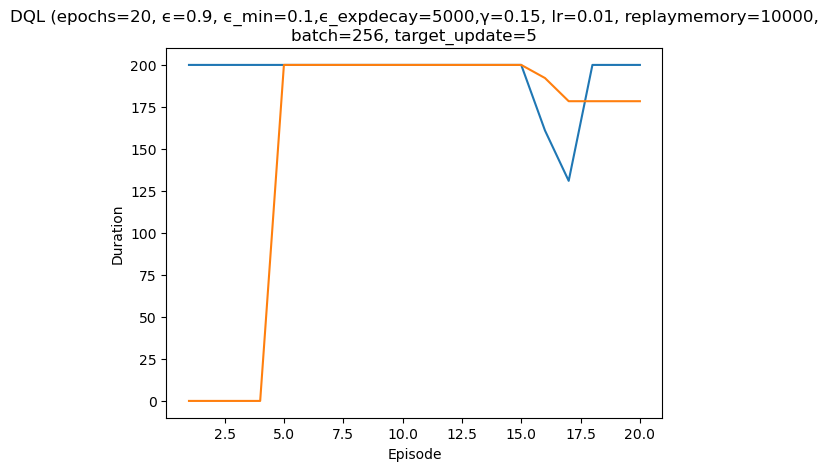

In [7]:
dqn_with_defender = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_defender,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(ep=ep, gamma=0.15, replay_memory_size=10000, target_update=5, batch_size=256, learning_rate=0.01),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL",
)

###### Exploiting DQL
Learning with: episode_count=20,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 1|Iteration 4|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 1|Iteration 4|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 1|Iteration 5|reward:  142.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 1|Iteration 5|reward:  142.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 1|Iteration 6|reward:  142.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 1|Iteration 7|reward:  142.0|last_reward_at:    5|Elapsed Time: 0:00:06||

Episode 1|Iteration 8|reward:  142.0|last_reward_at:    5|Elapsed Time: 0:00:07||

Episode 1|Iteration 9|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:08||

Episode 1|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 1|Iteration 10|reward:  256.0|last_reward_at:    9|Elapsed Time: 0:00:09||

Episode 1|Iteration 10|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 1|Iteration 11|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 1|Iteration 12|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:10||

Episode 1|Iteration 13|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:11||

Episode 1|Iteration 14|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:12||

Episode 1|Iteration 15|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:14||

Episode 1|Iteration 16|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:14||

Episode 1|Iteration 17|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:15||

Episode 1|Iteration 18|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:16||

Episode 1|Iteration 19|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:17||

Episode 1|Iteration 20|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:19||

Episode 1|Iteration 21|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:20||

Episode 1|Iteration 22|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:22||

Episode 1|Iteration 23|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:23||

Episode 1|Iteration 24|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:23||

Episode 1|Iteration 24|reward:  356.0|last_reward_at:   24|Elapsed Time: 0:00:23||

Episode 1|Iteration 25|reward:  370.0|last_reward_at:   24|Elapsed Time: 0:00:24||

Episode 1|Iteration 25|reward:  370.0|last_reward_at:   25|Elapsed Time: 0:00:24||

Episode 1|Iteration 26|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:25||

Episode 1|Iteration 26|reward:  372.0|last_reward_at:   26|Elapsed Time: 0:00:25||

Episode 1|Iteration 27|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:26||

Episode 1|Iteration 27|reward:  472.0|last_reward_at:   27|Elapsed Time: 0:00:26||

Episode 1|Iteration 28|reward:  486.0|last_reward_at:   27|Elapsed Time: 0:00:26||

Episode 1|Iteration 28|reward:  486.0|last_reward_at:   28|Elapsed Time: 0:00:26||

Episode 1|Iteration 29|reward:  492.0|last_reward_at:   28|Elapsed Time: 0:00:27||

Episode 1|Iteration 29|reward:  492.0|last_reward_at:   29|Elapsed Time: 0:00:27||

Episode 1|Iteration 30|reward:  592.0|last_reward_at:   29|Elapsed Time: 0:00:28||

Episode 1|Iteration 30|reward:  592.0|last_reward_at:   30|Elapsed Time: 0:00:28||

Episode 1|Iteration 31|reward:  606.0|last_reward_at:   30|Elapsed Time: 0:00:29||

Episode 1|Iteration 31|reward:  606.0|last_reward_at:   31|Elapsed Time: 0:00:29||

Episode 1|Iteration 32|reward:  614.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 1|Iteration 32|reward:  614.0|last_reward_at:   32|Elapsed Time: 0:00:30||

Episode 1|Iteration 33|reward:  616.0|last_reward_at:   32|Elapsed Time: 0:00:30||

Episode 1|Iteration 33|reward:  616.0|last_reward_at:   33|Elapsed Time: 0:00:30||

Episode 1|Iteration 34|reward:  616.0|last_reward_at:   33|Elapsed Time: 0:00:31||

Episode 1|Iteration 35|reward:  616.0|last_reward_at:   33|Elapsed Time: 0:00:32||

Episode 1|Iteration 36|reward:  616.0|last_reward_at:   33|Elapsed Time: 0:00:33||

Episode 1|Iteration 37|reward:  616.0|last_reward_at:   33|Elapsed Time: 0:00:33||

Episode 1|Iteration 38|reward:  618.0|last_reward_at:   33|Elapsed Time: 0:00:34||

Episode 1|Iteration 38|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:34||

Episode 1|Iteration 39|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:35||

Episode 1|Iteration 40|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:36||

Episode 1|Iteration 41|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:37||

Episode 1|Iteration 42|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:38||

Episode 1|Iteration 43|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:38||

Episode 1|Iteration 44|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:39||

Episode 1|Iteration 45|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:40||

Episode 1|Iteration 46|reward:  618.0|last_reward_at:   38|Elapsed Time: 0:00:41||

Episode 1|Iteration 47|reward:  624.0|last_reward_at:   38|Elapsed Time: 0:00:41||

Episode 1|Iteration 47|reward:  624.0|last_reward_at:   47|Elapsed Time: 0:00:41||

Episode 1|Iteration 48|reward:  624.0|last_reward_at:   47|Elapsed Time: 0:00:42||

Episode 1|Iteration 49|reward:  724.0|last_reward_at:   47|Elapsed Time: 0:00:43||

Episode 1|Iteration 49|reward:  724.0|last_reward_at:   49|Elapsed Time: 0:00:43||

Episode 1|Iteration 50|reward:  738.0|last_reward_at:   49|Elapsed Time: 0:00:44||

Episode 1|Iteration 50|reward:  738.0|last_reward_at:   50|Elapsed Time: 0:00:44||

Episode 1|Iteration 51|reward:  838.0|last_reward_at:   50|Elapsed Time: 0:00:44||

Episode 1|Iteration 51|reward:  838.0|last_reward_at:   51|Elapsed Time: 0:00:44||

Episode 1|Iteration 52|reward:  852.0|last_reward_at:   51|Elapsed Time: 0:00:45||

Episode 1|Iteration 52|reward:  852.0|last_reward_at:   52|Elapsed Time: 0:00:45||

Episode 1|Iteration 53|reward:  852.0|last_reward_at:   52|Elapsed Time: 0:00:46||

Episode 1|Iteration 54|reward:  854.0|last_reward_at:   52|Elapsed Time: 0:00:47||

Episode 1|Iteration 54|reward:  854.0|last_reward_at:   54|Elapsed Time: 0:00:47||

Episode 1|Iteration 55|reward:  856.0|last_reward_at:   54|Elapsed Time: 0:00:48||

Episode 1|Iteration 55|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:48||

Episode 1|Iteration 56|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:48||

Episode 1|Iteration 57|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:49||

Episode 1|Iteration 58|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:50||

Episode 1|Iteration 59|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:51||

Episode 1|Iteration 60|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:52||

Episode 1|Iteration 61|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:53||

Episode 1|Iteration 62|reward:  856.0|last_reward_at:   55|Elapsed Time: 0:00:54||

Episode 1|Iteration 63|reward:  956.0|last_reward_at:   55|Elapsed Time: 0:00:55||

Episode 1|Iteration 63|reward:  956.0|last_reward_at:   63|Elapsed Time: 0:00:55||

Episode 1|Iteration 64|reward:  970.0|last_reward_at:   63|Elapsed Time: 0:00:56||

Episode 1|Iteration 64|reward:  970.0|last_reward_at:   64|Elapsed Time: 0:00:56||

Episode 1|Iteration 65|reward: 1070.0|last_reward_at:   64|Elapsed Time: 0:00:57||

Episode 1|Iteration 65|reward: 1070.0|last_reward_at:   65|Elapsed Time: 0:00:57||

Episode 1|Iteration 66|reward: 1070.0|last_reward_at:   65|Elapsed Time: 0:00:57||

Episode 1|Iteration 67|reward: 1070.0|last_reward_at:   65|Elapsed Time: 0:00:58||

Episode 1|Iteration 68|reward: 1070.0|last_reward_at:   65|Elapsed Time: 0:00:59||

Episode 1|Iteration 69|reward: 1084.0|last_reward_at:   65|Elapsed Time: 0:01:00||

Episode 1|Iteration 69|reward: 1084.0|last_reward_at:   69|Elapsed Time: 0:01:00||

Episode 1|Iteration 70|reward: 1084.0|last_reward_at:   69|Elapsed Time: 0:01:01||

Episode 1|Iteration 71|reward: 1092.0|last_reward_at:   69|Elapsed Time: 0:01:02||

Episode 1|Iteration 71|reward: 1092.0|last_reward_at:   71|Elapsed Time: 0:01:02||

Episode 1|Iteration 72|reward: 1092.0|last_reward_at:   71|Elapsed Time: 0:01:03||

Episode 1|Iteration 73|reward: 1192.0|last_reward_at:   71|Elapsed Time: 0:01:03||

Episode 1|Iteration 73|reward: 1192.0|last_reward_at:   73|Elapsed Time: 0:01:03||

Episode 1|Iteration 74|reward: 1206.0|last_reward_at:   73|Elapsed Time: 0:01:04||

Episode 1|Iteration 74|reward: 1206.0|last_reward_at:   74|Elapsed Time: 0:01:04||

Episode 1|Iteration 75|reward: 1206.0|last_reward_at:   74|Elapsed Time: 0:01:05||

Episode 1|Iteration 76|reward: 6206.0|last_reward_at:   74|Elapsed Time: 0:01:06||

Episode 1|Iteration 76|reward: 6206.0|last_reward_at:   76|Elapsed Time: 0:01:06||

  Episode 1 ended at t=76 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/24 (0.33)
    exploit-remote: 10/12 (0.45)
    exploit-connect: 11/7 (0.61)
  exploit deflected to exploration: 0
  ## Episode: 2/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 2|Iteration 4|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 2|Iteration 4|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 5|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 6|reward:  138.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 6|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 2|Iteration 7|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 2|Iteration 8|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 2|Iteration 9|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 2|Iteration 10|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 2|Iteration 11|reward:  238.0|last_reward_at:    6|Elapsed Time: 0:00:09||

Episode 2|Iteration 11|reward:  238.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 2|Iteration 12|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 2|Iteration 12|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 2|Iteration 13|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 2|Iteration 14|reward:  352.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 2|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 2|Iteration 15|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:12||

Episode 2|Iteration 15|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 2|Iteration 16|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 2|Iteration 17|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 2|Iteration 18|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:14||

Episode 2|Iteration 19|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:15||

Episode 2|Iteration 20|reward:  466.0|last_reward_at:   15|Elapsed Time: 0:00:15||

Episode 2|Iteration 20|reward:  466.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 2|Iteration 21|reward:  480.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 2|Iteration 21|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 2|Iteration 22|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 2|Iteration 23|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 2|Iteration 24|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:18||

Episode 2|Iteration 25|reward:  580.0|last_reward_at:   21|Elapsed Time: 0:00:19||

Episode 2|Iteration 25|reward:  580.0|last_reward_at:   25|Elapsed Time: 0:00:19||

Episode 2|Iteration 26|reward:  580.0|last_reward_at:   25|Elapsed Time: 0:00:20||

Episode 2|Iteration 27|reward:  580.0|last_reward_at:   25|Elapsed Time: 0:00:21||

Episode 2|Iteration 28|reward:  580.0|last_reward_at:   25|Elapsed Time: 0:00:22||

Episode 2|Iteration 29|reward:  586.0|last_reward_at:   25|Elapsed Time: 0:00:23||

Episode 2|Iteration 29|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 2|Iteration 30|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 2|Iteration 31|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:24||

Episode 2|Iteration 32|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:25||

Episode 2|Iteration 33|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:26||

Episode 2|Iteration 34|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:26||

Episode 2|Iteration 35|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:27||

Episode 2|Iteration 36|reward: 5586.0|last_reward_at:   29|Elapsed Time: 0:00:28||

Episode 2|Iteration 36|reward: 5586.0|last_reward_at:   36|Elapsed Time: 0:00:28||

  Episode 2 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 5/3 (0.62)
    exploit-remote: 3/6 (0.33)
    exploit-connect: 6/13 (0.32)
  exploit deflected to exploration: 0
  ## Episode: 3/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 3|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 3|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 3|Iteration 6|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:04||

Episode 3|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 3|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 3|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 3|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 3|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 9|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 3|Iteration 9|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 3|Iteration 10|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 3|Iteration 11|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 3|Iteration 11|reward:  456.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 3|Iteration 12|reward:  470.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 3|Iteration 12|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 3|Iteration 13|reward:  470.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 3|Iteration 14|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 3|Iteration 14|reward:  570.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 3|Iteration 15|reward:  584.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 3|Iteration 15|reward:  584.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 3|Iteration 16|reward:  586.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 3|Iteration 16|reward:  586.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 3|Iteration 17|reward:  592.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 3|Iteration 17|reward:  592.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 3|Iteration 18|reward:  592.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 3|Iteration 19|reward:  692.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 3|Iteration 19|reward:  692.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 3|Iteration 20|reward:  692.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 3|Iteration 21|reward:  706.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 3|Iteration 21|reward:  706.0|last_reward_at:   21|Elapsed Time: 0:00:15||

Episode 3|Iteration 22|reward:  706.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 3|Iteration 23|reward:  706.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 3|Iteration 24|reward:  806.0|last_reward_at:   21|Elapsed Time: 0:00:18||

Episode 3|Iteration 24|reward:  806.0|last_reward_at:   24|Elapsed Time: 0:00:18||

Episode 3|Iteration 25|reward:  820.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 3|Iteration 25|reward:  820.0|last_reward_at:   25|Elapsed Time: 0:00:19||

Episode 3|Iteration 26|reward:  828.0|last_reward_at:   25|Elapsed Time: 0:00:19||

Episode 3|Iteration 26|reward:  828.0|last_reward_at:   26|Elapsed Time: 0:00:19||

Episode 3|Iteration 27|reward:  928.0|last_reward_at:   26|Elapsed Time: 0:00:20||

Episode 3|Iteration 27|reward:  928.0|last_reward_at:   27|Elapsed Time: 0:00:20||

Episode 3|Iteration 28|reward:  928.0|last_reward_at:   27|Elapsed Time: 0:00:21||

Episode 3|Iteration 29|reward:  942.0|last_reward_at:   27|Elapsed Time: 0:00:22||

Episode 3|Iteration 29|reward:  942.0|last_reward_at:   29|Elapsed Time: 0:00:22||

Episode 3|Iteration 30|reward: 1042.0|last_reward_at:   29|Elapsed Time: 0:00:22||

Episode 3|Iteration 30|reward: 1042.0|last_reward_at:   30|Elapsed Time: 0:00:22||

Episode 3|Iteration 31|reward: 1056.0|last_reward_at:   30|Elapsed Time: 0:00:23||

Episode 3|Iteration 31|reward: 1056.0|last_reward_at:   31|Elapsed Time: 0:00:23||

Episode 3|Iteration 32|reward: 1058.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 3|Iteration 32|reward: 1058.0|last_reward_at:   32|Elapsed Time: 0:00:24||

Episode 3|Iteration 33|reward: 1158.0|last_reward_at:   32|Elapsed Time: 0:00:25||

Episode 3|Iteration 33|reward: 1158.0|last_reward_at:   33|Elapsed Time: 0:00:25||

Episode 3|Iteration 34|reward: 1158.0|last_reward_at:   33|Elapsed Time: 0:00:26||

Episode 3|Iteration 35|reward: 1172.0|last_reward_at:   33|Elapsed Time: 0:00:26||

Episode 3|Iteration 35|reward: 1172.0|last_reward_at:   35|Elapsed Time: 0:00:26||

Episode 3|Iteration 36|reward: 6172.0|last_reward_at:   35|Elapsed Time: 0:00:27||

Episode 3|Iteration 36|reward: 6172.0|last_reward_at:   36|Elapsed Time: 0:00:27||

  Episode 3 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/4 (0.75)
    exploit-remote: 3/0 (1.00)
    exploit-connect: 11/6 (0.65)
  exploit deflected to exploration: 0
  ## Episode: 4/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 4|Iteration 4|reward:  136.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 4|Iteration 4|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 5|reward:  236.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 5|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 4|Iteration 6|reward:  250.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 4|Iteration 6|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 4|Iteration 7|reward:  250.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 4|Iteration 8|reward:  350.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 4|Iteration 8|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 4|Iteration 9|reward:  364.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 4|Iteration 9|reward:  364.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 4|Iteration 10|reward:  464.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 4|Iteration 10|reward:  464.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 4|Iteration 11|reward:  464.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 4|Iteration 12|reward:  466.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 4|Iteration 12|reward:  466.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 4|Iteration 13|reward:  466.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 4|Iteration 14|reward:  466.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 4|Iteration 15|reward:  466.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 4|Iteration 16|reward: 5466.0|last_reward_at:   12|Elapsed Time: 0:00:13||

Episode 4|Iteration 16|reward: 5466.0|last_reward_at:   16|Elapsed Time: 0:00:13||

  Episode 4 ended at t=16 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 4/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 0
  ## Episode: 5/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 5|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 5|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 5|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 5|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 5|Iteration 9|reward:  462.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 5|Iteration 9|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 5|Iteration 10|reward:  476.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 5|Iteration 10|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 5|Iteration 11|reward:  576.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 5|Iteration 11|reward:  576.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 5|Iteration 12|reward:  590.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 5|Iteration 12|reward:  590.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 5|Iteration 13|reward:  590.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 5|Iteration 14|reward:  690.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 5|Iteration 14|reward:  690.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 5|Iteration 15|reward:  704.0|last_reward_at:   14|Elapsed Time: 0:00:12||

Episode 5|Iteration 15|reward:  704.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 5|Iteration 16|reward:  804.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 5|Iteration 16|reward:  804.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 5|Iteration 17|reward:  818.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 5|Iteration 17|reward:  818.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 5|Iteration 18|reward:  918.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 5|Iteration 18|reward:  918.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 5|Iteration 19|reward:  932.0|last_reward_at:   18|Elapsed Time: 0:00:15||

Episode 5|Iteration 19|reward:  932.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 5|Iteration 20|reward:  932.0|last_reward_at:   19|Elapsed Time: 0:00:16||

Episode 5|Iteration 21|reward:  932.0|last_reward_at:   19|Elapsed Time: 0:00:17||

Episode 5|Iteration 22|reward:  932.0|last_reward_at:   19|Elapsed Time: 0:00:17||

Episode 5|Iteration 23|reward:  934.0|last_reward_at:   19|Elapsed Time: 0:00:18||

Episode 5|Iteration 23|reward:  934.0|last_reward_at:   23|Elapsed Time: 0:00:18||

Episode 5|Iteration 24|reward:  940.0|last_reward_at:   23|Elapsed Time: 0:00:19||

Episode 5|Iteration 24|reward:  940.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 5|Iteration 25|reward:  940.0|last_reward_at:   24|Elapsed Time: 0:00:20||

Episode 5|Iteration 26|reward:  940.0|last_reward_at:   24|Elapsed Time: 0:00:21||

Episode 5|Iteration 27|reward:  940.0|last_reward_at:   24|Elapsed Time: 0:00:22||

Episode 5|Iteration 28|reward:  940.0|last_reward_at:   24|Elapsed Time: 0:00:22||

Episode 5|Iteration 29|reward:  942.0|last_reward_at:   24|Elapsed Time: 0:00:23||

Episode 5|Iteration 29|reward:  942.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 5|Iteration 30|reward:  942.0|last_reward_at:   29|Elapsed Time: 0:00:24||

Episode 5|Iteration 31|reward:  946.0|last_reward_at:   29|Elapsed Time: 0:00:25||

Episode 5|Iteration 31|reward:  946.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 5|Iteration 32|reward:  946.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 5|Iteration 33|reward:  952.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 5|Iteration 33|reward:  952.0|last_reward_at:   33|Elapsed Time: 0:00:26||

Episode 5|Iteration 34|reward:  952.0|last_reward_at:   33|Elapsed Time: 0:00:27||

Episode 5|Iteration 35|reward: 1052.0|last_reward_at:   33|Elapsed Time: 0:00:28||

Episode 5|Iteration 35|reward: 1052.0|last_reward_at:   35|Elapsed Time: 0:00:28||

Episode 5|Iteration 36|reward: 1066.0|last_reward_at:   35|Elapsed Time: 0:00:28||

Episode 5|Iteration 36|reward: 1066.0|last_reward_at:   36|Elapsed Time: 0:00:28||

Episode 5|Iteration 37|reward: 1066.0|last_reward_at:   36|Elapsed Time: 0:00:29||

Episode 5|Iteration 38|reward: 1166.0|last_reward_at:   36|Elapsed Time: 0:00:30||

Episode 5|Iteration 38|reward: 1166.0|last_reward_at:   38|Elapsed Time: 0:00:30||

Episode 5|Iteration 39|reward: 1180.0|last_reward_at:   38|Elapsed Time: 0:00:31||

Episode 5|Iteration 39|reward: 1180.0|last_reward_at:   39|Elapsed Time: 0:00:31||

Episode 5|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:32||

Episode 5|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:32||

Episode 5|Iteration 41|reward: 7180.0|last_reward_at:   40|Elapsed Time: 0:00:33||

Episode 5|Iteration 41|reward: 7180.0|last_reward_at:   41|Elapsed Time: 0:00:33||

  Episode 5 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/4 (0.73)
    exploit-remote: 6/2 (0.75)
    exploit-connect: 12/6 (0.67)
  exploit deflected to exploration: 0
  ## Episode: 6/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 6|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 6|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 6|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 6|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 6|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 6|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 6|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 6|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 6|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 6|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 6|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 6|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 6|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 6|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 6|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 6|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 6|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 6|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 6|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 6|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 6|Iteration 14|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:11||

Episode 6|Iteration 15|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:12||

Episode 6|Iteration 15|reward:  798.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 6|Iteration 16|reward:  800.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 6|Iteration 16|reward:  800.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 6|Iteration 17|reward:  814.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 6|Iteration 17|reward:  814.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 6|Iteration 18|reward:  914.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 6|Iteration 18|reward:  914.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 6|Iteration 19|reward:  928.0|last_reward_at:   18|Elapsed Time: 0:00:15||

Episode 6|Iteration 19|reward:  928.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 6|Iteration 20|reward: 1028.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 6|Iteration 20|reward: 1028.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 6|Iteration 21|reward: 1042.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 6|Iteration 21|reward: 1042.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 6|Iteration 22|reward: 1142.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 6|Iteration 22|reward: 1142.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 6|Iteration 23|reward: 1156.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 6|Iteration 23|reward: 1156.0|last_reward_at:   23|Elapsed Time: 0:00:18||

Episode 6|Iteration 24|reward: 2156.0|last_reward_at:   23|Elapsed Time: 0:00:19||

Episode 6|Iteration 24|reward: 2156.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 6|Iteration 25|reward: 2162.0|last_reward_at:   24|Elapsed Time: 0:00:20||

Episode 6|Iteration 25|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:20||

Episode 6|Iteration 26|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:22||

Episode 6|Iteration 27|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:24||

Episode 6|Iteration 28|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:25||

Episode 6|Iteration 29|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:27||

Episode 6|Iteration 30|reward: 2168.0|last_reward_at:   25|Elapsed Time: 0:00:28||

Episode 6|Iteration 30|reward: 2168.0|last_reward_at:   30|Elapsed Time: 0:00:28||

Episode 6|Iteration 31|reward: 2174.0|last_reward_at:   30|Elapsed Time: 0:00:30||

Episode 6|Iteration 31|reward: 2174.0|last_reward_at:   31|Elapsed Time: 0:00:30||

Episode 6|Iteration 32|reward: 2174.0|last_reward_at:   31|Elapsed Time: 0:00:32||

Episode 6|Iteration 33|reward: 2174.0|last_reward_at:   31|Elapsed Time: 0:00:33||

Episode 6|Iteration 34|reward: 2180.0|last_reward_at:   31|Elapsed Time: 0:00:35||

Episode 6|Iteration 34|reward: 2180.0|last_reward_at:   34|Elapsed Time: 0:00:35||

Episode 6|Iteration 35|reward: 2180.0|last_reward_at:   34|Elapsed Time: 0:00:36||

Episode 6|Iteration 36|reward: 2180.0|last_reward_at:   34|Elapsed Time: 0:00:38||

Episode 6|Iteration 37|reward: 2180.0|last_reward_at:   34|Elapsed Time: 0:00:39||

Episode 6|Iteration 38|reward: 2186.0|last_reward_at:   34|Elapsed Time: 0:00:41||

Episode 6|Iteration 38|reward: 2186.0|last_reward_at:   38|Elapsed Time: 0:00:41||

Episode 6|Iteration 39|reward: 2186.0|last_reward_at:   38|Elapsed Time: 0:00:42||

Episode 6|Iteration 40|reward: 2192.0|last_reward_at:   38|Elapsed Time: 0:00:43||

Episode 6|Iteration 40|reward: 2192.0|last_reward_at:   40|Elapsed Time: 0:00:43||

Episode 6|Iteration 41|reward: 2192.0|last_reward_at:   40|Elapsed Time: 0:00:43||

Episode 6|Iteration 42|reward: 2192.0|last_reward_at:   40|Elapsed Time: 0:00:44||

Episode 6|Iteration 43|reward: 2192.0|last_reward_at:   40|Elapsed Time: 0:00:45||

Episode 6|Iteration 44|reward: 2192.0|last_reward_at:   40|Elapsed Time: 0:00:46||

Episode 6|Iteration 45|reward: 2192.0|last_reward_at:   40|Elapsed Time: 0:00:47||

Episode 6|Iteration 46|reward: 7192.0|last_reward_at:   40|Elapsed Time: 0:00:48||

Episode 6|Iteration 46|reward: 7192.0|last_reward_at:   46|Elapsed Time: 0:00:48||

  Episode 6 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 14/2 (0.88)
    exploit-remote: 5/2 (0.71)
    exploit-connect: 11/12 (0.48)
  exploit deflected to exploration: 0
  ## Episode: 7/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 7|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 7|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 7|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 7|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 7|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 7|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 7|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 7|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 7|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 7|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 7|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 7|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 7|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 7|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 7|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 7|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 7|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 7|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 7|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 7|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 7|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 7|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 7|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 7|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 7|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 7|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 7|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 7|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 7|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 7|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 7|Iteration 20|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 7|Iteration 21|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:16||

Episode 7|Iteration 22|reward: 1046.0|last_reward_at:   19|Elapsed Time: 0:00:17||

Episode 7|Iteration 22|reward: 1046.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 7|Iteration 23|reward: 1046.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 7|Iteration 24|reward: 1048.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 7|Iteration 24|reward: 1048.0|last_reward_at:   24|Elapsed Time: 0:00:18||

Episode 7|Iteration 25|reward: 1048.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 7|Iteration 26|reward: 6048.0|last_reward_at:   24|Elapsed Time: 0:00:20||

Episode 7|Iteration 26|reward: 6048.0|last_reward_at:   26|Elapsed Time: 0:00:20||

  Episode 7 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 10/1 (0.91)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 9/2 (0.82)
  exploit deflected to exploration: 0
  ## Episode: 8/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 8|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 8|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 8|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 8|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 8|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 8|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 8|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 8|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 8|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 8|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 8|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 8|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 8|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 8|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 8|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 8|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 8|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 8|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 8|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 8|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 8|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 8|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 8|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 8|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 8|Iteration 16|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 8|Iteration 17|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 8|Iteration 18|reward:  818.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 8|Iteration 18|reward:  818.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 8|Iteration 19|reward:  824.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 8|Iteration 19|reward:  824.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 8|Iteration 20|reward:  824.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 8|Iteration 21|reward: 5824.0|last_reward_at:   19|Elapsed Time: 0:00:16||

Episode 8|Iteration 21|reward: 5824.0|last_reward_at:   21|Elapsed Time: 0:00:16||

  Episode 8 ended at t=21 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 10/2 (0.83)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 9|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 9|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 9|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 9|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 9|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 9|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 9|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 9|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 9|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 9|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 9|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 9|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 9|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 9|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 9|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 9|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 9|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 9|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 9|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 9|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 9|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 9|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 9|Iteration 16|reward:  820.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 9|Iteration 16|reward:  820.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 9|Iteration 17|reward:  820.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 9|Iteration 18|reward:  826.0|last_reward_at:   16|Elapsed Time: 0:00:14||

Episode 9|Iteration 18|reward:  826.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 9|Iteration 19|reward:  826.0|last_reward_at:   18|Elapsed Time: 0:00:15||

Episode 9|Iteration 20|reward:  832.0|last_reward_at:   18|Elapsed Time: 0:00:15||

Episode 9|Iteration 20|reward:  832.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 9|Iteration 21|reward:  834.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 9|Iteration 21|reward:  834.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 9|Iteration 22|reward:  840.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 9|Iteration 22|reward:  840.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 9|Iteration 23|reward:  840.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 9|Iteration 24|reward:  840.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 9|Iteration 25|reward:  840.0|last_reward_at:   22|Elapsed Time: 0:00:19||

Episode 9|Iteration 26|reward:  840.0|last_reward_at:   22|Elapsed Time: 0:00:20||

Episode 9|Iteration 27|reward:  840.0|last_reward_at:   22|Elapsed Time: 0:00:21||

Episode 9|Iteration 28|reward:  846.0|last_reward_at:   22|Elapsed Time: 0:00:21||

Episode 9|Iteration 28|reward:  846.0|last_reward_at:   28|Elapsed Time: 0:00:21||

Episode 9|Iteration 29|reward:  848.0|last_reward_at:   28|Elapsed Time: 0:00:22||

Episode 9|Iteration 29|reward:  848.0|last_reward_at:   29|Elapsed Time: 0:00:22||

Episode 9|Iteration 30|reward:  850.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 9|Iteration 30|reward:  850.0|last_reward_at:   30|Elapsed Time: 0:00:23||

Episode 9|Iteration 31|reward:  850.0|last_reward_at:   30|Elapsed Time: 0:00:24||

Episode 9|Iteration 32|reward:  850.0|last_reward_at:   30|Elapsed Time: 0:00:25||

Episode 9|Iteration 33|reward:  850.0|last_reward_at:   30|Elapsed Time: 0:00:25||

Episode 9|Iteration 34|reward:  850.0|last_reward_at:   30|Elapsed Time: 0:00:26||

Episode 9|Iteration 35|reward:  850.0|last_reward_at:   30|Elapsed Time: 0:00:27||

Episode 9|Iteration 36|reward:  852.0|last_reward_at:   30|Elapsed Time: 0:00:28||

Episode 9|Iteration 36|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:28||

Episode 9|Iteration 37|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:28||

Episode 9|Iteration 38|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:29||

Episode 9|Iteration 39|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:30||

Episode 9|Iteration 40|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:31||

Episode 9|Iteration 41|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:31||

Episode 9|Iteration 42|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:32||

Episode 9|Iteration 43|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:33||

Episode 9|Iteration 44|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:34||

Episode 9|Iteration 45|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:34||

Episode 9|Iteration 46|reward:  852.0|last_reward_at:   36|Elapsed Time: 0:00:35||

Episode 9|Iteration 47|reward:  952.0|last_reward_at:   36|Elapsed Time: 0:00:36||

Episode 9|Iteration 47|reward:  952.0|last_reward_at:   47|Elapsed Time: 0:00:36||

Episode 9|Iteration 48|reward:  966.0|last_reward_at:   47|Elapsed Time: 0:00:37||

Episode 9|Iteration 48|reward:  966.0|last_reward_at:   48|Elapsed Time: 0:00:37||

Episode 9|Iteration 49|reward: 1066.0|last_reward_at:   48|Elapsed Time: 0:00:38||

Episode 9|Iteration 49|reward: 1066.0|last_reward_at:   49|Elapsed Time: 0:00:38||

Episode 9|Iteration 50|reward: 1080.0|last_reward_at:   49|Elapsed Time: 0:00:38||

Episode 9|Iteration 50|reward: 1080.0|last_reward_at:   50|Elapsed Time: 0:00:38||

Episode 9|Iteration 51|reward: 1180.0|last_reward_at:   50|Elapsed Time: 0:00:39||

Episode 9|Iteration 51|reward: 1180.0|last_reward_at:   51|Elapsed Time: 0:00:39||

Episode 9|Iteration 52|reward: 1194.0|last_reward_at:   51|Elapsed Time: 0:00:40||

Episode 9|Iteration 52|reward: 1194.0|last_reward_at:   52|Elapsed Time: 0:00:40||

Episode 9|Iteration 53|reward: 1194.0|last_reward_at:   52|Elapsed Time: 0:00:41||

Episode 9|Iteration 54|reward: 2194.0|last_reward_at:   52|Elapsed Time: 0:00:41||

Episode 9|Iteration 54|reward: 2194.0|last_reward_at:   54|Elapsed Time: 0:00:41||

Episode 9|Iteration 55|reward: 2194.0|last_reward_at:   54|Elapsed Time: 0:00:43||

Episode 9|Iteration 56|reward: 2194.0|last_reward_at:   54|Elapsed Time: 0:00:45||

Episode 9|Iteration 57|reward: 2194.0|last_reward_at:   54|Elapsed Time: 0:00:45||

Episode 9|Iteration 58|reward: 2194.0|last_reward_at:   54|Elapsed Time: 0:00:46||

Episode 9|Iteration 59|reward: 2194.0|last_reward_at:   54|Elapsed Time: 0:00:48||

Episode 9|Iteration 60|reward: 2194.0|last_reward_at:   54|Elapsed Time: 0:00:49||

Episode 9|Iteration 61|reward: 7194.0|last_reward_at:   54|Elapsed Time: 0:00:50||

Episode 9|Iteration 61|reward: 7194.0|last_reward_at:   61|Elapsed Time: 0:00:50||

  Episode 9 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/2 (0.86)
    exploit-remote: 9/20 (0.31)
    exploit-connect: 11/7 (0.61)
  exploit deflected to exploration: 0
  ## Episode: 10/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 10|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 10|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 10|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 10|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 10|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 10|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 10|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 10|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 10|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 10|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 10|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 10|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 10|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 10|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 10|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 10|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 10|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 10|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 10|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 10|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 10|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 10|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 10|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 10|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 10|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 10|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 10|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 10|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 10|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 10|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 10|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 10|Iteration 22|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 10|Iteration 23|reward: 2154.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 10|Iteration 23|reward: 2154.0|last_reward_at:   23|Elapsed Time: 0:00:17||

Episode 10|Iteration 24|reward: 2160.0|last_reward_at:   23|Elapsed Time: 0:00:18||

Episode 10|Iteration 24|reward: 2160.0|last_reward_at:   24|Elapsed Time: 0:00:18||

Episode 10|Iteration 25|reward: 2162.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 10|Iteration 25|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:19||

Episode 10|Iteration 26|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:21||

Episode 10|Iteration 27|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:22||

Episode 10|Iteration 28|reward: 2162.0|last_reward_at:   25|Elapsed Time: 0:00:22||

Episode 10|Iteration 29|reward: 2168.0|last_reward_at:   25|Elapsed Time: 0:00:23||

Episode 10|Iteration 29|reward: 2168.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 10|Iteration 30|reward: 2174.0|last_reward_at:   29|Elapsed Time: 0:00:24||

Episode 10|Iteration 30|reward: 2174.0|last_reward_at:   30|Elapsed Time: 0:00:24||

Episode 10|Iteration 31|reward: 2176.0|last_reward_at:   30|Elapsed Time: 0:00:25||

Episode 10|Iteration 31|reward: 2176.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 10|Iteration 32|reward: 2178.0|last_reward_at:   31|Elapsed Time: 0:00:26||

Episode 10|Iteration 32|reward: 2178.0|last_reward_at:   32|Elapsed Time: 0:00:26||

Episode 10|Iteration 33|reward: 2178.0|last_reward_at:   32|Elapsed Time: 0:00:26||

Episode 10|Iteration 34|reward: 2178.0|last_reward_at:   32|Elapsed Time: 0:00:27||

Episode 10|Iteration 35|reward: 2178.0|last_reward_at:   32|Elapsed Time: 0:00:28||

Episode 10|Iteration 36|reward: 2178.0|last_reward_at:   32|Elapsed Time: 0:00:29||

Episode 10|Iteration 37|reward: 2178.0|last_reward_at:   32|Elapsed Time: 0:00:30||

Episode 10|Iteration 38|reward: 2180.0|last_reward_at:   32|Elapsed Time: 0:00:30||

Episode 10|Iteration 38|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:30||

Episode 10|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:31||

Episode 10|Iteration 40|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:32||

Episode 10|Iteration 41|reward: 7180.0|last_reward_at:   38|Elapsed Time: 0:00:35||

Episode 10|Iteration 41|reward: 7180.0|last_reward_at:   41|Elapsed Time: 0:00:35||

  Episode 10 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/0 (1.00)
    exploit-remote: 7/9 (0.44)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 11/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 11|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 11|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 11|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 11|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 11|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 11|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 11|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 11|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 11|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 11|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 11|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 11|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 11|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 11|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 11|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 11|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 11|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 11|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 11|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 11|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 11|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 11|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 11|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 11|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 11|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 11|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 11|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 11|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 11|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 11|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 11|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 11|Iteration 18|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 11|Iteration 19|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:15||

Episode 11|Iteration 19|reward: 1026.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 11|Iteration 20|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 11|Iteration 20|reward: 1040.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 11|Iteration 21|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 11|Iteration 21|reward: 1140.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 11|Iteration 22|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 11|Iteration 22|reward: 1154.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 11|Iteration 23|reward: 1154.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 11|Iteration 24|reward: 1154.0|last_reward_at:   22|Elapsed Time: 0:00:19||

Episode 11|Iteration 25|reward: 1160.0|last_reward_at:   22|Elapsed Time: 0:00:19||

Episode 11|Iteration 25|reward: 1160.0|last_reward_at:   25|Elapsed Time: 0:00:19||

Episode 11|Iteration 26|reward: 1160.0|last_reward_at:   25|Elapsed Time: 0:00:20||

Episode 11|Iteration 27|reward: 1160.0|last_reward_at:   25|Elapsed Time: 0:00:21||

Episode 11|Iteration 28|reward: 1162.0|last_reward_at:   25|Elapsed Time: 0:00:22||

Episode 11|Iteration 28|reward: 1162.0|last_reward_at:   28|Elapsed Time: 0:00:22||

Episode 11|Iteration 29|reward: 1168.0|last_reward_at:   28|Elapsed Time: 0:00:23||

Episode 11|Iteration 29|reward: 1168.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 11|Iteration 30|reward: 2168.0|last_reward_at:   29|Elapsed Time: 0:00:23||

Episode 11|Iteration 30|reward: 2168.0|last_reward_at:   30|Elapsed Time: 0:00:23||

Episode 11|Iteration 31|reward: 2168.0|last_reward_at:   30|Elapsed Time: 0:00:24||

Episode 11|Iteration 32|reward: 2174.0|last_reward_at:   30|Elapsed Time: 0:00:25||

Episode 11|Iteration 32|reward: 2174.0|last_reward_at:   32|Elapsed Time: 0:00:25||

Episode 11|Iteration 33|reward: 2174.0|last_reward_at:   32|Elapsed Time: 0:00:26||

Episode 11|Iteration 34|reward: 2176.0|last_reward_at:   32|Elapsed Time: 0:00:27||

Episode 11|Iteration 34|reward: 2176.0|last_reward_at:   34|Elapsed Time: 0:00:27||

Episode 11|Iteration 35|reward: 2176.0|last_reward_at:   34|Elapsed Time: 0:00:27||

Episode 11|Iteration 36|reward: 2176.0|last_reward_at:   34|Elapsed Time: 0:00:29||

Episode 11|Iteration 37|reward: 2176.0|last_reward_at:   34|Elapsed Time: 0:00:32||

Episode 11|Iteration 38|reward: 2176.0|last_reward_at:   34|Elapsed Time: 0:00:35||

Episode 11|Iteration 39|reward: 2176.0|last_reward_at:   34|Elapsed Time: 0:00:37||

Episode 11|Iteration 40|reward: 2176.0|last_reward_at:   34|Elapsed Time: 0:00:38||

Episode 11|Iteration 41|reward: 2176.0|last_reward_at:   34|Elapsed Time: 0:00:40||

Episode 11|Iteration 42|reward: 2182.0|last_reward_at:   34|Elapsed Time: 0:00:40||

Episode 11|Iteration 42|reward: 2182.0|last_reward_at:   42|Elapsed Time: 0:00:40||

Episode 11|Iteration 43|reward: 2182.0|last_reward_at:   42|Elapsed Time: 0:00:42||

Episode 11|Iteration 44|reward: 2182.0|last_reward_at:   42|Elapsed Time: 0:00:44||

Episode 11|Iteration 45|reward: 2184.0|last_reward_at:   42|Elapsed Time: 0:00:46||

Episode 11|Iteration 45|reward: 2184.0|last_reward_at:   45|Elapsed Time: 0:00:46||

Episode 11|Iteration 46|reward: 2184.0|last_reward_at:   45|Elapsed Time: 0:00:47||

Episode 11|Iteration 47|reward: 2186.0|last_reward_at:   45|Elapsed Time: 0:00:48||

Episode 11|Iteration 47|reward: 2186.0|last_reward_at:   47|Elapsed Time: 0:00:48||

Episode 11|Iteration 48|reward: 2186.0|last_reward_at:   47|Elapsed Time: 0:00:49||

Episode 11|Iteration 49|reward: 2186.0|last_reward_at:   47|Elapsed Time: 0:00:50||

Episode 11|Iteration 50|reward: 2186.0|last_reward_at:   47|Elapsed Time: 0:00:51||

Episode 11|Iteration 51|reward: 2186.0|last_reward_at:   47|Elapsed Time: 0:00:51||

Episode 11|Iteration 52|reward: 2192.0|last_reward_at:   47|Elapsed Time: 0:00:52||

Episode 11|Iteration 52|reward: 2192.0|last_reward_at:   52|Elapsed Time: 0:00:52||

Episode 11|Iteration 53|reward: 2192.0|last_reward_at:   52|Elapsed Time: 0:00:53||

Episode 11|Iteration 54|reward: 2192.0|last_reward_at:   52|Elapsed Time: 0:00:54||

Episode 11|Iteration 55|reward: 2192.0|last_reward_at:   52|Elapsed Time: 0:00:55||

Episode 11|Iteration 56|reward: 2192.0|last_reward_at:   52|Elapsed Time: 0:01:05||

Episode 11|Iteration 57|reward: 2198.0|last_reward_at:   52|Elapsed Time: 0:01:06||

Episode 11|Iteration 57|reward: 2198.0|last_reward_at:   57|Elapsed Time: 0:01:06||

Episode 11|Iteration 58|reward: 2198.0|last_reward_at:   57|Elapsed Time: 0:01:07||

Episode 11|Iteration 59|reward: 2204.0|last_reward_at:   57|Elapsed Time: 0:01:08||

Episode 11|Iteration 59|reward: 2204.0|last_reward_at:   59|Elapsed Time: 0:01:08||

Episode 11|Iteration 60|reward: 2204.0|last_reward_at:   59|Elapsed Time: 0:01:08||

Episode 11|Iteration 61|reward: 7204.0|last_reward_at:   59|Elapsed Time: 0:01:09||

Episode 11|Iteration 61|reward: 7204.0|last_reward_at:   61|Elapsed Time: 0:01:09||

  Episode 11 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 13/4 (0.76)
    exploit-remote: 9/11 (0.45)
    exploit-connect: 12/11 (0.52)
  exploit deflected to exploration: 1
  ## Episode: 12/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 12|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 12|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 12|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 12|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 12|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 12|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 12|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 12|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 12|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 12|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 12|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 12|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 12|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 12|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 12|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 12|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 12|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 12|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 12|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 12|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 12|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 12|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 12|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 12|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 12|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 12|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 12|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 12|Iteration 16|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 12|Iteration 17|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 12|Iteration 18|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 12|Iteration 19|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:14||

Episode 12|Iteration 20|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:15||

Episode 12|Iteration 20|reward:  912.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 12|Iteration 21|reward:  926.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 12|Iteration 21|reward:  926.0|last_reward_at:   21|Elapsed Time: 0:00:15||

Episode 12|Iteration 22|reward: 1026.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 12|Iteration 22|reward: 1026.0|last_reward_at:   22|Elapsed Time: 0:00:16||

Episode 12|Iteration 23|reward: 1040.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 12|Iteration 23|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:00:17||

Episode 12|Iteration 24|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:00:18||

Episode 12|Iteration 25|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:00:19||

Episode 12|Iteration 26|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:00:20||

Episode 12|Iteration 27|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:00:21||

Episode 12|Iteration 28|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:00:22||

Episode 12|Iteration 29|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:00:22||

Episode 12|Iteration 30|reward: 1140.0|last_reward_at:   23|Elapsed Time: 0:00:23||

Episode 12|Iteration 30|reward: 1140.0|last_reward_at:   30|Elapsed Time: 0:00:23||

Episode 12|Iteration 31|reward: 1154.0|last_reward_at:   30|Elapsed Time: 0:00:24||

Episode 12|Iteration 31|reward: 1154.0|last_reward_at:   31|Elapsed Time: 0:00:24||

Episode 12|Iteration 32|reward: 2154.0|last_reward_at:   31|Elapsed Time: 0:00:25||

Episode 12|Iteration 32|reward: 2154.0|last_reward_at:   32|Elapsed Time: 0:00:25||

Episode 12|Iteration 33|reward: 2156.0|last_reward_at:   32|Elapsed Time: 0:00:26||

Episode 12|Iteration 33|reward: 2156.0|last_reward_at:   33|Elapsed Time: 0:00:26||

Episode 12|Iteration 34|reward: 2156.0|last_reward_at:   33|Elapsed Time: 0:00:27||

Episode 12|Iteration 35|reward: 2162.0|last_reward_at:   33|Elapsed Time: 0:00:28||

Episode 12|Iteration 35|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:28||

Episode 12|Iteration 36|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:29||

Episode 12|Iteration 37|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:30||

Episode 12|Iteration 38|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:32||

Episode 12|Iteration 39|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:34||

Episode 12|Iteration 40|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:35||

Episode 12|Iteration 41|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:37||

Episode 12|Iteration 42|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:38||

Episode 12|Iteration 43|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:40||

Episode 12|Iteration 44|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:41||

Episode 12|Iteration 45|reward: 2162.0|last_reward_at:   35|Elapsed Time: 0:00:42||

Episode 12|Iteration 46|reward: 7162.0|last_reward_at:   35|Elapsed Time: 0:00:44||

Episode 12|Iteration 46|reward: 7162.0|last_reward_at:   46|Elapsed Time: 0:00:44||

  Episode 12 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/1 (0.92)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 12/19 (0.39)
  exploit deflected to exploration: 0
  ## Episode: 13/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 13|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 13|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 13|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 13|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 13|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 13|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 13|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 13|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 13|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 13|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 13|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 13|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 13|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 13|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 13|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 13|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 13|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 13|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 13|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 13|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 13|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 13|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 13|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 13|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 13|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 13|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 13|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 13|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 13|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 13|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 13|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 13|Iteration 18|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 13|Iteration 19|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 13|Iteration 20|reward:  932.0|last_reward_at:   17|Elapsed Time: 0:00:15||

Episode 13|Iteration 20|reward:  932.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 13|Iteration 21|reward:  938.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 13|Iteration 21|reward:  938.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 13|Iteration 22|reward:  938.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 13|Iteration 23|reward: 1038.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 13|Iteration 23|reward: 1038.0|last_reward_at:   23|Elapsed Time: 0:00:17||

Episode 13|Iteration 24|reward: 1052.0|last_reward_at:   23|Elapsed Time: 0:00:18||

Episode 13|Iteration 24|reward: 1052.0|last_reward_at:   24|Elapsed Time: 0:00:18||

Episode 13|Iteration 25|reward: 1152.0|last_reward_at:   24|Elapsed Time: 0:00:19||

Episode 13|Iteration 25|reward: 1152.0|last_reward_at:   25|Elapsed Time: 0:00:19||

Episode 13|Iteration 26|reward: 6152.0|last_reward_at:   25|Elapsed Time: 0:00:20||

Episode 13|Iteration 26|reward: 6152.0|last_reward_at:   26|Elapsed Time: 0:00:20||

  Episode 13 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 14/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 14|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 14|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 14|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 14|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 14|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 14|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 14|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 14|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 14|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 14|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 14|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 14|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 14|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 14|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 14|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 14|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 14|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 14|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 14|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 14|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 14|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 14|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 14|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 14|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 14|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 14|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 14|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 14|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 14|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 14|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 14|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 14|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 14|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 14|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 14|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 14|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 14|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 14|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 14|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 14|Iteration 22|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 14|Iteration 23|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 14|Iteration 24|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:18||

Episode 14|Iteration 25|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:19||

Episode 14|Iteration 26|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:20||

Episode 14|Iteration 27|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:21||

Episode 14|Iteration 28|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:22||

Episode 14|Iteration 29|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:22||

Episode 14|Iteration 30|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:23||

Episode 14|Iteration 31|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:24||

Episode 14|Iteration 32|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:25||

Episode 14|Iteration 33|reward: 1160.0|last_reward_at:   21|Elapsed Time: 0:00:26||

Episode 14|Iteration 33|reward: 1160.0|last_reward_at:   33|Elapsed Time: 0:00:26||

Episode 14|Iteration 34|reward: 1160.0|last_reward_at:   33|Elapsed Time: 0:00:27||

Episode 14|Iteration 35|reward: 1160.0|last_reward_at:   33|Elapsed Time: 0:00:27||

Episode 14|Iteration 36|reward: 1160.0|last_reward_at:   33|Elapsed Time: 0:00:28||

Episode 14|Iteration 37|reward: 1160.0|last_reward_at:   33|Elapsed Time: 0:00:29||

Episode 14|Iteration 38|reward: 1160.0|last_reward_at:   33|Elapsed Time: 0:00:30||

Episode 14|Iteration 39|reward: 1160.0|last_reward_at:   33|Elapsed Time: 0:00:30||

Episode 14|Iteration 40|reward: 2160.0|last_reward_at:   33|Elapsed Time: 0:00:31||

Episode 14|Iteration 40|reward: 2160.0|last_reward_at:   40|Elapsed Time: 0:00:31||

Episode 14|Iteration 41|reward: 7160.0|last_reward_at:   40|Elapsed Time: 0:00:32||

Episode 14|Iteration 41|reward: 7160.0|last_reward_at:   41|Elapsed Time: 0:00:32||

  Episode 14 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 12/5 (0.71)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 12/10 (0.55)
  exploit deflected to exploration: 0
  ## Episode: 15/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 15|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 15|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 15|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 15|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 15|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 15|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 15|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 15|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 15|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 15|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 15|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 15|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 15|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 15|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 15|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 15|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 15|Iteration 11|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 15|Iteration 12|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 15|Iteration 13|reward:  576.0|last_reward_at:   10|Elapsed Time: 0:00:10||

Episode 15|Iteration 13|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 15|Iteration 14|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 15|Iteration 15|reward:  576.0|last_reward_at:   13|Elapsed Time: 0:00:11||

Episode 15|Iteration 16|reward: 5576.0|last_reward_at:   13|Elapsed Time: 0:00:12||

Episode 15|Iteration 16|reward: 5576.0|last_reward_at:   16|Elapsed Time: 0:00:12||

  Episode 15 ended at t=16 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 5/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 6/3 (0.67)
  exploit deflected to exploration: 0
  ## Episode: 16/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 16|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 16|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 16|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 16|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 16|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 16|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 16|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 16|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 16|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 16|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 16|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 16|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 16|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 16|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 16|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 16|Iteration 11|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 16|Iteration 12|reward:  472.0|last_reward_at:    9|Elapsed Time: 0:00:09||

Episode 16|Iteration 12|reward:  472.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 16|Iteration 13|reward:  572.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 16|Iteration 13|reward:  572.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 16|Iteration 14|reward:  586.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 16|Iteration 14|reward:  586.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 16|Iteration 15|reward:  686.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 16|Iteration 15|reward:  686.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 16|Iteration 16|reward:  700.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 16|Iteration 16|reward:  700.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 16|Iteration 17|reward:  800.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 16|Iteration 17|reward:  800.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 16|Iteration 18|reward:  814.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 16|Iteration 18|reward:  814.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 16|Iteration 19|reward:  914.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 16|Iteration 19|reward:  914.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 16|Iteration 20|reward:  928.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 16|Iteration 20|reward:  928.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 16|Iteration 21|reward: 1028.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 16|Iteration 21|reward: 1028.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 16|Iteration 22|reward: 1042.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 16|Iteration 22|reward: 1042.0|last_reward_at:   22|Elapsed Time: 0:00:16||

Episode 16|Iteration 23|reward: 1142.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 16|Iteration 23|reward: 1142.0|last_reward_at:   23|Elapsed Time: 0:00:17||

Episode 16|Iteration 24|reward: 1142.0|last_reward_at:   23|Elapsed Time: 0:00:18||

Episode 16|Iteration 25|reward: 1156.0|last_reward_at:   23|Elapsed Time: 0:00:19||

Episode 16|Iteration 25|reward: 1156.0|last_reward_at:   25|Elapsed Time: 0:00:19||

Episode 16|Iteration 26|reward: 2156.0|last_reward_at:   25|Elapsed Time: 0:00:20||

Episode 16|Iteration 26|reward: 2156.0|last_reward_at:   26|Elapsed Time: 0:00:20||

Episode 16|Iteration 27|reward: 2156.0|last_reward_at:   26|Elapsed Time: 0:00:20||

Episode 16|Iteration 28|reward: 2156.0|last_reward_at:   26|Elapsed Time: 0:00:21||

Episode 16|Iteration 29|reward: 2156.0|last_reward_at:   26|Elapsed Time: 0:00:22||

Episode 16|Iteration 30|reward: 2162.0|last_reward_at:   26|Elapsed Time: 0:00:23||

Episode 16|Iteration 30|reward: 2162.0|last_reward_at:   30|Elapsed Time: 0:00:23||

Episode 16|Iteration 31|reward: 2162.0|last_reward_at:   30|Elapsed Time: 0:00:24||

Episode 16|Iteration 32|reward: 2162.0|last_reward_at:   30|Elapsed Time: 0:00:25||

Episode 16|Iteration 33|reward: 2162.0|last_reward_at:   30|Elapsed Time: 0:00:25||

Episode 16|Iteration 34|reward: 2162.0|last_reward_at:   30|Elapsed Time: 0:00:26||

Episode 16|Iteration 35|reward: 2162.0|last_reward_at:   30|Elapsed Time: 0:00:28||

Episode 16|Iteration 36|reward: 7162.0|last_reward_at:   30|Elapsed Time: 0:00:29||

Episode 16|Iteration 36|reward: 7162.0|last_reward_at:   36|Elapsed Time: 0:00:29||

  Episode 16 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 12/10 (0.55)
  exploit deflected to exploration: 0
  ## Episode: 17/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 17|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 17|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 17|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 17|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 17|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 17|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 17|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 17|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 17|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 17|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 17|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 17|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 17|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 17|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 17|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 17|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 17|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 17|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 17|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:09||

Episode 17|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 17|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 17|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:10||

Episode 17|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 17|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:11||

Episode 17|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 17|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:12||

Episode 17|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 17|Iteration 16|reward: 5812.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 17|Iteration 16|reward: 5812.0|last_reward_at:   16|Elapsed Time: 0:00:13||

  Episode 17 ended at t=16 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 8/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 8/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 18|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 18|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 18|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 18|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 18|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 18|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 18|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 18|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 18|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 18|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 18|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 18|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 18|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 18|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 18|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 18|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:06||

Episode 18|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 18|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 18|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 18|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 18|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 18|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 18|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 18|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 18|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 18|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 18|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 18|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:12||

Episode 18|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:13||

Episode 18|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 18|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:14||

Episode 18|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 18|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 18|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:14||

Episode 18|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:15||

Episode 18|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:15||

Episode 18|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:16||

Episode 18|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:16||

Episode 18|Iteration 22|reward: 2154.0|last_reward_at:   21|Elapsed Time: 0:00:17||

Episode 18|Iteration 22|reward: 2154.0|last_reward_at:   22|Elapsed Time: 0:00:17||

Episode 18|Iteration 23|reward: 2154.0|last_reward_at:   22|Elapsed Time: 0:00:18||

Episode 18|Iteration 24|reward: 2154.0|last_reward_at:   22|Elapsed Time: 0:00:19||

Episode 18|Iteration 25|reward: 2154.0|last_reward_at:   22|Elapsed Time: 0:00:20||

Episode 18|Iteration 26|reward: 7154.0|last_reward_at:   22|Elapsed Time: 0:00:21||

Episode 18|Iteration 26|reward: 7154.0|last_reward_at:   26|Elapsed Time: 0:00:21||

  Episode 18 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 12/3 (0.80)
  exploit deflected to exploration: 0
  ## Episode: 19/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 19|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:01||

Episode 19|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 19|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 19|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:02||

Episode 19|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 19|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 19|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:03||

Episode 19|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:04||

Episode 19|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 19|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 19|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 19|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 19|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 19|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 19|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:06||

Episode 19|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 19|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 19|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:08||

Episode 19|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 19|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 19|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 19|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:09||

Episode 19|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:09||

Episode 19|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:10||

Episode 19|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:10||

Episode 19|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:11||

Episode 19|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 19|Iteration 16|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:11||

Episode 19|Iteration 17|reward:  818.0|last_reward_at:   15|Elapsed Time: 0:00:12||

Episode 19|Iteration 17|reward:  818.0|last_reward_at:   17|Elapsed Time: 0:00:12||

Episode 19|Iteration 18|reward:  826.0|last_reward_at:   17|Elapsed Time: 0:00:13||

Episode 19|Iteration 18|reward:  826.0|last_reward_at:   18|Elapsed Time: 0:00:13||

Episode 19|Iteration 19|reward:  826.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 19|Iteration 20|reward:  826.0|last_reward_at:   18|Elapsed Time: 0:00:14||

Episode 19|Iteration 21|reward: 5826.0|last_reward_at:   18|Elapsed Time: 0:00:15||

Episode 19|Iteration 21|reward: 5826.0|last_reward_at:   21|Elapsed Time: 0:00:15||

  Episode 19 ended at t=21 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 8/1 (0.89)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 8/2 (0.80)
  exploit deflected to exploration: 0
  ## Episode: 20/20 'Exploiting DQL' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 20|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 20|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:02||

Episode 20|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:03||

Episode 20|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:03||

Episode 20|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:04||

Episode 20|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 20|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 20|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:05||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:05||

Episode 20|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:06||

Episode 20|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:06||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 20|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 20|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:06||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 20|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 20|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:07||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 20|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 20|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:08||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:08||

Episode 20|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:09||

Episode 20|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:09||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 11|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:09||

Episode 20|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:10||

Episode 20|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:10||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 12|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:10||

Episode 20|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:11||

Episode 20|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:11||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 13|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 20|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:11||

Episode 20|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:12||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 14|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:12||

Episode 20|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:12||

Episode 20|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:12||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 15|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:13||

Episode 20|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:13||

Episode 20|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:13||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"
8_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 16|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:13||

Episode 20|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:14||

Episode 20|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:14||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 17|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:14||

Episode 20|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:15||

Episode 20|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:15||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
5_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 18|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:15||

Episode 20|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:16||

Episode 20|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:16||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
9_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 19|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:16||

Episode 20|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:17||

Episode 20|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:17||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
9_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 20|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:17||

Episode 20|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:18||

Episode 20|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:18||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
9_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
10_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 21|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:18||

Episode 20|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:19||

Episode 20|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:19||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
9_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
10_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 22|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:19||

Episode 20|Iteration 22|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:20||

Episode 20|Iteration 23|reward: 2154.0|last_reward_at:   21|Elapsed Time: 0:00:21||

Episode 20|Iteration 23|reward: 2154.0|last_reward_at:   23|Elapsed Time: 0:00:21||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
9_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
10_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 24|reward: 2154.0|last_reward_at:   23|Elapsed Time: 0:00:21||

Episode 20|Iteration 24|reward: 2156.0|last_reward_at:   23|Elapsed Time: 0:00:22||

Episode 20|Iteration 24|reward: 2156.0|last_reward_at:   24|Elapsed Time: 0:00:22||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
9_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
10_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"


Episode 20|Iteration 25|reward: 2156.0|last_reward_at:   24|Elapsed Time: 0:00:22||

Episode 20|Iteration 25|reward: 2156.0|last_reward_at:   24|Elapsed Time: 0:00:23||

Episode 20|Iteration 26|reward: 7156.0|last_reward_at:   24|Elapsed Time: 0:00:23||

Episode 20|Iteration 26|reward: 7156.0|last_reward_at:   26|Elapsed Time: 0:00:23||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
9_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, CrackKeepPassX, SudoAttempt,...","[ProbeLinux, ProbeWindows]"
10_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPassX, ScanExplorerRecentFiles, Crac...","[ProbeLinux, ProbeWindows]"
11_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3, FLAG:Linux]",[],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


  Episode 20 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 0
simulation ended


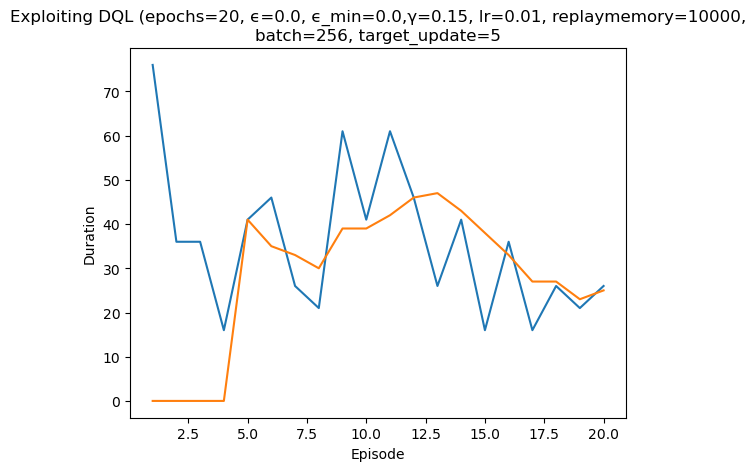

In [8]:
dql_exploit_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=dqn_with_defender["learner"],
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,  # 0.35,
    render=False,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"dql-{gymid}"),
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  116.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  118.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  129.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  129.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  135.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  143.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:  143.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  152.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  252.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  263.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  263.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  265.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  265.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  269.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  269.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  278.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  278.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  378.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  378.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  392.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 111|reward:  392.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 1|Iteration 112|reward:  400.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 1|Iteration 112|reward:  400.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 1|Iteration 117|reward:  406.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 1|Iteration 117|reward:  406.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  412.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 1|Iteration 134|reward:  412.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  512.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  512.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  526.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 156|reward:  526.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 162|reward:  626.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 1|Iteration 162|reward:  626.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  628.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  628.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 1|Iteration 167|reward:  630.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 1|Iteration 167|reward:  630.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  641.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  641.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 169|reward:  647.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 169|reward:  647.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 1|Iteration 181|reward:  656.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 1|Iteration 181|reward:  656.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  756.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  756.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  762.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  762.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  762.0|last_reward_at:  184|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/49 (0.17)
    explore-remote: 12/113 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/10 (0.38)
  exploit deflected to exploration: 5
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  114.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  114.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  128.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  128.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  228.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  228.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  234.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  234.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  236.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  236.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  242.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  242.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  244.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  244.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  258.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 56|reward:  258.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  260.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  260.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  360.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:  360.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  362.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  362.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  376.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 88|reward:  376.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  476.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  476.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  482.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  482.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 99|reward:  488.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 99|reward:  488.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  494.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  494.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  500.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 129|reward:  500.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  506.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  506.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 2|Iteration 163|reward:  517.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 2|Iteration 163|reward:  517.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  519.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  519.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 2|Iteration 172|reward:  523.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 2|Iteration 172|reward:  523.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 2|Iteration 181|reward:  532.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 2|Iteration 181|reward:  532.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 2|Iteration 182|reward:  632.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 2|Iteration 182|reward:  632.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  632.0|last_reward_at:  182|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/54 (0.14)
    explore-remote: 10/101 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/21 (0.19)
  exploit deflected to exploration: 6
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8687, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  116.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  118.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  118.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  132.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  132.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  140.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  140.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  240.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  240.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  246.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  246.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:  252.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:  252.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 3|Iteration 98|reward:  266.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 3|Iteration 98|reward:  266.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:  366.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:  366.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  377.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 107|reward:  377.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 109|reward:  379.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 3|Iteration 109|reward:  379.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  385.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  385.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:  393.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:  393.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 3|Iteration 136|reward:  395.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 3|Iteration 136|reward:  395.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 3|Iteration 178|reward:  395.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  395.0|last_reward_at:  136|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/42 (0.11)
    explore-remote: 8/121 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/21 (0.12)
  exploit deflected to exploration: 10
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8535, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  129.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  129.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  135.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  135.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  143.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  143.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 47|reward:  152.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  252.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  252.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  252.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:  263.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:  263.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 121|reward:  265.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 121|reward:  265.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 4|Iteration 123|reward:  269.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 4|Iteration 123|reward:  269.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 4|Iteration 164|reward:  278.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 4|Iteration 164|reward:  278.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  378.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 4|Iteration 169|reward:  378.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:  378.0|last_reward_at:  169|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/49 (0.09)
    explore-remote: 6/112 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/25 (0.11)
  exploit deflected to exploration: 16
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8386, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  118.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  129.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  129.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  135.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  135.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  143.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  143.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  143.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 163|reward:  143.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward:  143.0|last_reward_at:   53|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/47 (0.04)
    explore-remote: 4/130 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/16 (0.06)
  exploit deflected to exploration: 12
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8239, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  120.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  134.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  134.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  142.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  142.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  148.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:  148.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 47|reward:  248.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 47|reward:  248.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  259.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  259.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:  268.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:  268.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:  272.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 6|Iteration 73|reward:  372.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 6|Iteration 73|reward:  372.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 6|Iteration 78|reward:  374.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 6|Iteration 78|reward:  374.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 6|Iteration 82|reward:  388.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 6|Iteration 82|reward:  388.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  394.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  394.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  494.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 86|reward:  494.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 92|reward:  500.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 6|Iteration 92|reward:  500.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 6|Iteration 93|reward:  506.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 6|Iteration 93|reward:  506.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 6|Iteration 99|reward:  520.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 6|Iteration 99|reward:  520.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 6|Iteration 101|reward:  620.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 6|Iteration 101|reward:  620.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 6|Iteration 103|reward:  622.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 6|Iteration 103|reward:  622.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  624.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 109|reward:  624.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 113|reward:  638.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 6|Iteration 113|reward:  638.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 115|reward:  644.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 6|Iteration 115|reward:  644.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 6|Iteration 121|reward:  744.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 6|Iteration 121|reward:  744.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  750.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  750.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  750.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 157|reward:  756.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 157|reward:  756.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 6|Iteration 183|reward:  756.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 6|Iteration 200|reward:  756.0|last_reward_at:  157|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/37 (0.21)
    explore-remote: 11/113 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/23 (0.21)
  exploit deflected to exploration: 7
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8096, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  134.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  134.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  234.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  234.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  248.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  248.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  348.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  348.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  354.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  354.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  365.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  365.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  371.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  371.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  377.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  377.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  383.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  383.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  391.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  391.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  397.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:  397.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 89|reward:  399.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 7|Iteration 89|reward:  399.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 7|Iteration 96|reward:  401.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 7|Iteration 96|reward:  401.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  410.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  410.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:  510.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:  510.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 7|Iteration 147|reward:  521.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 7|Iteration 147|reward:  521.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 7|Iteration 148|reward:  523.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 7|Iteration 148|reward:  523.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  527.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  527.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 184|reward:  536.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 184|reward:  536.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 7|Iteration 198|reward:  636.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 7|Iteration 198|reward:  636.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward:  636.0|last_reward_at:  198|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/59 (0.13)
    explore-remote: 10/93 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/24 (0.17)
  exploit deflected to exploration: 16
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.7956, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  131.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  131.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  139.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  139.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward:  148.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward:  148.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:  154.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:  154.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  254.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  254.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 102|reward:  265.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 102|reward:  265.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 8|Iteration 108|reward:  269.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 8|Iteration 108|reward:  269.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 8|Iteration 109|reward:  278.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 8|Iteration 109|reward:  278.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 8|Iteration 111|reward:  378.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 8|Iteration 111|reward:  378.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  389.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  389.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 127|reward:  395.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 127|reward:  395.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  403.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 8|Iteration 130|reward:  403.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 8|Iteration 164|reward:  405.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 8|Iteration 164|reward:  405.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:  405.0|last_reward_at:  164|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/56 (0.10)
    explore-remote: 8/109 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/18 (0.14)
  exploit deflected to exploration: 16
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.7818, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  140.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  140.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  148.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  148.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  248.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  248.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 68|reward:  259.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 68|reward:  259.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  261.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  261.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  270.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  270.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:  370.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:  370.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 118|reward:  381.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 118|reward:  381.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 9|Iteration 127|reward:  387.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 9|Iteration 127|reward:  387.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 9|Iteration 158|reward:  395.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 9|Iteration 158|reward:  395.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 9|Iteration 165|reward:  397.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 9|Iteration 165|reward:  397.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:  403.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:  403.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:  403.0|last_reward_at:  171|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/47 (0.11)
    explore-remote: 8/107 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/29 (0.09)
  exploit deflected to exploration: 10
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.7683, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  131.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  131.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  137.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  137.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  146.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward:  146.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  246.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  246.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  252.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  252.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  263.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  263.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:  272.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:  272.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  276.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 70|reward:  276.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  376.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  376.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  387.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  387.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 83|reward:  393.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 83|reward:  393.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 94|reward:  402.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 10|Iteration 94|reward:  402.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:  404.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:  404.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  412.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  412.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 99|reward:  512.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 99|reward:  512.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  526.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  526.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 113|reward:  626.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 113|reward:  626.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 10|Iteration 122|reward:  628.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 10|Iteration 122|reward:  628.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 10|Iteration 127|reward:  639.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 10|Iteration 127|reward:  639.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 10|Iteration 130|reward:  647.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 10|Iteration 130|reward:  647.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 10|Iteration 139|reward:  653.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 10|Iteration 139|reward:  653.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 10|Iteration 154|reward:  655.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 10|Iteration 154|reward:  655.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 10|Iteration 162|reward:  664.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 10|Iteration 162|reward:  664.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 10|Iteration 163|reward:  764.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 10|Iteration 163|reward:  764.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 186|reward: 5764.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 186|reward: 5764.0|last_reward_at:  186|Elapsed Time: 0:00:00||

  Episode 10 ended at t=186 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/68 (0.13)
    explore-remote: 13/74 (0.15)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/15 (0.29)
  exploit deflected to exploration: 21
simulation ended


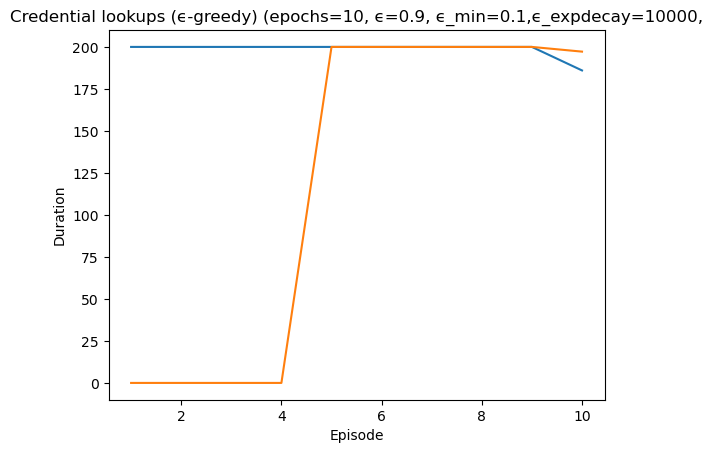

In [9]:
credlookup_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

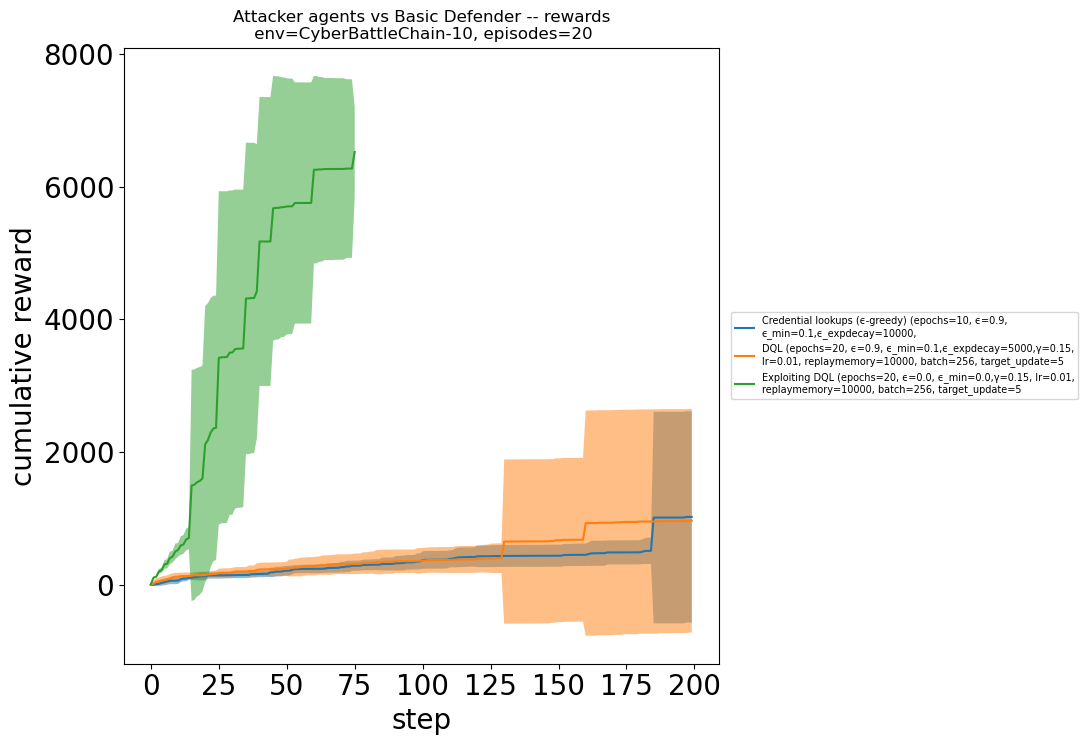

In [10]:
# Plots
all_runs = [credlookup_run, dqn_with_defender, dql_exploit_run]
p.plot_averaged_cummulative_rewards(all_runs=all_runs, title=f"Attacker agents vs Basic Defender -- rewards\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}", save_at=os.path.join(plots_dir, "withdefender-cumreward.png"))
# p.plot_episodes_length(all_runs)
p.plot_averaged_availability(title=f"Attacker agents vs Basic Defender -- availability\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}", all_runs=all_runs, show=False)